# get the feature importance, and get rid off not important features

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from xgboost import XGBClassifier

    space = {"max_depth":hp.choice("max_depth",np.arange(4, 15,1, dtype=int)),
             "subsample":hp.quniform("subsample",0.5,1,0.1),#
             "min_child_weight":hp.quniform ('min_child_weight', 1, 40, 1), #
             "gamma":hp.quniform("gamma",0.5,1,0.1),
             "reg_lambda":hp.quniform("reg_lambda",0.1,1,0.1),
             "reg_alpha":hp.quniform("reg_alpha",0.1,1,0.1),
             "colsample_bytree":hp.quniform("colsample_bytree",0.5,1,0.1),
        }

best_score: 0.9616811999999999
Tuning Complete best: {'colsample_bytree': 0.5, 'gamma': 0.9, 'max_depth': 0, 'min_child_weight': 40.0, 'reg_alpha': 0.1, 'reg_lambda': 0.5, 'subsample': 0.8}

In [2]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 50

In [3]:
df = pd.read_csv('df_all.csv')

In [4]:
label_df = pd.read_csv('label_df.csv')
df.drop('knn_label',axis=1,inplace=True)
df = df.merge(label_df,how='inner',on='Pseudo_ClientID')

In [5]:
df.to_csv('df_all.csv',index=False)

In [6]:
df.knn_label.unique()

array([1, 0])

In [7]:
#df1=pd.read_csv('./total1101.csv')
#df2=pd.read_csv('./combine_source_host.csv')
#df3=pd.read_csv('./profile_without_YN.csv')

In [8]:
#df=pd.merge(df1,df2,how='left',on='Pseudo_ClientID')
#df=pd.merge(df,df3,how='left',on='Pseudo_ClientID')

In [9]:
df.head()

,Pseudo_ClientID,ACTV_JOB_COUNT,ACTV_WRKR_COUNT,WRKR_COUNT,BANK_COUNT,CHECK_COUNT,CLT_PAYCOMP_COUNT,CLT_TAX_COUNT,GL_ACCT_COUNT,JOB_COUNT,LOCATION_COUNT,ORG_UNIT_COUNT,PAYRUN_COUNT,PAY_PERIOD_COUNT,POSITION_COUNT,WRKR_PAY_COMP_AVG,WRKR_TAX_AVG,NULL_COUNT,ACTV_JOB_COUNT-ACTV_WRKR_COUNT,ACTV_JOB_COUNT+ACTV_WRKR_COUNT,ACTV_JOB_COUNTxACTV_WRKR_COUNT,ACTV_JOB_COUNT-WRKR_COUNT,ACTV_JOB_COUNT+WRKR_COUNT,ACTV_JOB_COUNTxWRKR_COUNT,ACTV_JOB_COUNT-BANK_COUNT,...,payx_Serv04_ratio,payx_Serv05_ratio,payx_Serv06_ratio,payx_Serv07_ratio,payx_Serv08_ratio,payx_Serv09_ratio,payx_Serv10_ratio,payx_Serv11_ratio,payx_Serv12_ratio,payx_Serv13_ratio,payx_Serv14_ratio,payx_Serv15_ratio,payx_Serv16_ratio,payx_Serv17_ratio,payx_Serv18_ratio,payx_Serv19_ratio,payx_Serv20_ratio,payx_Serv21_ratio,payx_Serv22_ratio,payx_Serv23_ratio,payx_Serv24_ratio,payx_Serv25_ratio,payx_Serv26_ratio,Issue_YN,knn_label
0,00022C46-9142-4469-AEF6-E235802CBE11,NaN,-5.062429,-4.657624,-0.796265,-4.783789,-4.748977,0.511194,NaN,NaN,-1.282486,-2.503428,9.752293,8.621629,NaN,2.103113,-3.171023,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.0,0.0,0.433333,0.0,0.566667,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0,1
1,00029786-E7BB-4442-90B1-C48A8211F0DF,NaN,-4.910984,-4.683246,-0.796265,-4.712576,-8.855622,-5.042807,NaN,NaN,-1.757961,-2.590043,-4.732344,-5.018195,NaN,-9.702801,-11.337071,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.333333,0.066667,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.200000,0.000000,0.0,0.000000,0.0,0.0,0.4,0,1
2,0002A30C-B22C-447C-ADAF-025BA827B2F3,NaN,-3.123944,-2.979369,-0.796265,-2.132149,-9.540063,-3.288912,NaN,NaN,-1.757961,-2.027047,32.030294,31.625009,NaN,-9.702801,9.078048,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.312977,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.236641,0.000000,0.0,0.244275,0.000000,0.0,0.206107,0.0,0.0,0.0,0,1
3,00042184-FF8D-4255-8201-FB782CFEA259,NaN,-4.668674,-3.991447,-0.796265,-3.814034,-9.540063,-3.873543,NaN,NaN,-1.757961,-2.416813,13.688335,12.602983,NaN,-7.832646,4.995024,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0,1
4,000477F9-3A91-479E-B10A-2C2BFA344360,NaN,-3.063366,-3.017803,1.385662,-3.009745,2.095431,-0.365754,NaN,NaN,-0.807011,-2.243584,41.161913,40.177547,NaN,2.103113,0.912001,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.274725,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.153846,0.285714,0.0,0.131868,0.153846,0.0,0.000000,0.0,0.0,0.0,0,1


In [10]:
#df.to_csv('./total1101.csv',index=False)

In [11]:
#df=df.fillna(-100)

In [12]:
train_x=df.iloc[:,1:]
train_x=train_x.drop(['Issue_YN','Pseudo_ClientID@'],axis=1)
train_y=df['Issue_YN']

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from scipy import interp
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

best_score: 0.9616811999999999
Tuning Complete best: {'colsample_bytree': 0.5, 'gamma': 0.9, 'max_depth': 4, 'min_child_weight': 40.0, 'reg_alpha': 0.1, 'reg_lambda': 0.5, 'subsample': 0.8}

In [15]:
clf = XGBClassifier(n_estimators=1000,max_depth=4,colsample_bytree=0.5,
                    gamma=0.9,min_child_weight=40,reg_alpha=0.1,reg_lambda=0.5,subsample = 0.8,n_jobs=22)

In [16]:
scores = cross_val_score(clf,train_x,train_y, scoring='accuracy',cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/software/anaconda3/5.2.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/software/anaconda3/5.2.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/software/anaconda3/5.2.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/software/anaconda3/5.2.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empt

Accuracy: 0.96 (+/- 0.00)


/software/anaconda3/5.2.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [17]:
scores = cross_val_score(clf,train_x,train_y, scoring='f1',cv=5)
print("f1: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/software/anaconda3/5.2.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/software/anaconda3/5.2.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/software/anaconda3/5.2.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/software/anaconda3/5.2.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empt

f1: 0.54 (+/- 0.01)


/software/anaconda3/5.2.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [18]:
scores = cross_val_score(clf,train_x,train_y, scoring='recall',cv=5)
print("recall: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/software/anaconda3/5.2.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/software/anaconda3/5.2.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/software/anaconda3/5.2.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/software/anaconda3/5.2.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empt

recall: 0.47 (+/- 0.02)


/software/anaconda3/5.2.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


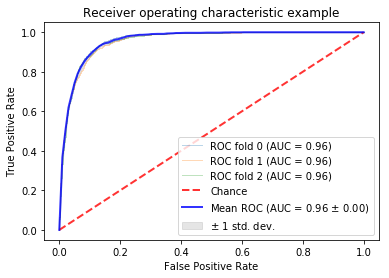

In [9]:
cv = StratifiedKFold(n_splits=3)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
X=train_x.values
y=train_y.values
i = 0
for train, test in cv.split(X, y):
    probas_ = clf.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [10]:
def display_importances(feature_importance_df_, doWorst=False, n_feat=50):
    # Plot feature importances
    if not doWorst:
        cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(
            by="importance", ascending=False)[:n_feat].index        
    else:
        cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(
            by="importance", ascending=False)[-n_feat:].index
    
    mean_imp = feature_importance_df_[["feature", "importance"]].groupby("feature").mean()
    df_2_neglect = mean_imp[mean_imp['importance'] < 1e-3]
    print('The list of features with 0 importance: ')
    print(df_2_neglect.index.values.tolist())
    del mean_imp, df_2_neglect
    
    best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]
    
    plt.figure(figsize=(15,10))
    sns.barplot(x="importance", y="feature", 
                data=best_features.sort_values(by="importance", ascending=False))
    plt.title('Features')
    plt.tight_layout()

best_score: 0.9616811999999999
Tuning Complete best: {'colsample_bytree': 0.5, 'gamma': 0.9, 'max_depth': 4, 'min_child_weight': 40.0, 'reg_alpha': 0.1, 'reg_lambda': 0.5, 'subsample': 0.8}

The list of features with 0 importance: 
['ACTV_JOB_COUNT', 'ACTV_JOB_COUNT+ACTV_WRKR_COUNT', 'ACTV_JOB_COUNT+ACTV_WRKR_COUNT@max', 'ACTV_JOB_COUNT+ACTV_WRKR_COUNT@min', 'ACTV_JOB_COUNT+ACTV_WRKR_COUNT@nunique', 'ACTV_JOB_COUNT+ACTV_WRKR_COUNT@std', 'ACTV_JOB_COUNT+BANK_COUNT', 'ACTV_JOB_COUNT+BANK_COUNT@max', 'ACTV_JOB_COUNT+BANK_COUNT@mean', 'ACTV_JOB_COUNT+BANK_COUNT@min', 'ACTV_JOB_COUNT+BANK_COUNT@nunique', 'ACTV_JOB_COUNT+BANK_COUNT@std', 'ACTV_JOB_COUNT+CHECK_COUNT', 'ACTV_JOB_COUNT+CHECK_COUNT@max', 'ACTV_JOB_COUNT+CHECK_COUNT@mean', 'ACTV_JOB_COUNT+CHECK_COUNT@min', 'ACTV_JOB_COUNT+CHECK_COUNT@nunique', 'ACTV_JOB_COUNT+CHECK_COUNT@std', 'ACTV_JOB_COUNT+CLT_PAYCOMP_COUNT', 'ACTV_JOB_COUNT+CLT_PAYCOMP_COUNT@max', 'ACTV_JOB_COUNT+CLT_PAYCOMP_COUNT@mean', 'ACTV_JOB_COUNT+CLT_PAYCOMP_COUNT@min', 'ACTV_JOB_COUNT+CLT_PAYCOMP_COUNT@nunique', 'ACTV_JOB_COUNT+CLT_PAYCOMP_COUNT@std', 'ACTV_JOB_COUNT+CLT_TAX_COUNT', 'ACTV_JOB_COUNT+CLT_TAX_COUNT@max', 'ACTV_JOB_COUNT+CLT_TAX_COUNT@mean', 

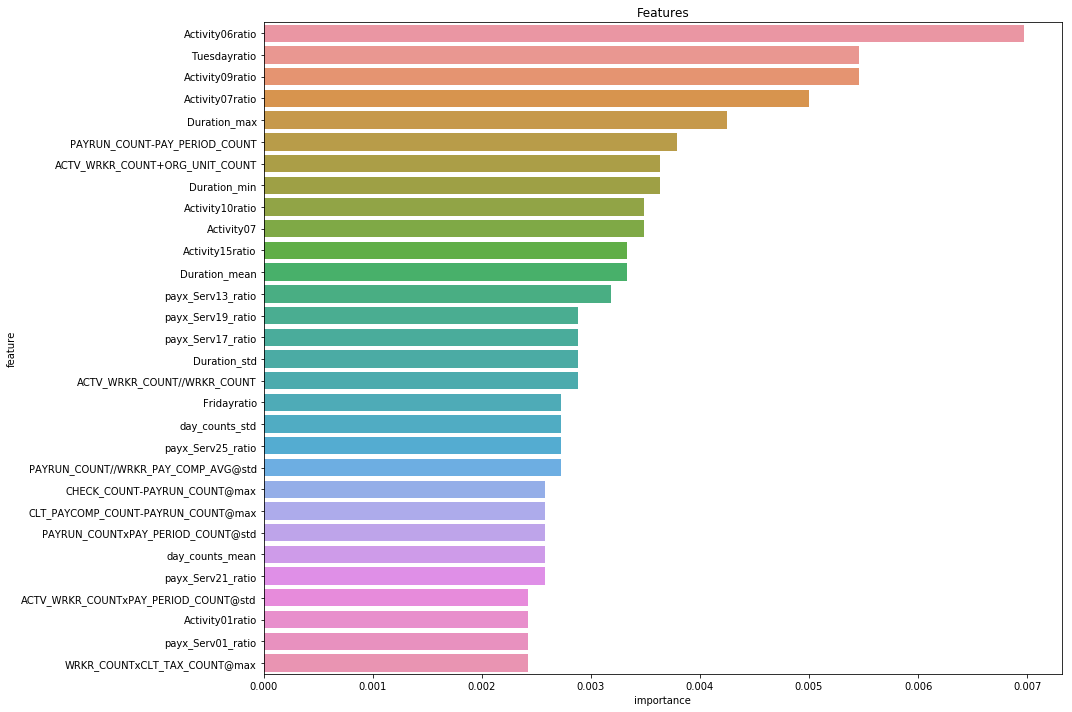

In [11]:
ff=XGBClassifier(n_estimators=1000,max_depth=4,colsample_bytree=0.5,
                    gamma=0.9,min_child_weight=40,reg_alpha=0.1,reg_lambda=0.5,subsample = 0.8)
ff.fit(X,y)
importance_df = pd.DataFrame()
importance_df["feature"] = train_x.columns.tolist()      
importance_df["importance"] = ff.feature_importances_
display_importances(feature_importance_df_=importance_df, n_feat=30)

In [1]:
useless_features = ['ACTV_JOB_COUNT', 'ACTV_JOB_COUNT+ACTV_WRKR_COUNT', 'ACTV_JOB_COUNT+ACTV_WRKR_COUNT@max', 'ACTV_JOB_COUNT+ACTV_WRKR_COUNT@min', 'ACTV_JOB_COUNT+ACTV_WRKR_COUNT@nunique', 'ACTV_JOB_COUNT+ACTV_WRKR_COUNT@std', 'ACTV_JOB_COUNT+BANK_COUNT', 'ACTV_JOB_COUNT+BANK_COUNT@max', 'ACTV_JOB_COUNT+BANK_COUNT@mean', 'ACTV_JOB_COUNT+BANK_COUNT@min', 'ACTV_JOB_COUNT+BANK_COUNT@nunique', 'ACTV_JOB_COUNT+BANK_COUNT@std', 'ACTV_JOB_COUNT+CHECK_COUNT', 'ACTV_JOB_COUNT+CHECK_COUNT@max', 'ACTV_JOB_COUNT+CHECK_COUNT@mean', 'ACTV_JOB_COUNT+CHECK_COUNT@min', 'ACTV_JOB_COUNT+CHECK_COUNT@nunique', 'ACTV_JOB_COUNT+CHECK_COUNT@std', 'ACTV_JOB_COUNT+CLT_PAYCOMP_COUNT', 'ACTV_JOB_COUNT+CLT_PAYCOMP_COUNT@max', 'ACTV_JOB_COUNT+CLT_PAYCOMP_COUNT@mean', 'ACTV_JOB_COUNT+CLT_PAYCOMP_COUNT@min', 'ACTV_JOB_COUNT+CLT_PAYCOMP_COUNT@nunique', 'ACTV_JOB_COUNT+CLT_PAYCOMP_COUNT@std', 'ACTV_JOB_COUNT+CLT_TAX_COUNT', 'ACTV_JOB_COUNT+CLT_TAX_COUNT@max', 'ACTV_JOB_COUNT+CLT_TAX_COUNT@mean', 'ACTV_JOB_COUNT+CLT_TAX_COUNT@min', 'ACTV_JOB_COUNT+CLT_TAX_COUNT@nunique', 'ACTV_JOB_COUNT+CLT_TAX_COUNT@std', 'ACTV_JOB_COUNT+GL_ACCT_COUNT', 'ACTV_JOB_COUNT+GL_ACCT_COUNT@max', 'ACTV_JOB_COUNT+GL_ACCT_COUNT@mean', 'ACTV_JOB_COUNT+GL_ACCT_COUNT@min', 'ACTV_JOB_COUNT+GL_ACCT_COUNT@nunique', 'ACTV_JOB_COUNT+GL_ACCT_COUNT@std', 'ACTV_JOB_COUNT+JOB_COUNT', 'ACTV_JOB_COUNT+JOB_COUNT@max', 'ACTV_JOB_COUNT+JOB_COUNT@mean', 'ACTV_JOB_COUNT+JOB_COUNT@min', 'ACTV_JOB_COUNT+JOB_COUNT@nunique', 'ACTV_JOB_COUNT+JOB_COUNT@std', 'ACTV_JOB_COUNT+LOCATION_COUNT', 'ACTV_JOB_COUNT+LOCATION_COUNT@max', 'ACTV_JOB_COUNT+LOCATION_COUNT@mean', 'ACTV_JOB_COUNT+LOCATION_COUNT@min', 'ACTV_JOB_COUNT+LOCATION_COUNT@nunique', 'ACTV_JOB_COUNT+LOCATION_COUNT@std', 'ACTV_JOB_COUNT+ORG_UNIT_COUNT', 'ACTV_JOB_COUNT+ORG_UNIT_COUNT@max', 'ACTV_JOB_COUNT+ORG_UNIT_COUNT@mean', 'ACTV_JOB_COUNT+ORG_UNIT_COUNT@min', 'ACTV_JOB_COUNT+ORG_UNIT_COUNT@nunique', 'ACTV_JOB_COUNT+ORG_UNIT_COUNT@std', 'ACTV_JOB_COUNT+PAYRUN_COUNT', 'ACTV_JOB_COUNT+PAYRUN_COUNT@max', 'ACTV_JOB_COUNT+PAYRUN_COUNT@mean', 'ACTV_JOB_COUNT+PAYRUN_COUNT@min', 'ACTV_JOB_COUNT+PAYRUN_COUNT@nunique', 'ACTV_JOB_COUNT+PAYRUN_COUNT@std', 'ACTV_JOB_COUNT+PAY_PERIOD_COUNT', 'ACTV_JOB_COUNT+PAY_PERIOD_COUNT@max', 'ACTV_JOB_COUNT+PAY_PERIOD_COUNT@mean', 'ACTV_JOB_COUNT+PAY_PERIOD_COUNT@min', 'ACTV_JOB_COUNT+PAY_PERIOD_COUNT@nunique', 'ACTV_JOB_COUNT+PAY_PERIOD_COUNT@std', 'ACTV_JOB_COUNT+POSITION_COUNT', 'ACTV_JOB_COUNT+POSITION_COUNT@max', 'ACTV_JOB_COUNT+POSITION_COUNT@mean', 'ACTV_JOB_COUNT+POSITION_COUNT@min', 'ACTV_JOB_COUNT+POSITION_COUNT@nunique', 'ACTV_JOB_COUNT+POSITION_COUNT@std', 'ACTV_JOB_COUNT+WRKR_COUNT', 'ACTV_JOB_COUNT+WRKR_COUNT@max', 'ACTV_JOB_COUNT+WRKR_COUNT@mean', 'ACTV_JOB_COUNT+WRKR_COUNT@min', 'ACTV_JOB_COUNT+WRKR_COUNT@nunique', 'ACTV_JOB_COUNT+WRKR_COUNT@std', 'ACTV_JOB_COUNT+WRKR_PAY_COMP_AVG', 'ACTV_JOB_COUNT+WRKR_PAY_COMP_AVG@max', 'ACTV_JOB_COUNT+WRKR_PAY_COMP_AVG@mean', 'ACTV_JOB_COUNT+WRKR_PAY_COMP_AVG@min', 'ACTV_JOB_COUNT+WRKR_PAY_COMP_AVG@nunique', 'ACTV_JOB_COUNT+WRKR_PAY_COMP_AVG@std', 'ACTV_JOB_COUNT+WRKR_TAX_AVG', 'ACTV_JOB_COUNT+WRKR_TAX_AVG@max', 'ACTV_JOB_COUNT+WRKR_TAX_AVG@mean', 'ACTV_JOB_COUNT+WRKR_TAX_AVG@min', 'ACTV_JOB_COUNT+WRKR_TAX_AVG@nunique', 'ACTV_JOB_COUNT+WRKR_TAX_AVG@std', 'ACTV_JOB_COUNT-ACTV_WRKR_COUNT', 'ACTV_JOB_COUNT-ACTV_WRKR_COUNT@max', 'ACTV_JOB_COUNT-ACTV_WRKR_COUNT@mean', 'ACTV_JOB_COUNT-ACTV_WRKR_COUNT@min', 'ACTV_JOB_COUNT-ACTV_WRKR_COUNT@nunique', 'ACTV_JOB_COUNT-ACTV_WRKR_COUNT@std', 'ACTV_JOB_COUNT-BANK_COUNT', 'ACTV_JOB_COUNT-BANK_COUNT@max', 'ACTV_JOB_COUNT-BANK_COUNT@mean', 'ACTV_JOB_COUNT-BANK_COUNT@min', 'ACTV_JOB_COUNT-BANK_COUNT@nunique', 'ACTV_JOB_COUNT-BANK_COUNT@std', 'ACTV_JOB_COUNT-CHECK_COUNT', 'ACTV_JOB_COUNT-CHECK_COUNT@max', 'ACTV_JOB_COUNT-CHECK_COUNT@mean', 'ACTV_JOB_COUNT-CHECK_COUNT@min', 'ACTV_JOB_COUNT-CHECK_COUNT@nunique', 'ACTV_JOB_COUNT-CHECK_COUNT@std', 'ACTV_JOB_COUNT-CLT_PAYCOMP_COUNT', 'ACTV_JOB_COUNT-CLT_PAYCOMP_COUNT@max', 'ACTV_JOB_COUNT-CLT_PAYCOMP_COUNT@mean', 'ACTV_JOB_COUNT-CLT_PAYCOMP_COUNT@min', 'ACTV_JOB_COUNT-CLT_PAYCOMP_COUNT@nunique', 'ACTV_JOB_COUNT-CLT_PAYCOMP_COUNT@std', 'ACTV_JOB_COUNT-CLT_TAX_COUNT', 'ACTV_JOB_COUNT-CLT_TAX_COUNT@max', 'ACTV_JOB_COUNT-CLT_TAX_COUNT@mean', 'ACTV_JOB_COUNT-CLT_TAX_COUNT@min', 'ACTV_JOB_COUNT-CLT_TAX_COUNT@nunique', 'ACTV_JOB_COUNT-CLT_TAX_COUNT@std', 'ACTV_JOB_COUNT-GL_ACCT_COUNT', 'ACTV_JOB_COUNT-GL_ACCT_COUNT@max', 'ACTV_JOB_COUNT-GL_ACCT_COUNT@mean', 'ACTV_JOB_COUNT-GL_ACCT_COUNT@min', 'ACTV_JOB_COUNT-GL_ACCT_COUNT@nunique', 'ACTV_JOB_COUNT-GL_ACCT_COUNT@std', 'ACTV_JOB_COUNT-JOB_COUNT', 'ACTV_JOB_COUNT-JOB_COUNT@max', 'ACTV_JOB_COUNT-JOB_COUNT@mean', 'ACTV_JOB_COUNT-JOB_COUNT@min', 'ACTV_JOB_COUNT-JOB_COUNT@nunique', 'ACTV_JOB_COUNT-JOB_COUNT@std', 'ACTV_JOB_COUNT-LOCATION_COUNT', 'ACTV_JOB_COUNT-LOCATION_COUNT@max', 'ACTV_JOB_COUNT-LOCATION_COUNT@mean', 'ACTV_JOB_COUNT-LOCATION_COUNT@min', 'ACTV_JOB_COUNT-LOCATION_COUNT@nunique', 'ACTV_JOB_COUNT-LOCATION_COUNT@std', 'ACTV_JOB_COUNT-ORG_UNIT_COUNT', 'ACTV_JOB_COUNT-ORG_UNIT_COUNT@max', 'ACTV_JOB_COUNT-ORG_UNIT_COUNT@mean', 'ACTV_JOB_COUNT-ORG_UNIT_COUNT@min', 'ACTV_JOB_COUNT-ORG_UNIT_COUNT@nunique', 'ACTV_JOB_COUNT-ORG_UNIT_COUNT@std', 'ACTV_JOB_COUNT-PAYRUN_COUNT', 'ACTV_JOB_COUNT-PAYRUN_COUNT@max', 'ACTV_JOB_COUNT-PAYRUN_COUNT@mean', 'ACTV_JOB_COUNT-PAYRUN_COUNT@min', 'ACTV_JOB_COUNT-PAYRUN_COUNT@nunique', 'ACTV_JOB_COUNT-PAYRUN_COUNT@std', 'ACTV_JOB_COUNT-PAY_PERIOD_COUNT', 'ACTV_JOB_COUNT-PAY_PERIOD_COUNT@max', 'ACTV_JOB_COUNT-PAY_PERIOD_COUNT@mean', 'ACTV_JOB_COUNT-PAY_PERIOD_COUNT@min', 'ACTV_JOB_COUNT-PAY_PERIOD_COUNT@nunique', 'ACTV_JOB_COUNT-PAY_PERIOD_COUNT@std', 'ACTV_JOB_COUNT-POSITION_COUNT', 'ACTV_JOB_COUNT-POSITION_COUNT@max', 'ACTV_JOB_COUNT-POSITION_COUNT@mean', 'ACTV_JOB_COUNT-POSITION_COUNT@min', 'ACTV_JOB_COUNT-POSITION_COUNT@nunique', 'ACTV_JOB_COUNT-POSITION_COUNT@std', 'ACTV_JOB_COUNT-WRKR_COUNT', 'ACTV_JOB_COUNT-WRKR_COUNT@max', 'ACTV_JOB_COUNT-WRKR_COUNT@mean', 'ACTV_JOB_COUNT-WRKR_COUNT@min', 'ACTV_JOB_COUNT-WRKR_COUNT@nunique', 'ACTV_JOB_COUNT-WRKR_COUNT@std', 'ACTV_JOB_COUNT-WRKR_PAY_COMP_AVG', 'ACTV_JOB_COUNT-WRKR_PAY_COMP_AVG@max', 'ACTV_JOB_COUNT-WRKR_PAY_COMP_AVG@mean', 'ACTV_JOB_COUNT-WRKR_PAY_COMP_AVG@min', 'ACTV_JOB_COUNT-WRKR_PAY_COMP_AVG@nunique', 'ACTV_JOB_COUNT-WRKR_PAY_COMP_AVG@std', 'ACTV_JOB_COUNT-WRKR_TAX_AVG', 'ACTV_JOB_COUNT-WRKR_TAX_AVG@max', 'ACTV_JOB_COUNT-WRKR_TAX_AVG@mean', 'ACTV_JOB_COUNT-WRKR_TAX_AVG@min', 'ACTV_JOB_COUNT-WRKR_TAX_AVG@nunique', 'ACTV_JOB_COUNT-WRKR_TAX_AVG@std', 'ACTV_JOB_COUNT//ACTV_WRKR_COUNT', 'ACTV_JOB_COUNT//ACTV_WRKR_COUNT@max', 'ACTV_JOB_COUNT//ACTV_WRKR_COUNT@mean', 'ACTV_JOB_COUNT//ACTV_WRKR_COUNT@min', 'ACTV_JOB_COUNT//ACTV_WRKR_COUNT@nunique', 'ACTV_JOB_COUNT//ACTV_WRKR_COUNT@std', 'ACTV_JOB_COUNT//BANK_COUNT', 'ACTV_JOB_COUNT//BANK_COUNT@max', 'ACTV_JOB_COUNT//BANK_COUNT@mean', 'ACTV_JOB_COUNT//BANK_COUNT@min', 'ACTV_JOB_COUNT//BANK_COUNT@nunique', 'ACTV_JOB_COUNT//BANK_COUNT@std', 'ACTV_JOB_COUNT//CHECK_COUNT', 'ACTV_JOB_COUNT//CHECK_COUNT@max', 'ACTV_JOB_COUNT//CHECK_COUNT@mean', 'ACTV_JOB_COUNT//CHECK_COUNT@min', 'ACTV_JOB_COUNT//CHECK_COUNT@nunique', 'ACTV_JOB_COUNT//CHECK_COUNT@std', 'ACTV_JOB_COUNT//CLT_PAYCOMP_COUNT@max', 'ACTV_JOB_COUNT//CLT_PAYCOMP_COUNT@mean', 'ACTV_JOB_COUNT//CLT_PAYCOMP_COUNT@min', 'ACTV_JOB_COUNT//CLT_PAYCOMP_COUNT@nunique', 'ACTV_JOB_COUNT//CLT_PAYCOMP_COUNT@std', 'ACTV_JOB_COUNT//CLT_TAX_COUNT', 'ACTV_JOB_COUNT//CLT_TAX_COUNT@max', 'ACTV_JOB_COUNT//CLT_TAX_COUNT@mean', 'ACTV_JOB_COUNT//CLT_TAX_COUNT@min', 'ACTV_JOB_COUNT//CLT_TAX_COUNT@nunique', 'ACTV_JOB_COUNT//CLT_TAX_COUNT@std', 'ACTV_JOB_COUNT//GL_ACCT_COUNT', 'ACTV_JOB_COUNT//GL_ACCT_COUNT@max', 'ACTV_JOB_COUNT//GL_ACCT_COUNT@mean', 'ACTV_JOB_COUNT//GL_ACCT_COUNT@min', 'ACTV_JOB_COUNT//GL_ACCT_COUNT@nunique', 'ACTV_JOB_COUNT//GL_ACCT_COUNT@std', 'ACTV_JOB_COUNT//JOB_COUNT', 'ACTV_JOB_COUNT//JOB_COUNT@max', 'ACTV_JOB_COUNT//JOB_COUNT@mean', 'ACTV_JOB_COUNT//JOB_COUNT@min', 'ACTV_JOB_COUNT//JOB_COUNT@nunique', 'ACTV_JOB_COUNT//JOB_COUNT@std', 'ACTV_JOB_COUNT//LOCATION_COUNT', 'ACTV_JOB_COUNT//LOCATION_COUNT@max', 'ACTV_JOB_COUNT//LOCATION_COUNT@mean', 'ACTV_JOB_COUNT//LOCATION_COUNT@min', 'ACTV_JOB_COUNT//LOCATION_COUNT@nunique', 'ACTV_JOB_COUNT//LOCATION_COUNT@std', 'ACTV_JOB_COUNT//ORG_UNIT_COUNT', 'ACTV_JOB_COUNT//ORG_UNIT_COUNT@max', 'ACTV_JOB_COUNT//ORG_UNIT_COUNT@mean', 'ACTV_JOB_COUNT//ORG_UNIT_COUNT@min', 'ACTV_JOB_COUNT//ORG_UNIT_COUNT@nunique', 'ACTV_JOB_COUNT//ORG_UNIT_COUNT@std', 'ACTV_JOB_COUNT//PAYRUN_COUNT', 'ACTV_JOB_COUNT//PAYRUN_COUNT@max', 'ACTV_JOB_COUNT//PAYRUN_COUNT@mean', 'ACTV_JOB_COUNT//PAYRUN_COUNT@min', 'ACTV_JOB_COUNT//PAYRUN_COUNT@nunique', 'ACTV_JOB_COUNT//PAYRUN_COUNT@std', 'ACTV_JOB_COUNT//PAY_PERIOD_COUNT', 'ACTV_JOB_COUNT//PAY_PERIOD_COUNT@max', 'ACTV_JOB_COUNT//PAY_PERIOD_COUNT@mean', 'ACTV_JOB_COUNT//PAY_PERIOD_COUNT@min', 'ACTV_JOB_COUNT//PAY_PERIOD_COUNT@nunique', 'ACTV_JOB_COUNT//PAY_PERIOD_COUNT@std', 'ACTV_JOB_COUNT//POSITION_COUNT', 'ACTV_JOB_COUNT//POSITION_COUNT@max', 'ACTV_JOB_COUNT//POSITION_COUNT@mean', 'ACTV_JOB_COUNT//POSITION_COUNT@min', 'ACTV_JOB_COUNT//POSITION_COUNT@nunique', 'ACTV_JOB_COUNT//POSITION_COUNT@std', 'ACTV_JOB_COUNT//WRKR_COUNT', 'ACTV_JOB_COUNT//WRKR_COUNT@max', 'ACTV_JOB_COUNT//WRKR_COUNT@mean', 'ACTV_JOB_COUNT//WRKR_COUNT@min', 'ACTV_JOB_COUNT//WRKR_COUNT@nunique', 'ACTV_JOB_COUNT//WRKR_COUNT@std', 'ACTV_JOB_COUNT//WRKR_PAY_COMP_AVG', 'ACTV_JOB_COUNT//WRKR_PAY_COMP_AVG@max', 'ACTV_JOB_COUNT//WRKR_PAY_COMP_AVG@mean', 'ACTV_JOB_COUNT//WRKR_PAY_COMP_AVG@min', 'ACTV_JOB_COUNT//WRKR_PAY_COMP_AVG@nunique', 'ACTV_JOB_COUNT//WRKR_PAY_COMP_AVG@std', 'ACTV_JOB_COUNT//WRKR_TAX_AVG', 'ACTV_JOB_COUNT//WRKR_TAX_AVG@max', 'ACTV_JOB_COUNT//WRKR_TAX_AVG@mean', 'ACTV_JOB_COUNT//WRKR_TAX_AVG@min', 'ACTV_JOB_COUNT//WRKR_TAX_AVG@nunique', 'ACTV_JOB_COUNT//WRKR_TAX_AVG@std', 'ACTV_JOB_COUNT@max', 'ACTV_JOB_COUNT@mean', 'ACTV_JOB_COUNT@min', 'ACTV_JOB_COUNT@nunique', 'ACTV_JOB_COUNT@std', 'ACTV_JOB_COUNTxACTV_WRKR_COUNT', 'ACTV_JOB_COUNTxACTV_WRKR_COUNT@max', 'ACTV_JOB_COUNTxACTV_WRKR_COUNT@mean', 'ACTV_JOB_COUNTxACTV_WRKR_COUNT@min', 'ACTV_JOB_COUNTxACTV_WRKR_COUNT@nunique', 'ACTV_JOB_COUNTxACTV_WRKR_COUNT@std', 'ACTV_JOB_COUNTxBANK_COUNT', 'ACTV_JOB_COUNTxBANK_COUNT@max', 'ACTV_JOB_COUNTxBANK_COUNT@mean', 'ACTV_JOB_COUNTxBANK_COUNT@min', 'ACTV_JOB_COUNTxBANK_COUNT@nunique', 'ACTV_JOB_COUNTxBANK_COUNT@std', 'ACTV_JOB_COUNTxCHECK_COUNT', 'ACTV_JOB_COUNTxCHECK_COUNT@max', 'ACTV_JOB_COUNTxCHECK_COUNT@mean', 'ACTV_JOB_COUNTxCHECK_COUNT@min', 'ACTV_JOB_COUNTxCHECK_COUNT@nunique', 'ACTV_JOB_COUNTxCHECK_COUNT@std', 'ACTV_JOB_COUNTxCLT_PAYCOMP_COUNT', 'ACTV_JOB_COUNTxCLT_PAYCOMP_COUNT@max', 'ACTV_JOB_COUNTxCLT_PAYCOMP_COUNT@mean', 'ACTV_JOB_COUNTxCLT_PAYCOMP_COUNT@min', 'ACTV_JOB_COUNTxCLT_PAYCOMP_COUNT@nunique', 'ACTV_JOB_COUNTxCLT_PAYCOMP_COUNT@std', 'ACTV_JOB_COUNTxCLT_TAX_COUNT', 'ACTV_JOB_COUNTxCLT_TAX_COUNT@max', 'ACTV_JOB_COUNTxCLT_TAX_COUNT@mean', 'ACTV_JOB_COUNTxCLT_TAX_COUNT@min', 'ACTV_JOB_COUNTxCLT_TAX_COUNT@nunique', 'ACTV_JOB_COUNTxCLT_TAX_COUNT@std', 'ACTV_JOB_COUNTxGL_ACCT_COUNT', 'ACTV_JOB_COUNTxGL_ACCT_COUNT@max', 'ACTV_JOB_COUNTxGL_ACCT_COUNT@mean', 'ACTV_JOB_COUNTxGL_ACCT_COUNT@min', 'ACTV_JOB_COUNTxGL_ACCT_COUNT@nunique', 'ACTV_JOB_COUNTxGL_ACCT_COUNT@std', 'ACTV_JOB_COUNTxJOB_COUNT', 'ACTV_JOB_COUNTxJOB_COUNT@max', 'ACTV_JOB_COUNTxJOB_COUNT@mean', 'ACTV_JOB_COUNTxJOB_COUNT@min', 'ACTV_JOB_COUNTxJOB_COUNT@nunique', 'ACTV_JOB_COUNTxJOB_COUNT@std', 'ACTV_JOB_COUNTxLOCATION_COUNT', 'ACTV_JOB_COUNTxLOCATION_COUNT@max', 'ACTV_JOB_COUNTxLOCATION_COUNT@mean', 'ACTV_JOB_COUNTxLOCATION_COUNT@min', 'ACTV_JOB_COUNTxLOCATION_COUNT@nunique', 'ACTV_JOB_COUNTxLOCATION_COUNT@std', 'ACTV_JOB_COUNTxORG_UNIT_COUNT', 'ACTV_JOB_COUNTxORG_UNIT_COUNT@max', 'ACTV_JOB_COUNTxORG_UNIT_COUNT@mean', 'ACTV_JOB_COUNTxORG_UNIT_COUNT@min', 'ACTV_JOB_COUNTxORG_UNIT_COUNT@nunique', 'ACTV_JOB_COUNTxORG_UNIT_COUNT@std', 'ACTV_JOB_COUNTxPAYRUN_COUNT', 'ACTV_JOB_COUNTxPAYRUN_COUNT@max', 'ACTV_JOB_COUNTxPAYRUN_COUNT@mean', 'ACTV_JOB_COUNTxPAYRUN_COUNT@min', 'ACTV_JOB_COUNTxPAYRUN_COUNT@nunique', 'ACTV_JOB_COUNTxPAYRUN_COUNT@std', 'ACTV_JOB_COUNTxPAY_PERIOD_COUNT', 'ACTV_JOB_COUNTxPAY_PERIOD_COUNT@max', 'ACTV_JOB_COUNTxPAY_PERIOD_COUNT@mean', 'ACTV_JOB_COUNTxPAY_PERIOD_COUNT@min', 'ACTV_JOB_COUNTxPAY_PERIOD_COUNT@nunique', 'ACTV_JOB_COUNTxPAY_PERIOD_COUNT@std', 'ACTV_JOB_COUNTxPOSITION_COUNT', 'ACTV_JOB_COUNTxPOSITION_COUNT@max', 'ACTV_JOB_COUNTxPOSITION_COUNT@mean', 'ACTV_JOB_COUNTxPOSITION_COUNT@min', 'ACTV_JOB_COUNTxPOSITION_COUNT@nunique', 'ACTV_JOB_COUNTxPOSITION_COUNT@std', 'ACTV_JOB_COUNTxWRKR_COUNT', 'ACTV_JOB_COUNTxWRKR_COUNT@max', 'ACTV_JOB_COUNTxWRKR_COUNT@mean', 'ACTV_JOB_COUNTxWRKR_COUNT@min', 'ACTV_JOB_COUNTxWRKR_COUNT@nunique', 'ACTV_JOB_COUNTxWRKR_COUNT@std', 'ACTV_JOB_COUNTxWRKR_PAY_COMP_AVG', 'ACTV_JOB_COUNTxWRKR_PAY_COMP_AVG@max', 'ACTV_JOB_COUNTxWRKR_PAY_COMP_AVG@mean', 'ACTV_JOB_COUNTxWRKR_PAY_COMP_AVG@min', 'ACTV_JOB_COUNTxWRKR_PAY_COMP_AVG@nunique', 'ACTV_JOB_COUNTxWRKR_PAY_COMP_AVG@std', 'ACTV_JOB_COUNTxWRKR_TAX_AVG', 'ACTV_JOB_COUNTxWRKR_TAX_AVG@max', 'ACTV_JOB_COUNTxWRKR_TAX_AVG@mean', 'ACTV_JOB_COUNTxWRKR_TAX_AVG@min', 'ACTV_JOB_COUNTxWRKR_TAX_AVG@nunique', 'ACTV_JOB_COUNTxWRKR_TAX_AVG@std', 'ACTV_WRKR_COUNT', 'ACTV_WRKR_COUNT+BANK_COUNT', 'ACTV_WRKR_COUNT+BANK_COUNT@max', 'ACTV_WRKR_COUNT+BANK_COUNT@mean', 'ACTV_WRKR_COUNT+BANK_COUNT@min', 'ACTV_WRKR_COUNT+BANK_COUNT@nunique', 'ACTV_WRKR_COUNT+BANK_COUNT@std', 'ACTV_WRKR_COUNT+CHECK_COUNT@max', 'ACTV_WRKR_COUNT+CHECK_COUNT@mean', 'ACTV_WRKR_COUNT+CHECK_COUNT@min', 'ACTV_WRKR_COUNT+CHECK_COUNT@nunique', 'ACTV_WRKR_COUNT+CHECK_COUNT@std', 'ACTV_WRKR_COUNT+CLT_PAYCOMP_COUNT', 'ACTV_WRKR_COUNT+CLT_PAYCOMP_COUNT@max', 'ACTV_WRKR_COUNT+CLT_PAYCOMP_COUNT@mean', 'ACTV_WRKR_COUNT+CLT_PAYCOMP_COUNT@min', 'ACTV_WRKR_COUNT+CLT_PAYCOMP_COUNT@nunique', 'ACTV_WRKR_COUNT+CLT_PAYCOMP_COUNT@std', 'ACTV_WRKR_COUNT+CLT_TAX_COUNT', 'ACTV_WRKR_COUNT+CLT_TAX_COUNT@mean', 'ACTV_WRKR_COUNT+CLT_TAX_COUNT@min', 'ACTV_WRKR_COUNT+CLT_TAX_COUNT@nunique', 'ACTV_WRKR_COUNT+CLT_TAX_COUNT@std', 'ACTV_WRKR_COUNT+GL_ACCT_COUNT', 'ACTV_WRKR_COUNT+GL_ACCT_COUNT@max', 'ACTV_WRKR_COUNT+GL_ACCT_COUNT@mean', 'ACTV_WRKR_COUNT+GL_ACCT_COUNT@min', 'ACTV_WRKR_COUNT+GL_ACCT_COUNT@nunique', 'ACTV_WRKR_COUNT+GL_ACCT_COUNT@std', 'ACTV_WRKR_COUNT+JOB_COUNT', 'ACTV_WRKR_COUNT+JOB_COUNT@max', 'ACTV_WRKR_COUNT+JOB_COUNT@mean', 'ACTV_WRKR_COUNT+JOB_COUNT@min', 'ACTV_WRKR_COUNT+JOB_COUNT@nunique', 'ACTV_WRKR_COUNT+JOB_COUNT@std', 'ACTV_WRKR_COUNT+LOCATION_COUNT', 'ACTV_WRKR_COUNT+LOCATION_COUNT@max', 'ACTV_WRKR_COUNT+LOCATION_COUNT@mean', 'ACTV_WRKR_COUNT+LOCATION_COUNT@min', 'ACTV_WRKR_COUNT+LOCATION_COUNT@nunique', 'ACTV_WRKR_COUNT+LOCATION_COUNT@std', 'ACTV_WRKR_COUNT+ORG_UNIT_COUNT@nunique', 'ACTV_WRKR_COUNT+ORG_UNIT_COUNT@std', 'ACTV_WRKR_COUNT+PAYRUN_COUNT', 'ACTV_WRKR_COUNT+PAYRUN_COUNT@max', 'ACTV_WRKR_COUNT+PAYRUN_COUNT@mean', 'ACTV_WRKR_COUNT+PAYRUN_COUNT@min', 'ACTV_WRKR_COUNT+PAYRUN_COUNT@nunique', 'ACTV_WRKR_COUNT+PAY_PERIOD_COUNT', 'ACTV_WRKR_COUNT+PAY_PERIOD_COUNT@max', 'ACTV_WRKR_COUNT+PAY_PERIOD_COUNT@mean', 'ACTV_WRKR_COUNT+PAY_PERIOD_COUNT@min', 'ACTV_WRKR_COUNT+PAY_PERIOD_COUNT@nunique', 'ACTV_WRKR_COUNT+POSITION_COUNT', 'ACTV_WRKR_COUNT+POSITION_COUNT@max', 'ACTV_WRKR_COUNT+POSITION_COUNT@mean', 'ACTV_WRKR_COUNT+POSITION_COUNT@min', 'ACTV_WRKR_COUNT+POSITION_COUNT@nunique', 'ACTV_WRKR_COUNT+POSITION_COUNT@std', 'ACTV_WRKR_COUNT+WRKR_COUNT', 'ACTV_WRKR_COUNT+WRKR_COUNT@max', 'ACTV_WRKR_COUNT+WRKR_COUNT@mean', 'ACTV_WRKR_COUNT+WRKR_COUNT@min', 'ACTV_WRKR_COUNT+WRKR_COUNT@nunique', 'ACTV_WRKR_COUNT+WRKR_COUNT@std', 'ACTV_WRKR_COUNT+WRKR_PAY_COMP_AVG', 'ACTV_WRKR_COUNT+WRKR_PAY_COMP_AVG@max', 'ACTV_WRKR_COUNT+WRKR_PAY_COMP_AVG@mean', 'ACTV_WRKR_COUNT+WRKR_PAY_COMP_AVG@min', 'ACTV_WRKR_COUNT+WRKR_PAY_COMP_AVG@nunique', 'ACTV_WRKR_COUNT+WRKR_PAY_COMP_AVG@std', 'ACTV_WRKR_COUNT+WRKR_TAX_AVG', 'ACTV_WRKR_COUNT+WRKR_TAX_AVG@max', 'ACTV_WRKR_COUNT+WRKR_TAX_AVG@mean', 'ACTV_WRKR_COUNT+WRKR_TAX_AVG@min', 'ACTV_WRKR_COUNT+WRKR_TAX_AVG@nunique', 'ACTV_WRKR_COUNT+WRKR_TAX_AVG@std', 'ACTV_WRKR_COUNT-BANK_COUNT', 'ACTV_WRKR_COUNT-BANK_COUNT@max', 'ACTV_WRKR_COUNT-BANK_COUNT@mean', 'ACTV_WRKR_COUNT-BANK_COUNT@min', 'ACTV_WRKR_COUNT-BANK_COUNT@nunique', 'ACTV_WRKR_COUNT-BANK_COUNT@std', 'ACTV_WRKR_COUNT-CHECK_COUNT', 'ACTV_WRKR_COUNT-CHECK_COUNT@max', 'ACTV_WRKR_COUNT-CHECK_COUNT@min', 'ACTV_WRKR_COUNT-CHECK_COUNT@nunique', 'ACTV_WRKR_COUNT-CLT_PAYCOMP_COUNT', 'ACTV_WRKR_COUNT-CLT_PAYCOMP_COUNT@max', 'ACTV_WRKR_COUNT-CLT_PAYCOMP_COUNT@mean', 'ACTV_WRKR_COUNT-CLT_PAYCOMP_COUNT@min', 'ACTV_WRKR_COUNT-CLT_PAYCOMP_COUNT@nunique', 'ACTV_WRKR_COUNT-CLT_PAYCOMP_COUNT@std', 'ACTV_WRKR_COUNT-CLT_TAX_COUNT', 'ACTV_WRKR_COUNT-CLT_TAX_COUNT@max', 'ACTV_WRKR_COUNT-CLT_TAX_COUNT@mean', 'ACTV_WRKR_COUNT-CLT_TAX_COUNT@min', 'ACTV_WRKR_COUNT-CLT_TAX_COUNT@nunique', 'ACTV_WRKR_COUNT-CLT_TAX_COUNT@std', 'ACTV_WRKR_COUNT-GL_ACCT_COUNT', 'ACTV_WRKR_COUNT-GL_ACCT_COUNT@max', 'ACTV_WRKR_COUNT-GL_ACCT_COUNT@mean', 'ACTV_WRKR_COUNT-GL_ACCT_COUNT@min', 'ACTV_WRKR_COUNT-GL_ACCT_COUNT@nunique', 'ACTV_WRKR_COUNT-GL_ACCT_COUNT@std', 'ACTV_WRKR_COUNT-JOB_COUNT', 'ACTV_WRKR_COUNT-JOB_COUNT@max', 'ACTV_WRKR_COUNT-JOB_COUNT@mean', 'ACTV_WRKR_COUNT-JOB_COUNT@min', 'ACTV_WRKR_COUNT-JOB_COUNT@nunique', 'ACTV_WRKR_COUNT-JOB_COUNT@std', 'ACTV_WRKR_COUNT-LOCATION_COUNT', 'ACTV_WRKR_COUNT-LOCATION_COUNT@max', 'ACTV_WRKR_COUNT-LOCATION_COUNT@mean', 'ACTV_WRKR_COUNT-LOCATION_COUNT@min', 'ACTV_WRKR_COUNT-LOCATION_COUNT@nunique', 'ACTV_WRKR_COUNT-LOCATION_COUNT@std', 'ACTV_WRKR_COUNT-ORG_UNIT_COUNT', 'ACTV_WRKR_COUNT-ORG_UNIT_COUNT@mean', 'ACTV_WRKR_COUNT-ORG_UNIT_COUNT@min', 'ACTV_WRKR_COUNT-ORG_UNIT_COUNT@nunique', 'ACTV_WRKR_COUNT-ORG_UNIT_COUNT@std', 'ACTV_WRKR_COUNT-PAYRUN_COUNT', 'ACTV_WRKR_COUNT-PAYRUN_COUNT@max', 'ACTV_WRKR_COUNT-PAYRUN_COUNT@mean', 'ACTV_WRKR_COUNT-PAYRUN_COUNT@min', 'ACTV_WRKR_COUNT-PAYRUN_COUNT@nunique', 'ACTV_WRKR_COUNT-PAYRUN_COUNT@std', 'ACTV_WRKR_COUNT-PAY_PERIOD_COUNT', 'ACTV_WRKR_COUNT-PAY_PERIOD_COUNT@max', 'ACTV_WRKR_COUNT-PAY_PERIOD_COUNT@mean', 'ACTV_WRKR_COUNT-PAY_PERIOD_COUNT@min', 'ACTV_WRKR_COUNT-PAY_PERIOD_COUNT@nunique', 'ACTV_WRKR_COUNT-POSITION_COUNT', 'ACTV_WRKR_COUNT-POSITION_COUNT@max', 'ACTV_WRKR_COUNT-POSITION_COUNT@mean', 'ACTV_WRKR_COUNT-POSITION_COUNT@min', 'ACTV_WRKR_COUNT-POSITION_COUNT@nunique', 'ACTV_WRKR_COUNT-POSITION_COUNT@std', 'ACTV_WRKR_COUNT-WRKR_COUNT', 'ACTV_WRKR_COUNT-WRKR_COUNT@max', 'ACTV_WRKR_COUNT-WRKR_COUNT@mean', 'ACTV_WRKR_COUNT-WRKR_COUNT@nunique', 'ACTV_WRKR_COUNT-WRKR_COUNT@std', 'ACTV_WRKR_COUNT-WRKR_PAY_COMP_AVG', 'ACTV_WRKR_COUNT-WRKR_PAY_COMP_AVG@max', 'ACTV_WRKR_COUNT-WRKR_PAY_COMP_AVG@mean', 'ACTV_WRKR_COUNT-WRKR_PAY_COMP_AVG@min', 'ACTV_WRKR_COUNT-WRKR_PAY_COMP_AVG@nunique', 'ACTV_WRKR_COUNT-WRKR_PAY_COMP_AVG@std', 'ACTV_WRKR_COUNT-WRKR_TAX_AVG', 'ACTV_WRKR_COUNT-WRKR_TAX_AVG@max', 'ACTV_WRKR_COUNT-WRKR_TAX_AVG@mean', 'ACTV_WRKR_COUNT-WRKR_TAX_AVG@min', 'ACTV_WRKR_COUNT-WRKR_TAX_AVG@nunique', 'ACTV_WRKR_COUNT-WRKR_TAX_AVG@std', 'ACTV_WRKR_COUNT//ACTV_JOB_COUNT@max', 'ACTV_WRKR_COUNT//ACTV_JOB_COUNT@mean', 'ACTV_WRKR_COUNT//ACTV_JOB_COUNT@min', 'ACTV_WRKR_COUNT//ACTV_JOB_COUNT@nunique', 'ACTV_WRKR_COUNT//ACTV_JOB_COUNT@std', 'ACTV_WRKR_COUNT//BANK_COUNT', 'ACTV_WRKR_COUNT//BANK_COUNT@max', 'ACTV_WRKR_COUNT//BANK_COUNT@mean', 'ACTV_WRKR_COUNT//BANK_COUNT@min', 'ACTV_WRKR_COUNT//BANK_COUNT@nunique', 'ACTV_WRKR_COUNT//BANK_COUNT@std', 'ACTV_WRKR_COUNT//CHECK_COUNT', 'ACTV_WRKR_COUNT//CHECK_COUNT@max', 'ACTV_WRKR_COUNT//CHECK_COUNT@mean', 'ACTV_WRKR_COUNT//CHECK_COUNT@nunique', 'ACTV_WRKR_COUNT//CLT_PAYCOMP_COUNT', 'ACTV_WRKR_COUNT//CLT_PAYCOMP_COUNT@max', 'ACTV_WRKR_COUNT//CLT_PAYCOMP_COUNT@mean', 'ACTV_WRKR_COUNT//CLT_PAYCOMP_COUNT@min', 'ACTV_WRKR_COUNT//CLT_PAYCOMP_COUNT@nunique', 'ACTV_WRKR_COUNT//CLT_PAYCOMP_COUNT@std', 'ACTV_WRKR_COUNT//CLT_TAX_COUNT', 'ACTV_WRKR_COUNT//CLT_TAX_COUNT@max', 'ACTV_WRKR_COUNT//CLT_TAX_COUNT@mean', 'ACTV_WRKR_COUNT//CLT_TAX_COUNT@min', 'ACTV_WRKR_COUNT//CLT_TAX_COUNT@nunique', 'ACTV_WRKR_COUNT//GL_ACCT_COUNT', 'ACTV_WRKR_COUNT//GL_ACCT_COUNT@mean', 'ACTV_WRKR_COUNT//GL_ACCT_COUNT@min', 'ACTV_WRKR_COUNT//GL_ACCT_COUNT@nunique', 'ACTV_WRKR_COUNT//GL_ACCT_COUNT@std', 'ACTV_WRKR_COUNT//JOB_COUNT', 'ACTV_WRKR_COUNT//JOB_COUNT@max', 'ACTV_WRKR_COUNT//JOB_COUNT@mean', 'ACTV_WRKR_COUNT//JOB_COUNT@min', 'ACTV_WRKR_COUNT//JOB_COUNT@nunique', 'ACTV_WRKR_COUNT//JOB_COUNT@std', 'ACTV_WRKR_COUNT//LOCATION_COUNT', 'ACTV_WRKR_COUNT//LOCATION_COUNT@max', 'ACTV_WRKR_COUNT//LOCATION_COUNT@min', 'ACTV_WRKR_COUNT//LOCATION_COUNT@nunique', 'ACTV_WRKR_COUNT//LOCATION_COUNT@std', 'ACTV_WRKR_COUNT//ORG_UNIT_COUNT', 'ACTV_WRKR_COUNT//ORG_UNIT_COUNT@max', 'ACTV_WRKR_COUNT//ORG_UNIT_COUNT@mean', 'ACTV_WRKR_COUNT//ORG_UNIT_COUNT@min', 'ACTV_WRKR_COUNT//ORG_UNIT_COUNT@nunique', 'ACTV_WRKR_COUNT//PAYRUN_COUNT@max', 'ACTV_WRKR_COUNT//PAYRUN_COUNT@mean', 'ACTV_WRKR_COUNT//PAYRUN_COUNT@min', 'ACTV_WRKR_COUNT//PAYRUN_COUNT@nunique', 'ACTV_WRKR_COUNT//PAYRUN_COUNT@std', 'ACTV_WRKR_COUNT//PAY_PERIOD_COUNT', 'ACTV_WRKR_COUNT//PAY_PERIOD_COUNT@max', 'ACTV_WRKR_COUNT//PAY_PERIOD_COUNT@mean', 'ACTV_WRKR_COUNT//PAY_PERIOD_COUNT@min', 'ACTV_WRKR_COUNT//PAY_PERIOD_COUNT@nunique', 'ACTV_WRKR_COUNT//PAY_PERIOD_COUNT@std', 'ACTV_WRKR_COUNT//POSITION_COUNT', 'ACTV_WRKR_COUNT//POSITION_COUNT@max', 'ACTV_WRKR_COUNT//POSITION_COUNT@mean', 'ACTV_WRKR_COUNT//POSITION_COUNT@min', 'ACTV_WRKR_COUNT//POSITION_COUNT@nunique', 'ACTV_WRKR_COUNT//POSITION_COUNT@std', 'ACTV_WRKR_COUNT//WRKR_COUNT@nunique', 'ACTV_WRKR_COUNT//WRKR_PAY_COMP_AVG', 'ACTV_WRKR_COUNT//WRKR_PAY_COMP_AVG@mean', 'ACTV_WRKR_COUNT//WRKR_PAY_COMP_AVG@min', 'ACTV_WRKR_COUNT//WRKR_PAY_COMP_AVG@nunique', 'ACTV_WRKR_COUNT//WRKR_TAX_AVG@max', 'ACTV_WRKR_COUNT//WRKR_TAX_AVG@mean', 'ACTV_WRKR_COUNT//WRKR_TAX_AVG@min', 'ACTV_WRKR_COUNT//WRKR_TAX_AVG@nunique', 'ACTV_WRKR_COUNT//WRKR_TAX_AVG@std', 'ACTV_WRKR_COUNT@max', 'ACTV_WRKR_COUNT@mean', 'ACTV_WRKR_COUNT@min', 'ACTV_WRKR_COUNT@nunique', 'ACTV_WRKR_COUNT@std', 'ACTV_WRKR_COUNTxBANK_COUNT', 'ACTV_WRKR_COUNTxBANK_COUNT@max', 'ACTV_WRKR_COUNTxBANK_COUNT@mean', 'ACTV_WRKR_COUNTxBANK_COUNT@min', 'ACTV_WRKR_COUNTxBANK_COUNT@nunique', 'ACTV_WRKR_COUNTxCHECK_COUNT', 'ACTV_WRKR_COUNTxCHECK_COUNT@max', 'ACTV_WRKR_COUNTxCHECK_COUNT@mean', 'ACTV_WRKR_COUNTxCHECK_COUNT@nunique', 'ACTV_WRKR_COUNTxCHECK_COUNT@std', 'ACTV_WRKR_COUNTxCLT_PAYCOMP_COUNT', 'ACTV_WRKR_COUNTxCLT_PAYCOMP_COUNT@max', 'ACTV_WRKR_COUNTxCLT_PAYCOMP_COUNT@mean', 'ACTV_WRKR_COUNTxCLT_PAYCOMP_COUNT@min', 'ACTV_WRKR_COUNTxCLT_PAYCOMP_COUNT@nunique', 'ACTV_WRKR_COUNTxCLT_PAYCOMP_COUNT@std', 'ACTV_WRKR_COUNTxCLT_TAX_COUNT', 'ACTV_WRKR_COUNTxCLT_TAX_COUNT@max', 'ACTV_WRKR_COUNTxCLT_TAX_COUNT@mean', 'ACTV_WRKR_COUNTxCLT_TAX_COUNT@min', 'ACTV_WRKR_COUNTxCLT_TAX_COUNT@nunique', 'ACTV_WRKR_COUNTxGL_ACCT_COUNT', 'ACTV_WRKR_COUNTxGL_ACCT_COUNT@max', 'ACTV_WRKR_COUNTxGL_ACCT_COUNT@mean', 'ACTV_WRKR_COUNTxGL_ACCT_COUNT@min', 'ACTV_WRKR_COUNTxGL_ACCT_COUNT@nunique', 'ACTV_WRKR_COUNTxGL_ACCT_COUNT@std', 'ACTV_WRKR_COUNTxJOB_COUNT', 'ACTV_WRKR_COUNTxJOB_COUNT@max', 'ACTV_WRKR_COUNTxJOB_COUNT@mean', 'ACTV_WRKR_COUNTxJOB_COUNT@min', 'ACTV_WRKR_COUNTxJOB_COUNT@nunique', 'ACTV_WRKR_COUNTxJOB_COUNT@std', 'ACTV_WRKR_COUNTxLOCATION_COUNT', 'ACTV_WRKR_COUNTxLOCATION_COUNT@max', 'ACTV_WRKR_COUNTxLOCATION_COUNT@mean', 'ACTV_WRKR_COUNTxLOCATION_COUNT@min', 'ACTV_WRKR_COUNTxLOCATION_COUNT@nunique', 'ACTV_WRKR_COUNTxLOCATION_COUNT@std', 'ACTV_WRKR_COUNTxORG_UNIT_COUNT', 'ACTV_WRKR_COUNTxORG_UNIT_COUNT@max', 'ACTV_WRKR_COUNTxORG_UNIT_COUNT@mean', 'ACTV_WRKR_COUNTxORG_UNIT_COUNT@min', 'ACTV_WRKR_COUNTxORG_UNIT_COUNT@nunique', 'ACTV_WRKR_COUNTxORG_UNIT_COUNT@std', 'ACTV_WRKR_COUNTxPAYRUN_COUNT', 'ACTV_WRKR_COUNTxPAYRUN_COUNT@max', 'ACTV_WRKR_COUNTxPAYRUN_COUNT@mean', 'ACTV_WRKR_COUNTxPAYRUN_COUNT@min', 'ACTV_WRKR_COUNTxPAYRUN_COUNT@nunique', 'ACTV_WRKR_COUNTxPAYRUN_COUNT@std', 'ACTV_WRKR_COUNTxPAY_PERIOD_COUNT', 'ACTV_WRKR_COUNTxPAY_PERIOD_COUNT@max', 'ACTV_WRKR_COUNTxPAY_PERIOD_COUNT@mean', 'ACTV_WRKR_COUNTxPAY_PERIOD_COUNT@min', 'ACTV_WRKR_COUNTxPAY_PERIOD_COUNT@nunique', 'ACTV_WRKR_COUNTxPOSITION_COUNT', 'ACTV_WRKR_COUNTxPOSITION_COUNT@max', 'ACTV_WRKR_COUNTxPOSITION_COUNT@mean', 'ACTV_WRKR_COUNTxPOSITION_COUNT@min', 'ACTV_WRKR_COUNTxPOSITION_COUNT@nunique', 'ACTV_WRKR_COUNTxPOSITION_COUNT@std', 'ACTV_WRKR_COUNTxWRKR_COUNT', 'ACTV_WRKR_COUNTxWRKR_COUNT@max', 'ACTV_WRKR_COUNTxWRKR_COUNT@mean', 'ACTV_WRKR_COUNTxWRKR_COUNT@min', 'ACTV_WRKR_COUNTxWRKR_COUNT@nunique', 'ACTV_WRKR_COUNTxWRKR_PAY_COMP_AVG', 'ACTV_WRKR_COUNTxWRKR_PAY_COMP_AVG@max', 'ACTV_WRKR_COUNTxWRKR_PAY_COMP_AVG@mean', 'ACTV_WRKR_COUNTxWRKR_PAY_COMP_AVG@min', 'ACTV_WRKR_COUNTxWRKR_PAY_COMP_AVG@nunique', 'ACTV_WRKR_COUNTxWRKR_PAY_COMP_AVG@std', 'ACTV_WRKR_COUNTxWRKR_TAX_AVG', 'ACTV_WRKR_COUNTxWRKR_TAX_AVG@max', 'ACTV_WRKR_COUNTxWRKR_TAX_AVG@mean', 'ACTV_WRKR_COUNTxWRKR_TAX_AVG@min', 'ACTV_WRKR_COUNTxWRKR_TAX_AVG@nunique', 'ACTV_WRKR_COUNTxWRKR_TAX_AVG@std', 'Activity03', 'Activity03ratio', 'Activity04', 'Activity04ratio', 'Activity05', 'Activity05ratio', 'Activity06', 'Activity08', 'Activity08ratio', 'Activity09', 'Activity10', 'Activity11', 'Activity13', 'Activity13ratio', 'Activity14', 'Activity14ratio', 'Activity15', 'Activity16', 'Activity16ratio', 'BANK_COUNT', 'BANK_COUNT+CHECK_COUNT', 'BANK_COUNT+CHECK_COUNT@max', 'BANK_COUNT+CHECK_COUNT@mean', 'BANK_COUNT+CHECK_COUNT@min', 'BANK_COUNT+CHECK_COUNT@nunique', 'BANK_COUNT+CHECK_COUNT@std', 'BANK_COUNT+CLT_PAYCOMP_COUNT', 'BANK_COUNT+CLT_PAYCOMP_COUNT@max', 'BANK_COUNT+CLT_PAYCOMP_COUNT@mean', 'BANK_COUNT+CLT_PAYCOMP_COUNT@min', 'BANK_COUNT+CLT_PAYCOMP_COUNT@nunique', 'BANK_COUNT+CLT_PAYCOMP_COUNT@std', 'BANK_COUNT+CLT_TAX_COUNT', 'BANK_COUNT+CLT_TAX_COUNT@max', 'BANK_COUNT+CLT_TAX_COUNT@mean', 'BANK_COUNT+CLT_TAX_COUNT@min', 'BANK_COUNT+CLT_TAX_COUNT@nunique', 'BANK_COUNT+CLT_TAX_COUNT@std', 'BANK_COUNT+GL_ACCT_COUNT', 'BANK_COUNT+GL_ACCT_COUNT@max', 'BANK_COUNT+GL_ACCT_COUNT@mean', 'BANK_COUNT+GL_ACCT_COUNT@min', 'BANK_COUNT+GL_ACCT_COUNT@nunique', 'BANK_COUNT+GL_ACCT_COUNT@std', 'BANK_COUNT+JOB_COUNT', 'BANK_COUNT+JOB_COUNT@max', 'BANK_COUNT+JOB_COUNT@mean', 'BANK_COUNT+JOB_COUNT@min', 'BANK_COUNT+JOB_COUNT@nunique', 'BANK_COUNT+JOB_COUNT@std', 'BANK_COUNT+LOCATION_COUNT', 'BANK_COUNT+LOCATION_COUNT@max', 'BANK_COUNT+LOCATION_COUNT@mean', 'BANK_COUNT+LOCATION_COUNT@min', 'BANK_COUNT+LOCATION_COUNT@nunique', 'BANK_COUNT+LOCATION_COUNT@std', 'BANK_COUNT+ORG_UNIT_COUNT', 'BANK_COUNT+ORG_UNIT_COUNT@max', 'BANK_COUNT+ORG_UNIT_COUNT@mean', 'BANK_COUNT+ORG_UNIT_COUNT@min', 'BANK_COUNT+ORG_UNIT_COUNT@nunique', 'BANK_COUNT+ORG_UNIT_COUNT@std', 'BANK_COUNT+PAYRUN_COUNT', 'BANK_COUNT+PAYRUN_COUNT@max', 'BANK_COUNT+PAYRUN_COUNT@mean', 'BANK_COUNT+PAYRUN_COUNT@min', 'BANK_COUNT+PAYRUN_COUNT@nunique', 'BANK_COUNT+PAYRUN_COUNT@std', 'BANK_COUNT+PAY_PERIOD_COUNT', 'BANK_COUNT+PAY_PERIOD_COUNT@max', 'BANK_COUNT+PAY_PERIOD_COUNT@mean', 'BANK_COUNT+PAY_PERIOD_COUNT@min', 'BANK_COUNT+PAY_PERIOD_COUNT@nunique', 'BANK_COUNT+PAY_PERIOD_COUNT@std', 'BANK_COUNT+POSITION_COUNT', 'BANK_COUNT+POSITION_COUNT@max', 'BANK_COUNT+POSITION_COUNT@mean', 'BANK_COUNT+POSITION_COUNT@min', 'BANK_COUNT+POSITION_COUNT@nunique', 'BANK_COUNT+POSITION_COUNT@std', 'BANK_COUNT+WRKR_PAY_COMP_AVG', 'BANK_COUNT+WRKR_PAY_COMP_AVG@max', 'BANK_COUNT+WRKR_PAY_COMP_AVG@mean', 'BANK_COUNT+WRKR_PAY_COMP_AVG@min', 'BANK_COUNT+WRKR_PAY_COMP_AVG@nunique', 'BANK_COUNT+WRKR_PAY_COMP_AVG@std', 'BANK_COUNT+WRKR_TAX_AVG', 'BANK_COUNT+WRKR_TAX_AVG@max', 'BANK_COUNT+WRKR_TAX_AVG@mean', 'BANK_COUNT+WRKR_TAX_AVG@min', 'BANK_COUNT+WRKR_TAX_AVG@nunique', 'BANK_COUNT+WRKR_TAX_AVG@std', 'BANK_COUNT-CHECK_COUNT', 'BANK_COUNT-CHECK_COUNT@max', 'BANK_COUNT-CHECK_COUNT@mean', 'BANK_COUNT-CHECK_COUNT@min', 'BANK_COUNT-CHECK_COUNT@nunique', 'BANK_COUNT-CHECK_COUNT@std', 'BANK_COUNT-CLT_PAYCOMP_COUNT', 'BANK_COUNT-CLT_PAYCOMP_COUNT@max', 'BANK_COUNT-CLT_PAYCOMP_COUNT@mean', 'BANK_COUNT-CLT_PAYCOMP_COUNT@min', 'BANK_COUNT-CLT_PAYCOMP_COUNT@nunique', 'BANK_COUNT-CLT_PAYCOMP_COUNT@std', 'BANK_COUNT-CLT_TAX_COUNT', 'BANK_COUNT-CLT_TAX_COUNT@max', 'BANK_COUNT-CLT_TAX_COUNT@mean', 'BANK_COUNT-CLT_TAX_COUNT@min', 'BANK_COUNT-CLT_TAX_COUNT@nunique', 'BANK_COUNT-CLT_TAX_COUNT@std', 'BANK_COUNT-GL_ACCT_COUNT', 'BANK_COUNT-GL_ACCT_COUNT@max', 'BANK_COUNT-GL_ACCT_COUNT@mean', 'BANK_COUNT-GL_ACCT_COUNT@min', 'BANK_COUNT-GL_ACCT_COUNT@nunique', 'BANK_COUNT-GL_ACCT_COUNT@std', 'BANK_COUNT-JOB_COUNT', 'BANK_COUNT-JOB_COUNT@max', 'BANK_COUNT-JOB_COUNT@mean', 'BANK_COUNT-JOB_COUNT@min', 'BANK_COUNT-JOB_COUNT@nunique', 'BANK_COUNT-JOB_COUNT@std', 'BANK_COUNT-LOCATION_COUNT', 'BANK_COUNT-LOCATION_COUNT@max', 'BANK_COUNT-LOCATION_COUNT@mean', 'BANK_COUNT-LOCATION_COUNT@min', 'BANK_COUNT-LOCATION_COUNT@nunique', 'BANK_COUNT-LOCATION_COUNT@std', 'BANK_COUNT-ORG_UNIT_COUNT', 'BANK_COUNT-ORG_UNIT_COUNT@max', 'BANK_COUNT-ORG_UNIT_COUNT@mean', 'BANK_COUNT-ORG_UNIT_COUNT@min', 'BANK_COUNT-ORG_UNIT_COUNT@nunique', 'BANK_COUNT-ORG_UNIT_COUNT@std', 'BANK_COUNT-PAYRUN_COUNT', 'BANK_COUNT-PAYRUN_COUNT@max', 'BANK_COUNT-PAYRUN_COUNT@mean', 'BANK_COUNT-PAYRUN_COUNT@min', 'BANK_COUNT-PAYRUN_COUNT@nunique', 'BANK_COUNT-PAYRUN_COUNT@std', 'BANK_COUNT-PAY_PERIOD_COUNT', 'BANK_COUNT-PAY_PERIOD_COUNT@max', 'BANK_COUNT-PAY_PERIOD_COUNT@mean', 'BANK_COUNT-PAY_PERIOD_COUNT@min', 'BANK_COUNT-PAY_PERIOD_COUNT@nunique', 'BANK_COUNT-PAY_PERIOD_COUNT@std', 'BANK_COUNT-POSITION_COUNT', 'BANK_COUNT-POSITION_COUNT@max', 'BANK_COUNT-POSITION_COUNT@mean', 'BANK_COUNT-POSITION_COUNT@min', 'BANK_COUNT-POSITION_COUNT@nunique', 'BANK_COUNT-POSITION_COUNT@std', 'BANK_COUNT-WRKR_PAY_COMP_AVG', 'BANK_COUNT-WRKR_PAY_COMP_AVG@max', 'BANK_COUNT-WRKR_PAY_COMP_AVG@mean', 'BANK_COUNT-WRKR_PAY_COMP_AVG@min', 'BANK_COUNT-WRKR_PAY_COMP_AVG@nunique', 'BANK_COUNT-WRKR_PAY_COMP_AVG@std', 'BANK_COUNT-WRKR_TAX_AVG', 'BANK_COUNT-WRKR_TAX_AVG@max', 'BANK_COUNT-WRKR_TAX_AVG@mean', 'BANK_COUNT-WRKR_TAX_AVG@min', 'BANK_COUNT-WRKR_TAX_AVG@nunique', 'BANK_COUNT-WRKR_TAX_AVG@std', 'BANK_COUNT//ACTV_JOB_COUNT', 'BANK_COUNT//ACTV_JOB_COUNT@max', 'BANK_COUNT//ACTV_JOB_COUNT@mean', 'BANK_COUNT//ACTV_JOB_COUNT@min', 'BANK_COUNT//ACTV_JOB_COUNT@nunique', 'BANK_COUNT//ACTV_JOB_COUNT@std', 'BANK_COUNT//ACTV_WRKR_COUNT', 'BANK_COUNT//ACTV_WRKR_COUNT@max', 'BANK_COUNT//ACTV_WRKR_COUNT@mean', 'BANK_COUNT//ACTV_WRKR_COUNT@min', 'BANK_COUNT//ACTV_WRKR_COUNT@nunique', 'BANK_COUNT//ACTV_WRKR_COUNT@std', 'BANK_COUNT//CHECK_COUNT', 'BANK_COUNT//CHECK_COUNT@mean', 'BANK_COUNT//CHECK_COUNT@min', 'BANK_COUNT//CHECK_COUNT@nunique', 'BANK_COUNT//CHECK_COUNT@std', 'BANK_COUNT//CLT_PAYCOMP_COUNT', 'BANK_COUNT//CLT_PAYCOMP_COUNT@max', 'BANK_COUNT//CLT_PAYCOMP_COUNT@mean', 'BANK_COUNT//CLT_PAYCOMP_COUNT@min', 'BANK_COUNT//CLT_PAYCOMP_COUNT@nunique', 'BANK_COUNT//CLT_PAYCOMP_COUNT@std', 'BANK_COUNT//CLT_TAX_COUNT', 'BANK_COUNT//CLT_TAX_COUNT@max', 'BANK_COUNT//CLT_TAX_COUNT@mean', 'BANK_COUNT//CLT_TAX_COUNT@min', 'BANK_COUNT//CLT_TAX_COUNT@nunique', 'BANK_COUNT//CLT_TAX_COUNT@std', 'BANK_COUNT//GL_ACCT_COUNT', 'BANK_COUNT//GL_ACCT_COUNT@max', 'BANK_COUNT//GL_ACCT_COUNT@mean', 'BANK_COUNT//GL_ACCT_COUNT@min', 'BANK_COUNT//GL_ACCT_COUNT@nunique', 'BANK_COUNT//GL_ACCT_COUNT@std', 'BANK_COUNT//JOB_COUNT', 'BANK_COUNT//JOB_COUNT@max', 'BANK_COUNT//JOB_COUNT@mean', 'BANK_COUNT//JOB_COUNT@min', 'BANK_COUNT//JOB_COUNT@nunique', 'BANK_COUNT//JOB_COUNT@std', 'BANK_COUNT//LOCATION_COUNT', 'BANK_COUNT//LOCATION_COUNT@max', 'BANK_COUNT//LOCATION_COUNT@mean', 'BANK_COUNT//LOCATION_COUNT@min', 'BANK_COUNT//LOCATION_COUNT@nunique', 'BANK_COUNT//LOCATION_COUNT@std', 'BANK_COUNT//ORG_UNIT_COUNT', 'BANK_COUNT//ORG_UNIT_COUNT@max', 'BANK_COUNT//ORG_UNIT_COUNT@mean', 'BANK_COUNT//ORG_UNIT_COUNT@min', 'BANK_COUNT//ORG_UNIT_COUNT@nunique', 'BANK_COUNT//ORG_UNIT_COUNT@std', 'BANK_COUNT//PAYRUN_COUNT', 'BANK_COUNT//PAYRUN_COUNT@max', 'BANK_COUNT//PAYRUN_COUNT@min', 'BANK_COUNT//PAYRUN_COUNT@nunique', 'BANK_COUNT//PAY_PERIOD_COUNT', 'BANK_COUNT//PAY_PERIOD_COUNT@max', 'BANK_COUNT//PAY_PERIOD_COUNT@mean', 'BANK_COUNT//PAY_PERIOD_COUNT@min', 'BANK_COUNT//PAY_PERIOD_COUNT@nunique', 'BANK_COUNT//PAY_PERIOD_COUNT@std', 'BANK_COUNT//POSITION_COUNT', 'BANK_COUNT//POSITION_COUNT@max', 'BANK_COUNT//POSITION_COUNT@mean', 'BANK_COUNT//POSITION_COUNT@min', 'BANK_COUNT//POSITION_COUNT@nunique', 'BANK_COUNT//POSITION_COUNT@std', 'BANK_COUNT//WRKR_COUNT', 'BANK_COUNT//WRKR_COUNT@max', 'BANK_COUNT//WRKR_COUNT@mean', 'BANK_COUNT//WRKR_COUNT@min', 'BANK_COUNT//WRKR_COUNT@nunique', 'BANK_COUNT//WRKR_COUNT@std', 'BANK_COUNT//WRKR_PAY_COMP_AVG', 'BANK_COUNT//WRKR_PAY_COMP_AVG@max', 'BANK_COUNT//WRKR_PAY_COMP_AVG@mean', 'BANK_COUNT//WRKR_PAY_COMP_AVG@min', 'BANK_COUNT//WRKR_PAY_COMP_AVG@nunique', 'BANK_COUNT//WRKR_PAY_COMP_AVG@std', 'BANK_COUNT//WRKR_TAX_AVG', 'BANK_COUNT//WRKR_TAX_AVG@max', 'BANK_COUNT//WRKR_TAX_AVG@mean', 'BANK_COUNT//WRKR_TAX_AVG@min', 'BANK_COUNT//WRKR_TAX_AVG@nunique', 'BANK_COUNT//WRKR_TAX_AVG@std', 'BANK_COUNT@max', 'BANK_COUNT@mean', 'BANK_COUNT@min', 'BANK_COUNT@nunique', 'BANK_COUNT@std', 'BANK_COUNTxCHECK_COUNT', 'BANK_COUNTxCHECK_COUNT@max', 'BANK_COUNTxCHECK_COUNT@mean', 'BANK_COUNTxCHECK_COUNT@min', 'BANK_COUNTxCHECK_COUNT@nunique', 'BANK_COUNTxCHECK_COUNT@std', 'BANK_COUNTxCLT_PAYCOMP_COUNT@max', 'BANK_COUNTxCLT_PAYCOMP_COUNT@mean', 'BANK_COUNTxCLT_PAYCOMP_COUNT@min', 'BANK_COUNTxCLT_PAYCOMP_COUNT@nunique', 'BANK_COUNTxCLT_PAYCOMP_COUNT@std', 'BANK_COUNTxCLT_TAX_COUNT', 'BANK_COUNTxCLT_TAX_COUNT@max', 'BANK_COUNTxCLT_TAX_COUNT@mean', 'BANK_COUNTxCLT_TAX_COUNT@min', 'BANK_COUNTxCLT_TAX_COUNT@nunique', 'BANK_COUNTxCLT_TAX_COUNT@std', 'BANK_COUNTxGL_ACCT_COUNT', 'BANK_COUNTxGL_ACCT_COUNT@max', 'BANK_COUNTxGL_ACCT_COUNT@mean', 'BANK_COUNTxGL_ACCT_COUNT@min', 'BANK_COUNTxGL_ACCT_COUNT@nunique', 'BANK_COUNTxGL_ACCT_COUNT@std', 'BANK_COUNTxJOB_COUNT', 'BANK_COUNTxJOB_COUNT@max', 'BANK_COUNTxJOB_COUNT@mean', 'BANK_COUNTxJOB_COUNT@min', 'BANK_COUNTxJOB_COUNT@nunique', 'BANK_COUNTxJOB_COUNT@std', 'BANK_COUNTxLOCATION_COUNT', 'BANK_COUNTxLOCATION_COUNT@max', 'BANK_COUNTxLOCATION_COUNT@mean', 'BANK_COUNTxLOCATION_COUNT@min', 'BANK_COUNTxLOCATION_COUNT@nunique', 'BANK_COUNTxLOCATION_COUNT@std', 'BANK_COUNTxORG_UNIT_COUNT', 'BANK_COUNTxORG_UNIT_COUNT@max', 'BANK_COUNTxORG_UNIT_COUNT@mean', 'BANK_COUNTxORG_UNIT_COUNT@min', 'BANK_COUNTxORG_UNIT_COUNT@nunique', 'BANK_COUNTxORG_UNIT_COUNT@std', 'BANK_COUNTxPAYRUN_COUNT', 'BANK_COUNTxPAYRUN_COUNT@max', 'BANK_COUNTxPAYRUN_COUNT@mean', 'BANK_COUNTxPAYRUN_COUNT@min', 'BANK_COUNTxPAYRUN_COUNT@nunique', 'BANK_COUNTxPAY_PERIOD_COUNT', 'BANK_COUNTxPAY_PERIOD_COUNT@max', 'BANK_COUNTxPAY_PERIOD_COUNT@mean', 'BANK_COUNTxPAY_PERIOD_COUNT@min', 'BANK_COUNTxPAY_PERIOD_COUNT@nunique', 'BANK_COUNTxPAY_PERIOD_COUNT@std', 'BANK_COUNTxPOSITION_COUNT', 'BANK_COUNTxPOSITION_COUNT@max', 'BANK_COUNTxPOSITION_COUNT@mean', 'BANK_COUNTxPOSITION_COUNT@min', 'BANK_COUNTxPOSITION_COUNT@nunique', 'BANK_COUNTxPOSITION_COUNT@std', 'BANK_COUNTxWRKR_PAY_COMP_AVG', 'BANK_COUNTxWRKR_PAY_COMP_AVG@max', 'BANK_COUNTxWRKR_PAY_COMP_AVG@mean', 'BANK_COUNTxWRKR_PAY_COMP_AVG@min', 'BANK_COUNTxWRKR_PAY_COMP_AVG@nunique', 'BANK_COUNTxWRKR_PAY_COMP_AVG@std', 'BANK_COUNTxWRKR_TAX_AVG', 'BANK_COUNTxWRKR_TAX_AVG@max', 'BANK_COUNTxWRKR_TAX_AVG@mean', 'BANK_COUNTxWRKR_TAX_AVG@min', 'BANK_COUNTxWRKR_TAX_AVG@nunique', 'BANK_COUNTxWRKR_TAX_AVG@std', 'CHECK_COUNT', 'CHECK_COUNT+CLT_PAYCOMP_COUNT', 'CHECK_COUNT+CLT_PAYCOMP_COUNT@max', 'CHECK_COUNT+CLT_PAYCOMP_COUNT@mean', 'CHECK_COUNT+CLT_PAYCOMP_COUNT@min', 'CHECK_COUNT+CLT_PAYCOMP_COUNT@nunique', 'CHECK_COUNT+CLT_PAYCOMP_COUNT@std', 'CHECK_COUNT+CLT_TAX_COUNT', 'CHECK_COUNT+CLT_TAX_COUNT@max', 'CHECK_COUNT+CLT_TAX_COUNT@mean', 'CHECK_COUNT+CLT_TAX_COUNT@min', 'CHECK_COUNT+CLT_TAX_COUNT@nunique', 'CHECK_COUNT+CLT_TAX_COUNT@std', 'CHECK_COUNT+GL_ACCT_COUNT', 'CHECK_COUNT+GL_ACCT_COUNT@max', 'CHECK_COUNT+GL_ACCT_COUNT@mean', 'CHECK_COUNT+GL_ACCT_COUNT@min', 'CHECK_COUNT+GL_ACCT_COUNT@nunique', 'CHECK_COUNT+GL_ACCT_COUNT@std', 'CHECK_COUNT+JOB_COUNT', 'CHECK_COUNT+JOB_COUNT@max', 'CHECK_COUNT+JOB_COUNT@mean', 'CHECK_COUNT+JOB_COUNT@min', 'CHECK_COUNT+JOB_COUNT@nunique', 'CHECK_COUNT+JOB_COUNT@std', 'CHECK_COUNT+LOCATION_COUNT', 'CHECK_COUNT+LOCATION_COUNT@max', 'CHECK_COUNT+LOCATION_COUNT@mean', 'CHECK_COUNT+LOCATION_COUNT@min', 'CHECK_COUNT+LOCATION_COUNT@nunique', 'CHECK_COUNT+LOCATION_COUNT@std', 'CHECK_COUNT+ORG_UNIT_COUNT', 'CHECK_COUNT+ORG_UNIT_COUNT@max', 'CHECK_COUNT+ORG_UNIT_COUNT@mean', 'CHECK_COUNT+ORG_UNIT_COUNT@nunique', 'CHECK_COUNT+ORG_UNIT_COUNT@std', 'CHECK_COUNT+PAYRUN_COUNT', 'CHECK_COUNT+PAYRUN_COUNT@max', 'CHECK_COUNT+PAYRUN_COUNT@mean', 'CHECK_COUNT+PAYRUN_COUNT@min', 'CHECK_COUNT+PAYRUN_COUNT@nunique', 'CHECK_COUNT+PAYRUN_COUNT@std', 'CHECK_COUNT+PAY_PERIOD_COUNT', 'CHECK_COUNT+PAY_PERIOD_COUNT@max', 'CHECK_COUNT+PAY_PERIOD_COUNT@mean', 'CHECK_COUNT+PAY_PERIOD_COUNT@min', 'CHECK_COUNT+PAY_PERIOD_COUNT@nunique', 'CHECK_COUNT+PAY_PERIOD_COUNT@std', 'CHECK_COUNT+POSITION_COUNT', 'CHECK_COUNT+POSITION_COUNT@max', 'CHECK_COUNT+POSITION_COUNT@mean', 'CHECK_COUNT+POSITION_COUNT@min', 'CHECK_COUNT+POSITION_COUNT@nunique', 'CHECK_COUNT+POSITION_COUNT@std', 'CHECK_COUNT+WRKR_PAY_COMP_AVG', 'CHECK_COUNT+WRKR_PAY_COMP_AVG@max', 'CHECK_COUNT+WRKR_PAY_COMP_AVG@mean', 'CHECK_COUNT+WRKR_PAY_COMP_AVG@min', 'CHECK_COUNT+WRKR_PAY_COMP_AVG@nunique', 'CHECK_COUNT+WRKR_PAY_COMP_AVG@std', 'CHECK_COUNT+WRKR_TAX_AVG', 'CHECK_COUNT+WRKR_TAX_AVG@max', 'CHECK_COUNT+WRKR_TAX_AVG@mean', 'CHECK_COUNT+WRKR_TAX_AVG@min', 'CHECK_COUNT+WRKR_TAX_AVG@nunique', 'CHECK_COUNT+WRKR_TAX_AVG@std', 'CHECK_COUNT-CLT_PAYCOMP_COUNT', 'CHECK_COUNT-CLT_PAYCOMP_COUNT@max', 'CHECK_COUNT-CLT_PAYCOMP_COUNT@mean', 'CHECK_COUNT-CLT_PAYCOMP_COUNT@min', 'CHECK_COUNT-CLT_PAYCOMP_COUNT@nunique', 'CHECK_COUNT-CLT_PAYCOMP_COUNT@std', 'CHECK_COUNT-CLT_TAX_COUNT', 'CHECK_COUNT-CLT_TAX_COUNT@max', 'CHECK_COUNT-CLT_TAX_COUNT@mean', 'CHECK_COUNT-CLT_TAX_COUNT@min', 'CHECK_COUNT-CLT_TAX_COUNT@nunique', 'CHECK_COUNT-CLT_TAX_COUNT@std', 'CHECK_COUNT-GL_ACCT_COUNT', 'CHECK_COUNT-GL_ACCT_COUNT@max', 'CHECK_COUNT-GL_ACCT_COUNT@mean', 'CHECK_COUNT-GL_ACCT_COUNT@min', 'CHECK_COUNT-GL_ACCT_COUNT@nunique', 'CHECK_COUNT-GL_ACCT_COUNT@std', 'CHECK_COUNT-JOB_COUNT', 'CHECK_COUNT-JOB_COUNT@max', 'CHECK_COUNT-JOB_COUNT@mean', 'CHECK_COUNT-JOB_COUNT@min', 'CHECK_COUNT-JOB_COUNT@nunique', 'CHECK_COUNT-JOB_COUNT@std', 'CHECK_COUNT-LOCATION_COUNT', 'CHECK_COUNT-LOCATION_COUNT@max', 'CHECK_COUNT-LOCATION_COUNT@mean', 'CHECK_COUNT-LOCATION_COUNT@min', 'CHECK_COUNT-LOCATION_COUNT@nunique', 'CHECK_COUNT-LOCATION_COUNT@std', 'CHECK_COUNT-ORG_UNIT_COUNT', 'CHECK_COUNT-ORG_UNIT_COUNT@max', 'CHECK_COUNT-ORG_UNIT_COUNT@mean', 'CHECK_COUNT-ORG_UNIT_COUNT@min', 'CHECK_COUNT-ORG_UNIT_COUNT@nunique', 'CHECK_COUNT-PAYRUN_COUNT', 'CHECK_COUNT-PAYRUN_COUNT@mean', 'CHECK_COUNT-PAYRUN_COUNT@min', 'CHECK_COUNT-PAYRUN_COUNT@nunique', 'CHECK_COUNT-PAY_PERIOD_COUNT', 'CHECK_COUNT-PAY_PERIOD_COUNT@max', 'CHECK_COUNT-PAY_PERIOD_COUNT@mean', 'CHECK_COUNT-PAY_PERIOD_COUNT@min', 'CHECK_COUNT-PAY_PERIOD_COUNT@nunique', 'CHECK_COUNT-PAY_PERIOD_COUNT@std', 'CHECK_COUNT-POSITION_COUNT', 'CHECK_COUNT-POSITION_COUNT@max', 'CHECK_COUNT-POSITION_COUNT@mean', 'CHECK_COUNT-POSITION_COUNT@min', 'CHECK_COUNT-POSITION_COUNT@nunique', 'CHECK_COUNT-POSITION_COUNT@std', 'CHECK_COUNT-WRKR_PAY_COMP_AVG', 'CHECK_COUNT-WRKR_PAY_COMP_AVG@max', 'CHECK_COUNT-WRKR_PAY_COMP_AVG@mean', 'CHECK_COUNT-WRKR_PAY_COMP_AVG@min', 'CHECK_COUNT-WRKR_PAY_COMP_AVG@nunique', 'CHECK_COUNT-WRKR_PAY_COMP_AVG@std', 'CHECK_COUNT-WRKR_TAX_AVG', 'CHECK_COUNT-WRKR_TAX_AVG@max', 'CHECK_COUNT-WRKR_TAX_AVG@mean', 'CHECK_COUNT-WRKR_TAX_AVG@min', 'CHECK_COUNT-WRKR_TAX_AVG@nunique', 'CHECK_COUNT-WRKR_TAX_AVG@std', 'CHECK_COUNT//ACTV_JOB_COUNT', 'CHECK_COUNT//ACTV_JOB_COUNT@max', 'CHECK_COUNT//ACTV_JOB_COUNT@mean', 'CHECK_COUNT//ACTV_JOB_COUNT@min', 'CHECK_COUNT//ACTV_JOB_COUNT@nunique', 'CHECK_COUNT//ACTV_JOB_COUNT@std', 'CHECK_COUNT//ACTV_WRKR_COUNT', 'CHECK_COUNT//ACTV_WRKR_COUNT@max', 'CHECK_COUNT//ACTV_WRKR_COUNT@mean', 'CHECK_COUNT//ACTV_WRKR_COUNT@min', 'CHECK_COUNT//ACTV_WRKR_COUNT@nunique', 'CHECK_COUNT//ACTV_WRKR_COUNT@std', 'CHECK_COUNT//BANK_COUNT', 'CHECK_COUNT//BANK_COUNT@max', 'CHECK_COUNT//BANK_COUNT@mean', 'CHECK_COUNT//BANK_COUNT@min', 'CHECK_COUNT//BANK_COUNT@nunique', 'CHECK_COUNT//BANK_COUNT@std', 'CHECK_COUNT//CLT_PAYCOMP_COUNT', 'CHECK_COUNT//CLT_PAYCOMP_COUNT@max', 'CHECK_COUNT//CLT_PAYCOMP_COUNT@mean', 'CHECK_COUNT//CLT_PAYCOMP_COUNT@nunique', 'CHECK_COUNT//CLT_PAYCOMP_COUNT@std', 'CHECK_COUNT//CLT_TAX_COUNT', 'CHECK_COUNT//CLT_TAX_COUNT@max', 'CHECK_COUNT//CLT_TAX_COUNT@mean', 'CHECK_COUNT//CLT_TAX_COUNT@min', 'CHECK_COUNT//CLT_TAX_COUNT@nunique', 'CHECK_COUNT//GL_ACCT_COUNT', 'CHECK_COUNT//GL_ACCT_COUNT@max', 'CHECK_COUNT//GL_ACCT_COUNT@mean', 'CHECK_COUNT//GL_ACCT_COUNT@min', 'CHECK_COUNT//GL_ACCT_COUNT@nunique', 'CHECK_COUNT//GL_ACCT_COUNT@std', 'CHECK_COUNT//JOB_COUNT', 'CHECK_COUNT//JOB_COUNT@max', 'CHECK_COUNT//JOB_COUNT@mean', 'CHECK_COUNT//JOB_COUNT@min', 'CHECK_COUNT//JOB_COUNT@nunique', 'CHECK_COUNT//JOB_COUNT@std', 'CHECK_COUNT//LOCATION_COUNT', 'CHECK_COUNT//LOCATION_COUNT@max', 'CHECK_COUNT//LOCATION_COUNT@mean', 'CHECK_COUNT//LOCATION_COUNT@nunique', 'CHECK_COUNT//LOCATION_COUNT@std', 'CHECK_COUNT//ORG_UNIT_COUNT', 'CHECK_COUNT//ORG_UNIT_COUNT@max', 'CHECK_COUNT//ORG_UNIT_COUNT@mean', 'CHECK_COUNT//ORG_UNIT_COUNT@min', 'CHECK_COUNT//ORG_UNIT_COUNT@nunique', 'CHECK_COUNT//ORG_UNIT_COUNT@std', 'CHECK_COUNT//PAYRUN_COUNT', 'CHECK_COUNT//PAYRUN_COUNT@max', 'CHECK_COUNT//PAYRUN_COUNT@mean', 'CHECK_COUNT//PAYRUN_COUNT@min', 'CHECK_COUNT//PAYRUN_COUNT@nunique', 'CHECK_COUNT//PAYRUN_COUNT@std', 'CHECK_COUNT//PAY_PERIOD_COUNT', 'CHECK_COUNT//PAY_PERIOD_COUNT@max', 'CHECK_COUNT//PAY_PERIOD_COUNT@mean', 'CHECK_COUNT//PAY_PERIOD_COUNT@nunique', 'CHECK_COUNT//POSITION_COUNT', 'CHECK_COUNT//POSITION_COUNT@mean', 'CHECK_COUNT//POSITION_COUNT@min', 'CHECK_COUNT//POSITION_COUNT@nunique', 'CHECK_COUNT//POSITION_COUNT@std', 'CHECK_COUNT//WRKR_COUNT', 'CHECK_COUNT//WRKR_COUNT@max', 'CHECK_COUNT//WRKR_COUNT@mean', 'CHECK_COUNT//WRKR_COUNT@min', 'CHECK_COUNT//WRKR_COUNT@nunique', 'CHECK_COUNT//WRKR_COUNT@std', 'CHECK_COUNT//WRKR_PAY_COMP_AVG@max', 'CHECK_COUNT//WRKR_PAY_COMP_AVG@mean', 'CHECK_COUNT//WRKR_PAY_COMP_AVG@min', 'CHECK_COUNT//WRKR_PAY_COMP_AVG@nunique', 'CHECK_COUNT//WRKR_TAX_AVG', 'CHECK_COUNT//WRKR_TAX_AVG@mean', 'CHECK_COUNT//WRKR_TAX_AVG@nunique', 'CHECK_COUNT@max', 'CHECK_COUNT@mean', 'CHECK_COUNT@min', 'CHECK_COUNT@nunique', 'CHECK_COUNT@std', 'CHECK_COUNTxCLT_PAYCOMP_COUNT@max', 'CHECK_COUNTxCLT_PAYCOMP_COUNT@mean', 'CHECK_COUNTxCLT_PAYCOMP_COUNT@min', 'CHECK_COUNTxCLT_PAYCOMP_COUNT@nunique', 'CHECK_COUNTxCLT_TAX_COUNT', 'CHECK_COUNTxCLT_TAX_COUNT@max', 'CHECK_COUNTxCLT_TAX_COUNT@mean', 'CHECK_COUNTxCLT_TAX_COUNT@min', 'CHECK_COUNTxCLT_TAX_COUNT@nunique', 'CHECK_COUNTxGL_ACCT_COUNT', 'CHECK_COUNTxGL_ACCT_COUNT@max', 'CHECK_COUNTxGL_ACCT_COUNT@mean', 'CHECK_COUNTxGL_ACCT_COUNT@min', 'CHECK_COUNTxGL_ACCT_COUNT@nunique', 'CHECK_COUNTxGL_ACCT_COUNT@std', 'CHECK_COUNTxJOB_COUNT', 'CHECK_COUNTxJOB_COUNT@max', 'CHECK_COUNTxJOB_COUNT@mean', 'CHECK_COUNTxJOB_COUNT@min', 'CHECK_COUNTxJOB_COUNT@nunique', 'CHECK_COUNTxJOB_COUNT@std', 'CHECK_COUNTxLOCATION_COUNT', 'CHECK_COUNTxLOCATION_COUNT@max', 'CHECK_COUNTxLOCATION_COUNT@mean', 'CHECK_COUNTxLOCATION_COUNT@min', 'CHECK_COUNTxLOCATION_COUNT@nunique', 'CHECK_COUNTxLOCATION_COUNT@std', 'CHECK_COUNTxORG_UNIT_COUNT', 'CHECK_COUNTxORG_UNIT_COUNT@max', 'CHECK_COUNTxORG_UNIT_COUNT@mean', 'CHECK_COUNTxORG_UNIT_COUNT@min', 'CHECK_COUNTxORG_UNIT_COUNT@nunique', 'CHECK_COUNTxORG_UNIT_COUNT@std', 'CHECK_COUNTxPAYRUN_COUNT', 'CHECK_COUNTxPAYRUN_COUNT@max', 'CHECK_COUNTxPAYRUN_COUNT@mean', 'CHECK_COUNTxPAYRUN_COUNT@min', 'CHECK_COUNTxPAYRUN_COUNT@nunique', 'CHECK_COUNTxPAY_PERIOD_COUNT', 'CHECK_COUNTxPAY_PERIOD_COUNT@max', 'CHECK_COUNTxPAY_PERIOD_COUNT@mean', 'CHECK_COUNTxPAY_PERIOD_COUNT@min', 'CHECK_COUNTxPAY_PERIOD_COUNT@nunique', 'CHECK_COUNTxPAY_PERIOD_COUNT@std', 'CHECK_COUNTxPOSITION_COUNT', 'CHECK_COUNTxPOSITION_COUNT@max', 'CHECK_COUNTxPOSITION_COUNT@mean', 'CHECK_COUNTxPOSITION_COUNT@min', 'CHECK_COUNTxPOSITION_COUNT@nunique', 'CHECK_COUNTxPOSITION_COUNT@std', 'CHECK_COUNTxWRKR_PAY_COMP_AVG', 'CHECK_COUNTxWRKR_PAY_COMP_AVG@mean', 'CHECK_COUNTxWRKR_PAY_COMP_AVG@min', 'CHECK_COUNTxWRKR_PAY_COMP_AVG@nunique', 'CHECK_COUNTxWRKR_PAY_COMP_AVG@std', 'CHECK_COUNTxWRKR_TAX_AVG@max', 'CHECK_COUNTxWRKR_TAX_AVG@min', 'CHECK_COUNTxWRKR_TAX_AVG@nunique', 'CLT_PAYCOMP_COUNT', 'CLT_PAYCOMP_COUNT+CLT_TAX_COUNT', 'CLT_PAYCOMP_COUNT+CLT_TAX_COUNT@mean', 'CLT_PAYCOMP_COUNT+CLT_TAX_COUNT@min', 'CLT_PAYCOMP_COUNT+CLT_TAX_COUNT@nunique', 'CLT_PAYCOMP_COUNT+CLT_TAX_COUNT@std', 'CLT_PAYCOMP_COUNT+GL_ACCT_COUNT', 'CLT_PAYCOMP_COUNT+GL_ACCT_COUNT@max', 'CLT_PAYCOMP_COUNT+GL_ACCT_COUNT@mean', 'CLT_PAYCOMP_COUNT+GL_ACCT_COUNT@min', 'CLT_PAYCOMP_COUNT+GL_ACCT_COUNT@nunique', 'CLT_PAYCOMP_COUNT+GL_ACCT_COUNT@std', 'CLT_PAYCOMP_COUNT+JOB_COUNT', 'CLT_PAYCOMP_COUNT+JOB_COUNT@max', 'CLT_PAYCOMP_COUNT+JOB_COUNT@mean', 'CLT_PAYCOMP_COUNT+JOB_COUNT@min', 'CLT_PAYCOMP_COUNT+JOB_COUNT@nunique', 'CLT_PAYCOMP_COUNT+JOB_COUNT@std', 'CLT_PAYCOMP_COUNT+LOCATION_COUNT', 'CLT_PAYCOMP_COUNT+LOCATION_COUNT@max', 'CLT_PAYCOMP_COUNT+LOCATION_COUNT@min', 'CLT_PAYCOMP_COUNT+LOCATION_COUNT@nunique', 'CLT_PAYCOMP_COUNT+LOCATION_COUNT@std', 'CLT_PAYCOMP_COUNT+ORG_UNIT_COUNT', 'CLT_PAYCOMP_COUNT+ORG_UNIT_COUNT@max', 'CLT_PAYCOMP_COUNT+ORG_UNIT_COUNT@mean', 'CLT_PAYCOMP_COUNT+ORG_UNIT_COUNT@min', 'CLT_PAYCOMP_COUNT+ORG_UNIT_COUNT@nunique', 'CLT_PAYCOMP_COUNT+ORG_UNIT_COUNT@std', 'CLT_PAYCOMP_COUNT+PAYRUN_COUNT', 'CLT_PAYCOMP_COUNT+PAYRUN_COUNT@mean', 'CLT_PAYCOMP_COUNT+PAYRUN_COUNT@min', 'CLT_PAYCOMP_COUNT+PAYRUN_COUNT@nunique', 'CLT_PAYCOMP_COUNT+PAYRUN_COUNT@std', 'CLT_PAYCOMP_COUNT+PAY_PERIOD_COUNT', 'CLT_PAYCOMP_COUNT+PAY_PERIOD_COUNT@max', 'CLT_PAYCOMP_COUNT+PAY_PERIOD_COUNT@mean', 'CLT_PAYCOMP_COUNT+PAY_PERIOD_COUNT@min', 'CLT_PAYCOMP_COUNT+PAY_PERIOD_COUNT@nunique', 'CLT_PAYCOMP_COUNT+PAY_PERIOD_COUNT@std', 'CLT_PAYCOMP_COUNT+POSITION_COUNT', 'CLT_PAYCOMP_COUNT+POSITION_COUNT@max', 'CLT_PAYCOMP_COUNT+POSITION_COUNT@mean', 'CLT_PAYCOMP_COUNT+POSITION_COUNT@min', 'CLT_PAYCOMP_COUNT+POSITION_COUNT@nunique', 'CLT_PAYCOMP_COUNT+POSITION_COUNT@std', 'CLT_PAYCOMP_COUNT+WRKR_PAY_COMP_AVG', 'CLT_PAYCOMP_COUNT+WRKR_PAY_COMP_AVG@max', 'CLT_PAYCOMP_COUNT+WRKR_PAY_COMP_AVG@mean', 'CLT_PAYCOMP_COUNT+WRKR_PAY_COMP_AVG@min', 'CLT_PAYCOMP_COUNT+WRKR_PAY_COMP_AVG@nunique', 'CLT_PAYCOMP_COUNT+WRKR_PAY_COMP_AVG@std', 'CLT_PAYCOMP_COUNT+WRKR_TAX_AVG', 'CLT_PAYCOMP_COUNT+WRKR_TAX_AVG@max', 'CLT_PAYCOMP_COUNT+WRKR_TAX_AVG@mean', 'CLT_PAYCOMP_COUNT+WRKR_TAX_AVG@min', 'CLT_PAYCOMP_COUNT+WRKR_TAX_AVG@nunique', 'CLT_PAYCOMP_COUNT+WRKR_TAX_AVG@std', 'CLT_PAYCOMP_COUNT-CLT_TAX_COUNT', 'CLT_PAYCOMP_COUNT-CLT_TAX_COUNT@max', 'CLT_PAYCOMP_COUNT-CLT_TAX_COUNT@mean', 'CLT_PAYCOMP_COUNT-CLT_TAX_COUNT@min', 'CLT_PAYCOMP_COUNT-CLT_TAX_COUNT@nunique', 'CLT_PAYCOMP_COUNT-CLT_TAX_COUNT@std', 'CLT_PAYCOMP_COUNT-GL_ACCT_COUNT', 'CLT_PAYCOMP_COUNT-GL_ACCT_COUNT@max', 'CLT_PAYCOMP_COUNT-GL_ACCT_COUNT@mean', 'CLT_PAYCOMP_COUNT-GL_ACCT_COUNT@min', 'CLT_PAYCOMP_COUNT-GL_ACCT_COUNT@nunique', 'CLT_PAYCOMP_COUNT-GL_ACCT_COUNT@std', 'CLT_PAYCOMP_COUNT-JOB_COUNT', 'CLT_PAYCOMP_COUNT-JOB_COUNT@max', 'CLT_PAYCOMP_COUNT-JOB_COUNT@mean', 'CLT_PAYCOMP_COUNT-JOB_COUNT@min', 'CLT_PAYCOMP_COUNT-JOB_COUNT@nunique', 'CLT_PAYCOMP_COUNT-JOB_COUNT@std', 'CLT_PAYCOMP_COUNT-LOCATION_COUNT', 'CLT_PAYCOMP_COUNT-LOCATION_COUNT@max', 'CLT_PAYCOMP_COUNT-LOCATION_COUNT@mean', 'CLT_PAYCOMP_COUNT-LOCATION_COUNT@min', 'CLT_PAYCOMP_COUNT-LOCATION_COUNT@nunique', 'CLT_PAYCOMP_COUNT-LOCATION_COUNT@std', 'CLT_PAYCOMP_COUNT-ORG_UNIT_COUNT', 'CLT_PAYCOMP_COUNT-ORG_UNIT_COUNT@max', 'CLT_PAYCOMP_COUNT-ORG_UNIT_COUNT@mean', 'CLT_PAYCOMP_COUNT-ORG_UNIT_COUNT@min', 'CLT_PAYCOMP_COUNT-ORG_UNIT_COUNT@nunique', 'CLT_PAYCOMP_COUNT-ORG_UNIT_COUNT@std', 'CLT_PAYCOMP_COUNT-PAYRUN_COUNT@nunique', 'CLT_PAYCOMP_COUNT-PAYRUN_COUNT@std', 'CLT_PAYCOMP_COUNT-PAY_PERIOD_COUNT@max', 'CLT_PAYCOMP_COUNT-PAY_PERIOD_COUNT@mean', 'CLT_PAYCOMP_COUNT-PAY_PERIOD_COUNT@min', 'CLT_PAYCOMP_COUNT-PAY_PERIOD_COUNT@nunique', 'CLT_PAYCOMP_COUNT-POSITION_COUNT', 'CLT_PAYCOMP_COUNT-POSITION_COUNT@max', 'CLT_PAYCOMP_COUNT-POSITION_COUNT@mean', 'CLT_PAYCOMP_COUNT-POSITION_COUNT@min', 'CLT_PAYCOMP_COUNT-POSITION_COUNT@nunique', 'CLT_PAYCOMP_COUNT-POSITION_COUNT@std', 'CLT_PAYCOMP_COUNT-WRKR_PAY_COMP_AVG', 'CLT_PAYCOMP_COUNT-WRKR_PAY_COMP_AVG@mean', 'CLT_PAYCOMP_COUNT-WRKR_PAY_COMP_AVG@min', 'CLT_PAYCOMP_COUNT-WRKR_PAY_COMP_AVG@nunique', 'CLT_PAYCOMP_COUNT-WRKR_PAY_COMP_AVG@std', 'CLT_PAYCOMP_COUNT-WRKR_TAX_AVG', 'CLT_PAYCOMP_COUNT-WRKR_TAX_AVG@max', 'CLT_PAYCOMP_COUNT-WRKR_TAX_AVG@mean', 'CLT_PAYCOMP_COUNT-WRKR_TAX_AVG@min', 'CLT_PAYCOMP_COUNT-WRKR_TAX_AVG@nunique', 'CLT_PAYCOMP_COUNT-WRKR_TAX_AVG@std', 'CLT_PAYCOMP_COUNT//ACTV_JOB_COUNT', 'CLT_PAYCOMP_COUNT//ACTV_JOB_COUNT@max', 'CLT_PAYCOMP_COUNT//ACTV_JOB_COUNT@mean', 'CLT_PAYCOMP_COUNT//ACTV_JOB_COUNT@min', 'CLT_PAYCOMP_COUNT//ACTV_JOB_COUNT@nunique', 'CLT_PAYCOMP_COUNT//ACTV_JOB_COUNT@std', 'CLT_PAYCOMP_COUNT//ACTV_WRKR_COUNT', 'CLT_PAYCOMP_COUNT//ACTV_WRKR_COUNT@mean', 'CLT_PAYCOMP_COUNT//ACTV_WRKR_COUNT@min', 'CLT_PAYCOMP_COUNT//ACTV_WRKR_COUNT@nunique', 'CLT_PAYCOMP_COUNT//ACTV_WRKR_COUNT@std', 'CLT_PAYCOMP_COUNT//BANK_COUNT', 'CLT_PAYCOMP_COUNT//BANK_COUNT@max', 'CLT_PAYCOMP_COUNT//BANK_COUNT@min', 'CLT_PAYCOMP_COUNT//BANK_COUNT@nunique', 'CLT_PAYCOMP_COUNT//BANK_COUNT@std', 'CLT_PAYCOMP_COUNT//CHECK_COUNT', 'CLT_PAYCOMP_COUNT//CHECK_COUNT@max', 'CLT_PAYCOMP_COUNT//CHECK_COUNT@mean', 'CLT_PAYCOMP_COUNT//CHECK_COUNT@min', 'CLT_PAYCOMP_COUNT//CHECK_COUNT@nunique', 'CLT_PAYCOMP_COUNT//CLT_TAX_COUNT', 'CLT_PAYCOMP_COUNT//CLT_TAX_COUNT@mean', 'CLT_PAYCOMP_COUNT//CLT_TAX_COUNT@min', 'CLT_PAYCOMP_COUNT//CLT_TAX_COUNT@nunique', 'CLT_PAYCOMP_COUNT//CLT_TAX_COUNT@std', 'CLT_PAYCOMP_COUNT//GL_ACCT_COUNT', 'CLT_PAYCOMP_COUNT//GL_ACCT_COUNT@max', 'CLT_PAYCOMP_COUNT//GL_ACCT_COUNT@mean', 'CLT_PAYCOMP_COUNT//GL_ACCT_COUNT@min', 'CLT_PAYCOMP_COUNT//GL_ACCT_COUNT@nunique', 'CLT_PAYCOMP_COUNT//GL_ACCT_COUNT@std', 'CLT_PAYCOMP_COUNT//JOB_COUNT', 'CLT_PAYCOMP_COUNT//JOB_COUNT@max', 'CLT_PAYCOMP_COUNT//JOB_COUNT@mean', 'CLT_PAYCOMP_COUNT//JOB_COUNT@min', 'CLT_PAYCOMP_COUNT//JOB_COUNT@nunique', 'CLT_PAYCOMP_COUNT//JOB_COUNT@std', 'CLT_PAYCOMP_COUNT//LOCATION_COUNT', 'CLT_PAYCOMP_COUNT//LOCATION_COUNT@max', 'CLT_PAYCOMP_COUNT//LOCATION_COUNT@mean', 'CLT_PAYCOMP_COUNT//LOCATION_COUNT@min', 'CLT_PAYCOMP_COUNT//LOCATION_COUNT@nunique', 'CLT_PAYCOMP_COUNT//LOCATION_COUNT@std', 'CLT_PAYCOMP_COUNT//ORG_UNIT_COUNT', 'CLT_PAYCOMP_COUNT//ORG_UNIT_COUNT@mean', 'CLT_PAYCOMP_COUNT//ORG_UNIT_COUNT@min', 'CLT_PAYCOMP_COUNT//ORG_UNIT_COUNT@nunique', 'CLT_PAYCOMP_COUNT//ORG_UNIT_COUNT@std', 'CLT_PAYCOMP_COUNT//PAYRUN_COUNT', 'CLT_PAYCOMP_COUNT//PAYRUN_COUNT@max', 'CLT_PAYCOMP_COUNT//PAYRUN_COUNT@mean', 'CLT_PAYCOMP_COUNT//PAYRUN_COUNT@min', 'CLT_PAYCOMP_COUNT//PAYRUN_COUNT@nunique', 'CLT_PAYCOMP_COUNT//PAYRUN_COUNT@std', 'CLT_PAYCOMP_COUNT//PAY_PERIOD_COUNT', 'CLT_PAYCOMP_COUNT//PAY_PERIOD_COUNT@max', 'CLT_PAYCOMP_COUNT//PAY_PERIOD_COUNT@mean', 'CLT_PAYCOMP_COUNT//PAY_PERIOD_COUNT@min', 'CLT_PAYCOMP_COUNT//PAY_PERIOD_COUNT@nunique', 'CLT_PAYCOMP_COUNT//PAY_PERIOD_COUNT@std', 'CLT_PAYCOMP_COUNT//POSITION_COUNT', 'CLT_PAYCOMP_COUNT//POSITION_COUNT@mean', 'CLT_PAYCOMP_COUNT//POSITION_COUNT@min', 'CLT_PAYCOMP_COUNT//POSITION_COUNT@nunique', 'CLT_PAYCOMP_COUNT//POSITION_COUNT@std', 'CLT_PAYCOMP_COUNT//WRKR_COUNT', 'CLT_PAYCOMP_COUNT//WRKR_COUNT@max', 'CLT_PAYCOMP_COUNT//WRKR_COUNT@mean', 'CLT_PAYCOMP_COUNT//WRKR_COUNT@min', 'CLT_PAYCOMP_COUNT//WRKR_COUNT@nunique', 'CLT_PAYCOMP_COUNT//WRKR_COUNT@std', 'CLT_PAYCOMP_COUNT//WRKR_PAY_COMP_AVG', 'CLT_PAYCOMP_COUNT//WRKR_PAY_COMP_AVG@max', 'CLT_PAYCOMP_COUNT//WRKR_PAY_COMP_AVG@mean', 'CLT_PAYCOMP_COUNT//WRKR_PAY_COMP_AVG@nunique', 'CLT_PAYCOMP_COUNT//WRKR_PAY_COMP_AVG@std', 'CLT_PAYCOMP_COUNT//WRKR_TAX_AVG@max', 'CLT_PAYCOMP_COUNT//WRKR_TAX_AVG@mean', 'CLT_PAYCOMP_COUNT//WRKR_TAX_AVG@min', 'CLT_PAYCOMP_COUNT//WRKR_TAX_AVG@nunique', 'CLT_PAYCOMP_COUNT//WRKR_TAX_AVG@std', 'CLT_PAYCOMP_COUNT@max', 'CLT_PAYCOMP_COUNT@mean', 'CLT_PAYCOMP_COUNT@min', 'CLT_PAYCOMP_COUNT@nunique', 'CLT_PAYCOMP_COUNT@std', 'CLT_PAYCOMP_COUNTxCLT_TAX_COUNT', 'CLT_PAYCOMP_COUNTxCLT_TAX_COUNT@max', 'CLT_PAYCOMP_COUNTxCLT_TAX_COUNT@mean', 'CLT_PAYCOMP_COUNTxCLT_TAX_COUNT@min', 'CLT_PAYCOMP_COUNTxCLT_TAX_COUNT@nunique', 'CLT_PAYCOMP_COUNTxCLT_TAX_COUNT@std', 'CLT_PAYCOMP_COUNTxGL_ACCT_COUNT', 'CLT_PAYCOMP_COUNTxGL_ACCT_COUNT@max', 'CLT_PAYCOMP_COUNTxGL_ACCT_COUNT@mean', 'CLT_PAYCOMP_COUNTxGL_ACCT_COUNT@min', 'CLT_PAYCOMP_COUNTxGL_ACCT_COUNT@nunique', 'CLT_PAYCOMP_COUNTxGL_ACCT_COUNT@std', 'CLT_PAYCOMP_COUNTxJOB_COUNT', 'CLT_PAYCOMP_COUNTxJOB_COUNT@max', 'CLT_PAYCOMP_COUNTxJOB_COUNT@mean', 'CLT_PAYCOMP_COUNTxJOB_COUNT@min', 'CLT_PAYCOMP_COUNTxJOB_COUNT@nunique', 'CLT_PAYCOMP_COUNTxJOB_COUNT@std', 'CLT_PAYCOMP_COUNTxLOCATION_COUNT@max', 'CLT_PAYCOMP_COUNTxLOCATION_COUNT@mean', 'CLT_PAYCOMP_COUNTxLOCATION_COUNT@min', 'CLT_PAYCOMP_COUNTxLOCATION_COUNT@nunique', 'CLT_PAYCOMP_COUNTxLOCATION_COUNT@std', 'CLT_PAYCOMP_COUNTxORG_UNIT_COUNT@max', 'CLT_PAYCOMP_COUNTxORG_UNIT_COUNT@mean', 'CLT_PAYCOMP_COUNTxORG_UNIT_COUNT@min', 'CLT_PAYCOMP_COUNTxORG_UNIT_COUNT@nunique', 'CLT_PAYCOMP_COUNTxORG_UNIT_COUNT@std', 'CLT_PAYCOMP_COUNTxPAYRUN_COUNT', 'CLT_PAYCOMP_COUNTxPAYRUN_COUNT@max', 'CLT_PAYCOMP_COUNTxPAYRUN_COUNT@mean', 'CLT_PAYCOMP_COUNTxPAYRUN_COUNT@min', 'CLT_PAYCOMP_COUNTxPAYRUN_COUNT@nunique', 'CLT_PAYCOMP_COUNTxPAYRUN_COUNT@std', 'CLT_PAYCOMP_COUNTxPAY_PERIOD_COUNT', 'CLT_PAYCOMP_COUNTxPAY_PERIOD_COUNT@max', 'CLT_PAYCOMP_COUNTxPAY_PERIOD_COUNT@mean', 'CLT_PAYCOMP_COUNTxPAY_PERIOD_COUNT@min', 'CLT_PAYCOMP_COUNTxPAY_PERIOD_COUNT@nunique', 'CLT_PAYCOMP_COUNTxPAY_PERIOD_COUNT@std', 'CLT_PAYCOMP_COUNTxPOSITION_COUNT', 'CLT_PAYCOMP_COUNTxPOSITION_COUNT@max', 'CLT_PAYCOMP_COUNTxPOSITION_COUNT@mean', 'CLT_PAYCOMP_COUNTxPOSITION_COUNT@min', 'CLT_PAYCOMP_COUNTxPOSITION_COUNT@nunique', 'CLT_PAYCOMP_COUNTxPOSITION_COUNT@std', 'CLT_PAYCOMP_COUNTxWRKR_PAY_COMP_AVG', 'CLT_PAYCOMP_COUNTxWRKR_PAY_COMP_AVG@max', 'CLT_PAYCOMP_COUNTxWRKR_PAY_COMP_AVG@mean', 'CLT_PAYCOMP_COUNTxWRKR_PAY_COMP_AVG@min', 'CLT_PAYCOMP_COUNTxWRKR_PAY_COMP_AVG@nunique', 'CLT_PAYCOMP_COUNTxWRKR_PAY_COMP_AVG@std', 'CLT_PAYCOMP_COUNTxWRKR_TAX_AVG', 'CLT_PAYCOMP_COUNTxWRKR_TAX_AVG@max', 'CLT_PAYCOMP_COUNTxWRKR_TAX_AVG@mean', 'CLT_PAYCOMP_COUNTxWRKR_TAX_AVG@nunique', 'CLT_PAYCOMP_COUNTxWRKR_TAX_AVG@std', 'CLT_TAX_COUNT', 'CLT_TAX_COUNT+GL_ACCT_COUNT', 'CLT_TAX_COUNT+GL_ACCT_COUNT@max', 'CLT_TAX_COUNT+GL_ACCT_COUNT@mean', 'CLT_TAX_COUNT+GL_ACCT_COUNT@min', 'CLT_TAX_COUNT+GL_ACCT_COUNT@nunique', 'CLT_TAX_COUNT+GL_ACCT_COUNT@std', 'CLT_TAX_COUNT+JOB_COUNT', 'CLT_TAX_COUNT+JOB_COUNT@max', 'CLT_TAX_COUNT+JOB_COUNT@mean', 'CLT_TAX_COUNT+JOB_COUNT@min', 'CLT_TAX_COUNT+JOB_COUNT@nunique', 'CLT_TAX_COUNT+JOB_COUNT@std', 'CLT_TAX_COUNT+LOCATION_COUNT', 'CLT_TAX_COUNT+LOCATION_COUNT@max', 'CLT_TAX_COUNT+LOCATION_COUNT@mean', 'CLT_TAX_COUNT+LOCATION_COUNT@min', 'CLT_TAX_COUNT+LOCATION_COUNT@nunique', 'CLT_TAX_COUNT+LOCATION_COUNT@std', 'CLT_TAX_COUNT+ORG_UNIT_COUNT', 'CLT_TAX_COUNT+ORG_UNIT_COUNT@min', 'CLT_TAX_COUNT+ORG_UNIT_COUNT@nunique', 'CLT_TAX_COUNT+ORG_UNIT_COUNT@std', 'CLT_TAX_COUNT+PAYRUN_COUNT', 'CLT_TAX_COUNT+PAYRUN_COUNT@max', 'CLT_TAX_COUNT+PAYRUN_COUNT@mean', 'CLT_TAX_COUNT+PAYRUN_COUNT@min', 'CLT_TAX_COUNT+PAYRUN_COUNT@nunique', 'CLT_TAX_COUNT+PAYRUN_COUNT@std', 'CLT_TAX_COUNT+PAY_PERIOD_COUNT', 'CLT_TAX_COUNT+PAY_PERIOD_COUNT@max', 'CLT_TAX_COUNT+PAY_PERIOD_COUNT@mean', 'CLT_TAX_COUNT+PAY_PERIOD_COUNT@min', 'CLT_TAX_COUNT+PAY_PERIOD_COUNT@nunique', 'CLT_TAX_COUNT+PAY_PERIOD_COUNT@std', 'CLT_TAX_COUNT+POSITION_COUNT', 'CLT_TAX_COUNT+POSITION_COUNT@max', 'CLT_TAX_COUNT+POSITION_COUNT@mean', 'CLT_TAX_COUNT+POSITION_COUNT@min', 'CLT_TAX_COUNT+POSITION_COUNT@nunique', 'CLT_TAX_COUNT+POSITION_COUNT@std', 'CLT_TAX_COUNT+WRKR_PAY_COMP_AVG', 'CLT_TAX_COUNT+WRKR_PAY_COMP_AVG@max', 'CLT_TAX_COUNT+WRKR_PAY_COMP_AVG@mean', 'CLT_TAX_COUNT+WRKR_PAY_COMP_AVG@min', 'CLT_TAX_COUNT+WRKR_PAY_COMP_AVG@nunique', 'CLT_TAX_COUNT+WRKR_PAY_COMP_AVG@std', 'CLT_TAX_COUNT+WRKR_TAX_AVG', 'CLT_TAX_COUNT+WRKR_TAX_AVG@max', 'CLT_TAX_COUNT+WRKR_TAX_AVG@mean', 'CLT_TAX_COUNT+WRKR_TAX_AVG@min', 'CLT_TAX_COUNT+WRKR_TAX_AVG@nunique', 'CLT_TAX_COUNT+WRKR_TAX_AVG@std', 'CLT_TAX_COUNT-GL_ACCT_COUNT', 'CLT_TAX_COUNT-GL_ACCT_COUNT@max', 'CLT_TAX_COUNT-GL_ACCT_COUNT@mean', 'CLT_TAX_COUNT-GL_ACCT_COUNT@min', 'CLT_TAX_COUNT-GL_ACCT_COUNT@nunique', 'CLT_TAX_COUNT-GL_ACCT_COUNT@std', 'CLT_TAX_COUNT-JOB_COUNT', 'CLT_TAX_COUNT-JOB_COUNT@max', 'CLT_TAX_COUNT-JOB_COUNT@mean', 'CLT_TAX_COUNT-JOB_COUNT@min', 'CLT_TAX_COUNT-JOB_COUNT@nunique', 'CLT_TAX_COUNT-JOB_COUNT@std', 'CLT_TAX_COUNT-LOCATION_COUNT', 'CLT_TAX_COUNT-LOCATION_COUNT@max', 'CLT_TAX_COUNT-LOCATION_COUNT@mean', 'CLT_TAX_COUNT-LOCATION_COUNT@min', 'CLT_TAX_COUNT-LOCATION_COUNT@nunique', 'CLT_TAX_COUNT-LOCATION_COUNT@std', 'CLT_TAX_COUNT-ORG_UNIT_COUNT', 'CLT_TAX_COUNT-ORG_UNIT_COUNT@max', 'CLT_TAX_COUNT-ORG_UNIT_COUNT@mean', 'CLT_TAX_COUNT-ORG_UNIT_COUNT@min', 'CLT_TAX_COUNT-ORG_UNIT_COUNT@nunique', 'CLT_TAX_COUNT-ORG_UNIT_COUNT@std', 'CLT_TAX_COUNT-PAYRUN_COUNT', 'CLT_TAX_COUNT-PAYRUN_COUNT@max', 'CLT_TAX_COUNT-PAYRUN_COUNT@mean', 'CLT_TAX_COUNT-PAYRUN_COUNT@min', 'CLT_TAX_COUNT-PAYRUN_COUNT@nunique', 'CLT_TAX_COUNT-PAYRUN_COUNT@std', 'CLT_TAX_COUNT-PAY_PERIOD_COUNT', 'CLT_TAX_COUNT-PAY_PERIOD_COUNT@max', 'CLT_TAX_COUNT-PAY_PERIOD_COUNT@mean', 'CLT_TAX_COUNT-PAY_PERIOD_COUNT@min', 'CLT_TAX_COUNT-PAY_PERIOD_COUNT@nunique', 'CLT_TAX_COUNT-PAY_PERIOD_COUNT@std', 'CLT_TAX_COUNT-POSITION_COUNT', 'CLT_TAX_COUNT-POSITION_COUNT@max', 'CLT_TAX_COUNT-POSITION_COUNT@mean', 'CLT_TAX_COUNT-POSITION_COUNT@min', 'CLT_TAX_COUNT-POSITION_COUNT@nunique', 'CLT_TAX_COUNT-POSITION_COUNT@std', 'CLT_TAX_COUNT-WRKR_PAY_COMP_AVG', 'CLT_TAX_COUNT-WRKR_PAY_COMP_AVG@max', 'CLT_TAX_COUNT-WRKR_PAY_COMP_AVG@mean', 'CLT_TAX_COUNT-WRKR_PAY_COMP_AVG@min', 'CLT_TAX_COUNT-WRKR_PAY_COMP_AVG@nunique', 'CLT_TAX_COUNT-WRKR_PAY_COMP_AVG@std', 'CLT_TAX_COUNT-WRKR_TAX_AVG', 'CLT_TAX_COUNT-WRKR_TAX_AVG@max', 'CLT_TAX_COUNT-WRKR_TAX_AVG@mean', 'CLT_TAX_COUNT-WRKR_TAX_AVG@min', 'CLT_TAX_COUNT-WRKR_TAX_AVG@nunique', 'CLT_TAX_COUNT-WRKR_TAX_AVG@std', 'CLT_TAX_COUNT//ACTV_JOB_COUNT', 'CLT_TAX_COUNT//ACTV_JOB_COUNT@max', 'CLT_TAX_COUNT//ACTV_JOB_COUNT@mean', 'CLT_TAX_COUNT//ACTV_JOB_COUNT@min', 'CLT_TAX_COUNT//ACTV_JOB_COUNT@nunique', 'CLT_TAX_COUNT//ACTV_JOB_COUNT@std', 'CLT_TAX_COUNT//ACTV_WRKR_COUNT', 'CLT_TAX_COUNT//ACTV_WRKR_COUNT@max', 'CLT_TAX_COUNT//ACTV_WRKR_COUNT@mean', 'CLT_TAX_COUNT//ACTV_WRKR_COUNT@min', 'CLT_TAX_COUNT//ACTV_WRKR_COUNT@nunique', 'CLT_TAX_COUNT//ACTV_WRKR_COUNT@std', 'CLT_TAX_COUNT//BANK_COUNT', 'CLT_TAX_COUNT//BANK_COUNT@max', 'CLT_TAX_COUNT//BANK_COUNT@mean', 'CLT_TAX_COUNT//BANK_COUNT@min', 'CLT_TAX_COUNT//BANK_COUNT@nunique', 'CLT_TAX_COUNT//BANK_COUNT@std', 'CLT_TAX_COUNT//CHECK_COUNT@max', 'CLT_TAX_COUNT//CHECK_COUNT@min', 'CLT_TAX_COUNT//CHECK_COUNT@nunique', 'CLT_TAX_COUNT//CHECK_COUNT@std', 'CLT_TAX_COUNT//CLT_PAYCOMP_COUNT', 'CLT_TAX_COUNT//CLT_PAYCOMP_COUNT@max', 'CLT_TAX_COUNT//CLT_PAYCOMP_COUNT@min', 'CLT_TAX_COUNT//CLT_PAYCOMP_COUNT@nunique', 'CLT_TAX_COUNT//CLT_PAYCOMP_COUNT@std', 'CLT_TAX_COUNT//GL_ACCT_COUNT', 'CLT_TAX_COUNT//GL_ACCT_COUNT@max', 'CLT_TAX_COUNT//GL_ACCT_COUNT@mean', 'CLT_TAX_COUNT//GL_ACCT_COUNT@min', 'CLT_TAX_COUNT//GL_ACCT_COUNT@nunique', 'CLT_TAX_COUNT//GL_ACCT_COUNT@std', 'CLT_TAX_COUNT//JOB_COUNT', 'CLT_TAX_COUNT//JOB_COUNT@max', 'CLT_TAX_COUNT//JOB_COUNT@mean', 'CLT_TAX_COUNT//JOB_COUNT@min', 'CLT_TAX_COUNT//JOB_COUNT@nunique', 'CLT_TAX_COUNT//JOB_COUNT@std', 'CLT_TAX_COUNT//LOCATION_COUNT', 'CLT_TAX_COUNT//LOCATION_COUNT@max', 'CLT_TAX_COUNT//LOCATION_COUNT@mean', 'CLT_TAX_COUNT//LOCATION_COUNT@min', 'CLT_TAX_COUNT//LOCATION_COUNT@nunique', 'CLT_TAX_COUNT//LOCATION_COUNT@std', 'CLT_TAX_COUNT//ORG_UNIT_COUNT', 'CLT_TAX_COUNT//ORG_UNIT_COUNT@max', 'CLT_TAX_COUNT//ORG_UNIT_COUNT@mean', 'CLT_TAX_COUNT//ORG_UNIT_COUNT@min', 'CLT_TAX_COUNT//ORG_UNIT_COUNT@nunique', 'CLT_TAX_COUNT//ORG_UNIT_COUNT@std', 'CLT_TAX_COUNT//PAYRUN_COUNT', 'CLT_TAX_COUNT//PAYRUN_COUNT@max', 'CLT_TAX_COUNT//PAYRUN_COUNT@mean', 'CLT_TAX_COUNT//PAYRUN_COUNT@min', 'CLT_TAX_COUNT//PAYRUN_COUNT@nunique', 'CLT_TAX_COUNT//PAYRUN_COUNT@std', 'CLT_TAX_COUNT//PAY_PERIOD_COUNT@mean', 'CLT_TAX_COUNT//PAY_PERIOD_COUNT@min', 'CLT_TAX_COUNT//PAY_PERIOD_COUNT@nunique', 'CLT_TAX_COUNT//POSITION_COUNT@mean', 'CLT_TAX_COUNT//POSITION_COUNT@min', 'CLT_TAX_COUNT//POSITION_COUNT@nunique', 'CLT_TAX_COUNT//POSITION_COUNT@std', 'CLT_TAX_COUNT//WRKR_COUNT', 'CLT_TAX_COUNT//WRKR_COUNT@max', 'CLT_TAX_COUNT//WRKR_COUNT@mean', 'CLT_TAX_COUNT//WRKR_COUNT@min', 'CLT_TAX_COUNT//WRKR_COUNT@nunique', 'CLT_TAX_COUNT//WRKR_COUNT@std', 'CLT_TAX_COUNT//WRKR_PAY_COMP_AVG', 'CLT_TAX_COUNT//WRKR_PAY_COMP_AVG@max', 'CLT_TAX_COUNT//WRKR_PAY_COMP_AVG@min', 'CLT_TAX_COUNT//WRKR_PAY_COMP_AVG@nunique', 'CLT_TAX_COUNT//WRKR_PAY_COMP_AVG@std', 'CLT_TAX_COUNT//WRKR_TAX_AVG', 'CLT_TAX_COUNT//WRKR_TAX_AVG@max', 'CLT_TAX_COUNT//WRKR_TAX_AVG@min', 'CLT_TAX_COUNT//WRKR_TAX_AVG@nunique', 'CLT_TAX_COUNT//WRKR_TAX_AVG@std', 'CLT_TAX_COUNT@max', 'CLT_TAX_COUNT@mean', 'CLT_TAX_COUNT@min', 'CLT_TAX_COUNT@nunique', 'CLT_TAX_COUNT@std', 'CLT_TAX_COUNTxGL_ACCT_COUNT', 'CLT_TAX_COUNTxGL_ACCT_COUNT@max', 'CLT_TAX_COUNTxGL_ACCT_COUNT@mean', 'CLT_TAX_COUNTxGL_ACCT_COUNT@min', 'CLT_TAX_COUNTxGL_ACCT_COUNT@nunique', 'CLT_TAX_COUNTxGL_ACCT_COUNT@std', 'CLT_TAX_COUNTxJOB_COUNT', 'CLT_TAX_COUNTxJOB_COUNT@max', 'CLT_TAX_COUNTxJOB_COUNT@mean', 'CLT_TAX_COUNTxJOB_COUNT@min', 'CLT_TAX_COUNTxJOB_COUNT@nunique', 'CLT_TAX_COUNTxJOB_COUNT@std', 'CLT_TAX_COUNTxLOCATION_COUNT', 'CLT_TAX_COUNTxLOCATION_COUNT@max', 'CLT_TAX_COUNTxLOCATION_COUNT@mean', 'CLT_TAX_COUNTxLOCATION_COUNT@min', 'CLT_TAX_COUNTxLOCATION_COUNT@nunique', 'CLT_TAX_COUNTxLOCATION_COUNT@std', 'CLT_TAX_COUNTxORG_UNIT_COUNT', 'CLT_TAX_COUNTxORG_UNIT_COUNT@mean', 'CLT_TAX_COUNTxORG_UNIT_COUNT@min', 'CLT_TAX_COUNTxORG_UNIT_COUNT@nunique', 'CLT_TAX_COUNTxORG_UNIT_COUNT@std', 'CLT_TAX_COUNTxPAYRUN_COUNT', 'CLT_TAX_COUNTxPAYRUN_COUNT@max', 'CLT_TAX_COUNTxPAYRUN_COUNT@mean', 'CLT_TAX_COUNTxPAYRUN_COUNT@min', 'CLT_TAX_COUNTxPAYRUN_COUNT@nunique', 'CLT_TAX_COUNTxPAYRUN_COUNT@std', 'CLT_TAX_COUNTxPAY_PERIOD_COUNT', 'CLT_TAX_COUNTxPAY_PERIOD_COUNT@max', 'CLT_TAX_COUNTxPAY_PERIOD_COUNT@mean', 'CLT_TAX_COUNTxPAY_PERIOD_COUNT@min', 'CLT_TAX_COUNTxPAY_PERIOD_COUNT@nunique', 'CLT_TAX_COUNTxPAY_PERIOD_COUNT@std', 'CLT_TAX_COUNTxPOSITION_COUNT', 'CLT_TAX_COUNTxPOSITION_COUNT@max', 'CLT_TAX_COUNTxPOSITION_COUNT@mean', 'CLT_TAX_COUNTxPOSITION_COUNT@min', 'CLT_TAX_COUNTxPOSITION_COUNT@nunique', 'CLT_TAX_COUNTxPOSITION_COUNT@std', 'CLT_TAX_COUNTxWRKR_PAY_COMP_AVG', 'CLT_TAX_COUNTxWRKR_PAY_COMP_AVG@mean', 'CLT_TAX_COUNTxWRKR_PAY_COMP_AVG@min', 'CLT_TAX_COUNTxWRKR_PAY_COMP_AVG@nunique', 'CLT_TAX_COUNTxWRKR_PAY_COMP_AVG@std', 'CLT_TAX_COUNTxWRKR_TAX_AVG', 'CLT_TAX_COUNTxWRKR_TAX_AVG@max', 'CLT_TAX_COUNTxWRKR_TAX_AVG@mean', 'CLT_TAX_COUNTxWRKR_TAX_AVG@min', 'CLT_TAX_COUNTxWRKR_TAX_AVG@nunique', 'CLT_TAX_COUNTxWRKR_TAX_AVG@std', 'Duration_count', 'GL_ACCT_COUNT', 'GL_ACCT_COUNT+JOB_COUNT', 'GL_ACCT_COUNT+JOB_COUNT@max', 'GL_ACCT_COUNT+JOB_COUNT@mean', 'GL_ACCT_COUNT+JOB_COUNT@min', 'GL_ACCT_COUNT+JOB_COUNT@nunique', 'GL_ACCT_COUNT+JOB_COUNT@std', 'GL_ACCT_COUNT+LOCATION_COUNT@max', 'GL_ACCT_COUNT+LOCATION_COUNT@mean', 'GL_ACCT_COUNT+LOCATION_COUNT@min', 'GL_ACCT_COUNT+LOCATION_COUNT@nunique', 'GL_ACCT_COUNT+LOCATION_COUNT@std', 'GL_ACCT_COUNT+ORG_UNIT_COUNT', 'GL_ACCT_COUNT+ORG_UNIT_COUNT@max', 'GL_ACCT_COUNT+ORG_UNIT_COUNT@mean', 'GL_ACCT_COUNT+ORG_UNIT_COUNT@min', 'GL_ACCT_COUNT+ORG_UNIT_COUNT@nunique', 'GL_ACCT_COUNT+ORG_UNIT_COUNT@std', 'GL_ACCT_COUNT+PAYRUN_COUNT', 'GL_ACCT_COUNT+PAYRUN_COUNT@max', 'GL_ACCT_COUNT+PAYRUN_COUNT@mean', 'GL_ACCT_COUNT+PAYRUN_COUNT@min', 'GL_ACCT_COUNT+PAYRUN_COUNT@nunique', 'GL_ACCT_COUNT+PAYRUN_COUNT@std', 'GL_ACCT_COUNT+PAY_PERIOD_COUNT', 'GL_ACCT_COUNT+PAY_PERIOD_COUNT@max', 'GL_ACCT_COUNT+PAY_PERIOD_COUNT@mean', 'GL_ACCT_COUNT+PAY_PERIOD_COUNT@min', 'GL_ACCT_COUNT+PAY_PERIOD_COUNT@nunique', 'GL_ACCT_COUNT+PAY_PERIOD_COUNT@std', 'GL_ACCT_COUNT+POSITION_COUNT', 'GL_ACCT_COUNT+POSITION_COUNT@max', 'GL_ACCT_COUNT+POSITION_COUNT@mean', 'GL_ACCT_COUNT+POSITION_COUNT@min', 'GL_ACCT_COUNT+POSITION_COUNT@nunique', 'GL_ACCT_COUNT+POSITION_COUNT@std', 'GL_ACCT_COUNT+WRKR_PAY_COMP_AVG', 'GL_ACCT_COUNT+WRKR_PAY_COMP_AVG@max', 'GL_ACCT_COUNT+WRKR_PAY_COMP_AVG@mean', 'GL_ACCT_COUNT+WRKR_PAY_COMP_AVG@min', 'GL_ACCT_COUNT+WRKR_PAY_COMP_AVG@nunique', 'GL_ACCT_COUNT+WRKR_PAY_COMP_AVG@std', 'GL_ACCT_COUNT+WRKR_TAX_AVG@max', 'GL_ACCT_COUNT+WRKR_TAX_AVG@mean', 'GL_ACCT_COUNT+WRKR_TAX_AVG@min', 'GL_ACCT_COUNT+WRKR_TAX_AVG@nunique', 'GL_ACCT_COUNT+WRKR_TAX_AVG@std', 'GL_ACCT_COUNT-JOB_COUNT', 'GL_ACCT_COUNT-JOB_COUNT@max', 'GL_ACCT_COUNT-JOB_COUNT@mean', 'GL_ACCT_COUNT-JOB_COUNT@min', 'GL_ACCT_COUNT-JOB_COUNT@nunique', 'GL_ACCT_COUNT-JOB_COUNT@std', 'GL_ACCT_COUNT-LOCATION_COUNT', 'GL_ACCT_COUNT-LOCATION_COUNT@max', 'GL_ACCT_COUNT-LOCATION_COUNT@mean', 'GL_ACCT_COUNT-LOCATION_COUNT@min', 'GL_ACCT_COUNT-LOCATION_COUNT@nunique', 'GL_ACCT_COUNT-LOCATION_COUNT@std', 'GL_ACCT_COUNT-ORG_UNIT_COUNT', 'GL_ACCT_COUNT-ORG_UNIT_COUNT@max', 'GL_ACCT_COUNT-ORG_UNIT_COUNT@mean', 'GL_ACCT_COUNT-ORG_UNIT_COUNT@min', 'GL_ACCT_COUNT-ORG_UNIT_COUNT@nunique', 'GL_ACCT_COUNT-ORG_UNIT_COUNT@std', 'GL_ACCT_COUNT-PAYRUN_COUNT', 'GL_ACCT_COUNT-PAYRUN_COUNT@max', 'GL_ACCT_COUNT-PAYRUN_COUNT@mean', 'GL_ACCT_COUNT-PAYRUN_COUNT@min', 'GL_ACCT_COUNT-PAYRUN_COUNT@nunique', 'GL_ACCT_COUNT-PAYRUN_COUNT@std', 'GL_ACCT_COUNT-PAY_PERIOD_COUNT', 'GL_ACCT_COUNT-PAY_PERIOD_COUNT@max', 'GL_ACCT_COUNT-PAY_PERIOD_COUNT@mean', 'GL_ACCT_COUNT-PAY_PERIOD_COUNT@min', 'GL_ACCT_COUNT-PAY_PERIOD_COUNT@nunique', 'GL_ACCT_COUNT-PAY_PERIOD_COUNT@std', 'GL_ACCT_COUNT-POSITION_COUNT', 'GL_ACCT_COUNT-POSITION_COUNT@max', 'GL_ACCT_COUNT-POSITION_COUNT@mean', 'GL_ACCT_COUNT-POSITION_COUNT@min', 'GL_ACCT_COUNT-POSITION_COUNT@nunique', 'GL_ACCT_COUNT-POSITION_COUNT@std', 'GL_ACCT_COUNT-WRKR_PAY_COMP_AVG', 'GL_ACCT_COUNT-WRKR_PAY_COMP_AVG@max', 'GL_ACCT_COUNT-WRKR_PAY_COMP_AVG@mean', 'GL_ACCT_COUNT-WRKR_PAY_COMP_AVG@min', 'GL_ACCT_COUNT-WRKR_PAY_COMP_AVG@nunique', 'GL_ACCT_COUNT-WRKR_PAY_COMP_AVG@std', 'GL_ACCT_COUNT-WRKR_TAX_AVG', 'GL_ACCT_COUNT-WRKR_TAX_AVG@max', 'GL_ACCT_COUNT-WRKR_TAX_AVG@mean', 'GL_ACCT_COUNT-WRKR_TAX_AVG@min', 'GL_ACCT_COUNT-WRKR_TAX_AVG@nunique', 'GL_ACCT_COUNT-WRKR_TAX_AVG@std', 'GL_ACCT_COUNT//ACTV_JOB_COUNT', 'GL_ACCT_COUNT//ACTV_JOB_COUNT@max', 'GL_ACCT_COUNT//ACTV_JOB_COUNT@mean', 'GL_ACCT_COUNT//ACTV_JOB_COUNT@min', 'GL_ACCT_COUNT//ACTV_JOB_COUNT@nunique', 'GL_ACCT_COUNT//ACTV_JOB_COUNT@std', 'GL_ACCT_COUNT//ACTV_WRKR_COUNT', 'GL_ACCT_COUNT//ACTV_WRKR_COUNT@max', 'GL_ACCT_COUNT//ACTV_WRKR_COUNT@mean', 'GL_ACCT_COUNT//ACTV_WRKR_COUNT@min', 'GL_ACCT_COUNT//ACTV_WRKR_COUNT@nunique', 'GL_ACCT_COUNT//ACTV_WRKR_COUNT@std', 'GL_ACCT_COUNT//BANK_COUNT', 'GL_ACCT_COUNT//BANK_COUNT@max', 'GL_ACCT_COUNT//BANK_COUNT@mean', 'GL_ACCT_COUNT//BANK_COUNT@min', 'GL_ACCT_COUNT//BANK_COUNT@nunique', 'GL_ACCT_COUNT//BANK_COUNT@std', 'GL_ACCT_COUNT//CHECK_COUNT', 'GL_ACCT_COUNT//CHECK_COUNT@max', 'GL_ACCT_COUNT//CHECK_COUNT@mean', 'GL_ACCT_COUNT//CHECK_COUNT@min', 'GL_ACCT_COUNT//CHECK_COUNT@nunique', 'GL_ACCT_COUNT//CHECK_COUNT@std', 'GL_ACCT_COUNT//CLT_PAYCOMP_COUNT@max', 'GL_ACCT_COUNT//CLT_PAYCOMP_COUNT@mean', 'GL_ACCT_COUNT//CLT_PAYCOMP_COUNT@min', 'GL_ACCT_COUNT//CLT_PAYCOMP_COUNT@nunique', 'GL_ACCT_COUNT//CLT_PAYCOMP_COUNT@std', 'GL_ACCT_COUNT//CLT_TAX_COUNT', 'GL_ACCT_COUNT//CLT_TAX_COUNT@max', 'GL_ACCT_COUNT//CLT_TAX_COUNT@mean', 'GL_ACCT_COUNT//CLT_TAX_COUNT@min', 'GL_ACCT_COUNT//CLT_TAX_COUNT@nunique', 'GL_ACCT_COUNT//CLT_TAX_COUNT@std', 'GL_ACCT_COUNT//JOB_COUNT', 'GL_ACCT_COUNT//JOB_COUNT@max', 'GL_ACCT_COUNT//JOB_COUNT@mean', 'GL_ACCT_COUNT//JOB_COUNT@min', 'GL_ACCT_COUNT//JOB_COUNT@nunique', 'GL_ACCT_COUNT//JOB_COUNT@std', 'GL_ACCT_COUNT//LOCATION_COUNT', 'GL_ACCT_COUNT//LOCATION_COUNT@max', 'GL_ACCT_COUNT//LOCATION_COUNT@mean', 'GL_ACCT_COUNT//LOCATION_COUNT@min', 'GL_ACCT_COUNT//LOCATION_COUNT@nunique', 'GL_ACCT_COUNT//LOCATION_COUNT@std', 'GL_ACCT_COUNT//ORG_UNIT_COUNT@max', 'GL_ACCT_COUNT//ORG_UNIT_COUNT@mean', 'GL_ACCT_COUNT//ORG_UNIT_COUNT@min', 'GL_ACCT_COUNT//ORG_UNIT_COUNT@nunique', 'GL_ACCT_COUNT//ORG_UNIT_COUNT@std', 'GL_ACCT_COUNT//PAYRUN_COUNT', 'GL_ACCT_COUNT//PAYRUN_COUNT@max', 'GL_ACCT_COUNT//PAYRUN_COUNT@mean', 'GL_ACCT_COUNT//PAYRUN_COUNT@min', 'GL_ACCT_COUNT//PAYRUN_COUNT@nunique', 'GL_ACCT_COUNT//PAYRUN_COUNT@std', 'GL_ACCT_COUNT//PAY_PERIOD_COUNT', 'GL_ACCT_COUNT//PAY_PERIOD_COUNT@max', 'GL_ACCT_COUNT//PAY_PERIOD_COUNT@mean', 'GL_ACCT_COUNT//PAY_PERIOD_COUNT@min', 'GL_ACCT_COUNT//PAY_PERIOD_COUNT@nunique', 'GL_ACCT_COUNT//POSITION_COUNT', 'GL_ACCT_COUNT//POSITION_COUNT@max', 'GL_ACCT_COUNT//POSITION_COUNT@mean', 'GL_ACCT_COUNT//POSITION_COUNT@min', 'GL_ACCT_COUNT//POSITION_COUNT@nunique', 'GL_ACCT_COUNT//POSITION_COUNT@std', 'GL_ACCT_COUNT//WRKR_COUNT', 'GL_ACCT_COUNT//WRKR_COUNT@max', 'GL_ACCT_COUNT//WRKR_COUNT@mean', 'GL_ACCT_COUNT//WRKR_COUNT@min', 'GL_ACCT_COUNT//WRKR_COUNT@nunique', 'GL_ACCT_COUNT//WRKR_COUNT@std', 'GL_ACCT_COUNT//WRKR_PAY_COMP_AVG', 'GL_ACCT_COUNT//WRKR_PAY_COMP_AVG@max', 'GL_ACCT_COUNT//WRKR_PAY_COMP_AVG@mean', 'GL_ACCT_COUNT//WRKR_PAY_COMP_AVG@min', 'GL_ACCT_COUNT//WRKR_PAY_COMP_AVG@nunique', 'GL_ACCT_COUNT//WRKR_PAY_COMP_AVG@std', 'GL_ACCT_COUNT//WRKR_TAX_AVG', 'GL_ACCT_COUNT//WRKR_TAX_AVG@max', 'GL_ACCT_COUNT//WRKR_TAX_AVG@mean', 'GL_ACCT_COUNT//WRKR_TAX_AVG@min', 'GL_ACCT_COUNT//WRKR_TAX_AVG@nunique', 'GL_ACCT_COUNT@max', 'GL_ACCT_COUNT@mean', 'GL_ACCT_COUNT@min', 'GL_ACCT_COUNT@nunique', 'GL_ACCT_COUNT@std', 'GL_ACCT_COUNTxJOB_COUNT', 'GL_ACCT_COUNTxJOB_COUNT@max', 'GL_ACCT_COUNTxJOB_COUNT@mean', 'GL_ACCT_COUNTxJOB_COUNT@min', 'GL_ACCT_COUNTxJOB_COUNT@nunique', 'GL_ACCT_COUNTxJOB_COUNT@std', 'GL_ACCT_COUNTxLOCATION_COUNT', 'GL_ACCT_COUNTxLOCATION_COUNT@max', 'GL_ACCT_COUNTxLOCATION_COUNT@mean', 'GL_ACCT_COUNTxLOCATION_COUNT@min', 'GL_ACCT_COUNTxLOCATION_COUNT@nunique', 'GL_ACCT_COUNTxLOCATION_COUNT@std', 'GL_ACCT_COUNTxORG_UNIT_COUNT', 'GL_ACCT_COUNTxORG_UNIT_COUNT@max', 'GL_ACCT_COUNTxORG_UNIT_COUNT@mean', 'GL_ACCT_COUNTxORG_UNIT_COUNT@min', 'GL_ACCT_COUNTxORG_UNIT_COUNT@nunique', 'GL_ACCT_COUNTxORG_UNIT_COUNT@std', 'GL_ACCT_COUNTxPAYRUN_COUNT', 'GL_ACCT_COUNTxPAYRUN_COUNT@max', 'GL_ACCT_COUNTxPAYRUN_COUNT@mean', 'GL_ACCT_COUNTxPAYRUN_COUNT@min', 'GL_ACCT_COUNTxPAYRUN_COUNT@nunique', 'GL_ACCT_COUNTxPAYRUN_COUNT@std', 'GL_ACCT_COUNTxPAY_PERIOD_COUNT', 'GL_ACCT_COUNTxPAY_PERIOD_COUNT@max', 'GL_ACCT_COUNTxPAY_PERIOD_COUNT@mean', 'GL_ACCT_COUNTxPAY_PERIOD_COUNT@min', 'GL_ACCT_COUNTxPAY_PERIOD_COUNT@nunique', 'GL_ACCT_COUNTxPAY_PERIOD_COUNT@std', 'GL_ACCT_COUNTxPOSITION_COUNT', 'GL_ACCT_COUNTxPOSITION_COUNT@max', 'GL_ACCT_COUNTxPOSITION_COUNT@mean', 'GL_ACCT_COUNTxPOSITION_COUNT@min', 'GL_ACCT_COUNTxPOSITION_COUNT@nunique', 'GL_ACCT_COUNTxPOSITION_COUNT@std', 'GL_ACCT_COUNTxWRKR_PAY_COMP_AVG', 'GL_ACCT_COUNTxWRKR_PAY_COMP_AVG@max', 'GL_ACCT_COUNTxWRKR_PAY_COMP_AVG@mean', 'GL_ACCT_COUNTxWRKR_PAY_COMP_AVG@min', 'GL_ACCT_COUNTxWRKR_PAY_COMP_AVG@nunique', 'GL_ACCT_COUNTxWRKR_PAY_COMP_AVG@std', 'GL_ACCT_COUNTxWRKR_TAX_AVG', 'GL_ACCT_COUNTxWRKR_TAX_AVG@max', 'GL_ACCT_COUNTxWRKR_TAX_AVG@mean', 'GL_ACCT_COUNTxWRKR_TAX_AVG@min', 'GL_ACCT_COUNTxWRKR_TAX_AVG@nunique', 'GL_ACCT_COUNTxWRKR_TAX_AVG@std', 'JOB_COUNT', 'JOB_COUNT+LOCATION_COUNT', 'JOB_COUNT+LOCATION_COUNT@max', 'JOB_COUNT+LOCATION_COUNT@mean', 'JOB_COUNT+LOCATION_COUNT@min', 'JOB_COUNT+LOCATION_COUNT@nunique', 'JOB_COUNT+LOCATION_COUNT@std', 'JOB_COUNT+ORG_UNIT_COUNT', 'JOB_COUNT+ORG_UNIT_COUNT@max', 'JOB_COUNT+ORG_UNIT_COUNT@mean', 'JOB_COUNT+ORG_UNIT_COUNT@min', 'JOB_COUNT+ORG_UNIT_COUNT@nunique', 'JOB_COUNT+ORG_UNIT_COUNT@std', 'JOB_COUNT+PAYRUN_COUNT', 'JOB_COUNT+PAYRUN_COUNT@max', 'JOB_COUNT+PAYRUN_COUNT@mean', 'JOB_COUNT+PAYRUN_COUNT@min', 'JOB_COUNT+PAYRUN_COUNT@nunique', 'JOB_COUNT+PAYRUN_COUNT@std', 'JOB_COUNT+PAY_PERIOD_COUNT', 'JOB_COUNT+PAY_PERIOD_COUNT@max', 'JOB_COUNT+PAY_PERIOD_COUNT@mean', 'JOB_COUNT+PAY_PERIOD_COUNT@min', 'JOB_COUNT+PAY_PERIOD_COUNT@nunique', 'JOB_COUNT+PAY_PERIOD_COUNT@std', 'JOB_COUNT+POSITION_COUNT', 'JOB_COUNT+POSITION_COUNT@max', 'JOB_COUNT+POSITION_COUNT@mean', 'JOB_COUNT+POSITION_COUNT@min', 'JOB_COUNT+POSITION_COUNT@nunique', 'JOB_COUNT+POSITION_COUNT@std', 'JOB_COUNT+WRKR_PAY_COMP_AVG', 'JOB_COUNT+WRKR_PAY_COMP_AVG@max', 'JOB_COUNT+WRKR_PAY_COMP_AVG@mean', 'JOB_COUNT+WRKR_PAY_COMP_AVG@min', 'JOB_COUNT+WRKR_PAY_COMP_AVG@nunique', 'JOB_COUNT+WRKR_PAY_COMP_AVG@std', 'JOB_COUNT+WRKR_TAX_AVG', 'JOB_COUNT+WRKR_TAX_AVG@max', 'JOB_COUNT+WRKR_TAX_AVG@mean', 'JOB_COUNT+WRKR_TAX_AVG@min', 'JOB_COUNT+WRKR_TAX_AVG@nunique', 'JOB_COUNT+WRKR_TAX_AVG@std', 'JOB_COUNT-LOCATION_COUNT', 'JOB_COUNT-LOCATION_COUNT@max', 'JOB_COUNT-LOCATION_COUNT@mean', 'JOB_COUNT-LOCATION_COUNT@min', 'JOB_COUNT-LOCATION_COUNT@nunique', 'JOB_COUNT-LOCATION_COUNT@std', 'JOB_COUNT-ORG_UNIT_COUNT', 'JOB_COUNT-ORG_UNIT_COUNT@max', 'JOB_COUNT-ORG_UNIT_COUNT@mean', 'JOB_COUNT-ORG_UNIT_COUNT@min', 'JOB_COUNT-ORG_UNIT_COUNT@nunique', 'JOB_COUNT-ORG_UNIT_COUNT@std', 'JOB_COUNT-PAYRUN_COUNT', 'JOB_COUNT-PAYRUN_COUNT@max', 'JOB_COUNT-PAYRUN_COUNT@mean', 'JOB_COUNT-PAYRUN_COUNT@min', 'JOB_COUNT-PAYRUN_COUNT@nunique', 'JOB_COUNT-PAYRUN_COUNT@std', 'JOB_COUNT-PAY_PERIOD_COUNT', 'JOB_COUNT-PAY_PERIOD_COUNT@max', 'JOB_COUNT-PAY_PERIOD_COUNT@mean', 'JOB_COUNT-PAY_PERIOD_COUNT@min', 'JOB_COUNT-PAY_PERIOD_COUNT@nunique', 'JOB_COUNT-PAY_PERIOD_COUNT@std', 'JOB_COUNT-POSITION_COUNT', 'JOB_COUNT-POSITION_COUNT@max', 'JOB_COUNT-POSITION_COUNT@mean', 'JOB_COUNT-POSITION_COUNT@min', 'JOB_COUNT-POSITION_COUNT@nunique', 'JOB_COUNT-POSITION_COUNT@std', 'JOB_COUNT-WRKR_PAY_COMP_AVG', 'JOB_COUNT-WRKR_PAY_COMP_AVG@max', 'JOB_COUNT-WRKR_PAY_COMP_AVG@mean', 'JOB_COUNT-WRKR_PAY_COMP_AVG@min', 'JOB_COUNT-WRKR_PAY_COMP_AVG@nunique', 'JOB_COUNT-WRKR_PAY_COMP_AVG@std', 'JOB_COUNT-WRKR_TAX_AVG', 'JOB_COUNT-WRKR_TAX_AVG@max', 'JOB_COUNT-WRKR_TAX_AVG@mean', 'JOB_COUNT-WRKR_TAX_AVG@min', 'JOB_COUNT-WRKR_TAX_AVG@nunique', 'JOB_COUNT-WRKR_TAX_AVG@std', 'JOB_COUNT//ACTV_JOB_COUNT', 'JOB_COUNT//ACTV_JOB_COUNT@max', 'JOB_COUNT//ACTV_JOB_COUNT@mean', 'JOB_COUNT//ACTV_JOB_COUNT@min', 'JOB_COUNT//ACTV_JOB_COUNT@nunique', 'JOB_COUNT//ACTV_JOB_COUNT@std', 'JOB_COUNT//ACTV_WRKR_COUNT', 'JOB_COUNT//ACTV_WRKR_COUNT@max', 'JOB_COUNT//ACTV_WRKR_COUNT@mean', 'JOB_COUNT//ACTV_WRKR_COUNT@min', 'JOB_COUNT//ACTV_WRKR_COUNT@nunique', 'JOB_COUNT//ACTV_WRKR_COUNT@std', 'JOB_COUNT//BANK_COUNT', 'JOB_COUNT//BANK_COUNT@max', 'JOB_COUNT//BANK_COUNT@mean', 'JOB_COUNT//BANK_COUNT@min', 'JOB_COUNT//BANK_COUNT@nunique', 'JOB_COUNT//BANK_COUNT@std', 'JOB_COUNT//CHECK_COUNT', 'JOB_COUNT//CHECK_COUNT@max', 'JOB_COUNT//CHECK_COUNT@mean', 'JOB_COUNT//CHECK_COUNT@min', 'JOB_COUNT//CHECK_COUNT@nunique', 'JOB_COUNT//CHECK_COUNT@std', 'JOB_COUNT//CLT_PAYCOMP_COUNT', 'JOB_COUNT//CLT_PAYCOMP_COUNT@max', 'JOB_COUNT//CLT_PAYCOMP_COUNT@mean', 'JOB_COUNT//CLT_PAYCOMP_COUNT@min', 'JOB_COUNT//CLT_PAYCOMP_COUNT@nunique', 'JOB_COUNT//CLT_PAYCOMP_COUNT@std', 'JOB_COUNT//CLT_TAX_COUNT', 'JOB_COUNT//CLT_TAX_COUNT@max', 'JOB_COUNT//CLT_TAX_COUNT@mean', 'JOB_COUNT//CLT_TAX_COUNT@min', 'JOB_COUNT//CLT_TAX_COUNT@nunique', 'JOB_COUNT//CLT_TAX_COUNT@std', 'JOB_COUNT//GL_ACCT_COUNT', 'JOB_COUNT//GL_ACCT_COUNT@max', 'JOB_COUNT//GL_ACCT_COUNT@mean', 'JOB_COUNT//GL_ACCT_COUNT@min', 'JOB_COUNT//GL_ACCT_COUNT@nunique', 'JOB_COUNT//GL_ACCT_COUNT@std', 'JOB_COUNT//LOCATION_COUNT', 'JOB_COUNT//LOCATION_COUNT@max', 'JOB_COUNT//LOCATION_COUNT@mean', 'JOB_COUNT//LOCATION_COUNT@min', 'JOB_COUNT//LOCATION_COUNT@nunique', 'JOB_COUNT//LOCATION_COUNT@std', 'JOB_COUNT//ORG_UNIT_COUNT', 'JOB_COUNT//ORG_UNIT_COUNT@max', 'JOB_COUNT//ORG_UNIT_COUNT@mean', 'JOB_COUNT//ORG_UNIT_COUNT@min', 'JOB_COUNT//ORG_UNIT_COUNT@nunique', 'JOB_COUNT//ORG_UNIT_COUNT@std', 'JOB_COUNT//PAYRUN_COUNT', 'JOB_COUNT//PAYRUN_COUNT@max', 'JOB_COUNT//PAYRUN_COUNT@mean', 'JOB_COUNT//PAYRUN_COUNT@min', 'JOB_COUNT//PAYRUN_COUNT@nunique', 'JOB_COUNT//PAYRUN_COUNT@std', 'JOB_COUNT//PAY_PERIOD_COUNT@max', 'JOB_COUNT//PAY_PERIOD_COUNT@min', 'JOB_COUNT//PAY_PERIOD_COUNT@nunique', 'JOB_COUNT//PAY_PERIOD_COUNT@std', 'JOB_COUNT//POSITION_COUNT', 'JOB_COUNT//POSITION_COUNT@max', 'JOB_COUNT//POSITION_COUNT@mean', 'JOB_COUNT//POSITION_COUNT@min', 'JOB_COUNT//POSITION_COUNT@nunique', 'JOB_COUNT//POSITION_COUNT@std', 'JOB_COUNT//WRKR_COUNT', 'JOB_COUNT//WRKR_COUNT@max', 'JOB_COUNT//WRKR_COUNT@mean', 'JOB_COUNT//WRKR_COUNT@min', 'JOB_COUNT//WRKR_COUNT@nunique', 'JOB_COUNT//WRKR_COUNT@std', 'JOB_COUNT//WRKR_PAY_COMP_AVG', 'JOB_COUNT//WRKR_PAY_COMP_AVG@max', 'JOB_COUNT//WRKR_PAY_COMP_AVG@mean', 'JOB_COUNT//WRKR_PAY_COMP_AVG@min', 'JOB_COUNT//WRKR_PAY_COMP_AVG@nunique', 'JOB_COUNT//WRKR_PAY_COMP_AVG@std', 'JOB_COUNT//WRKR_TAX_AVG', 'JOB_COUNT//WRKR_TAX_AVG@max', 'JOB_COUNT//WRKR_TAX_AVG@mean', 'JOB_COUNT//WRKR_TAX_AVG@min', 'JOB_COUNT//WRKR_TAX_AVG@nunique', 'JOB_COUNT//WRKR_TAX_AVG@std', 'JOB_COUNT@max', 'JOB_COUNT@mean', 'JOB_COUNT@min', 'JOB_COUNT@nunique', 'JOB_COUNT@std', 'JOB_COUNTxLOCATION_COUNT', 'JOB_COUNTxLOCATION_COUNT@max', 'JOB_COUNTxLOCATION_COUNT@mean', 'JOB_COUNTxLOCATION_COUNT@min', 'JOB_COUNTxLOCATION_COUNT@nunique', 'JOB_COUNTxLOCATION_COUNT@std', 'JOB_COUNTxORG_UNIT_COUNT', 'JOB_COUNTxORG_UNIT_COUNT@max', 'JOB_COUNTxORG_UNIT_COUNT@mean', 'JOB_COUNTxORG_UNIT_COUNT@min', 'JOB_COUNTxORG_UNIT_COUNT@nunique', 'JOB_COUNTxORG_UNIT_COUNT@std', 'JOB_COUNTxPAYRUN_COUNT', 'JOB_COUNTxPAYRUN_COUNT@max', 'JOB_COUNTxPAYRUN_COUNT@mean', 'JOB_COUNTxPAYRUN_COUNT@min', 'JOB_COUNTxPAYRUN_COUNT@nunique', 'JOB_COUNTxPAYRUN_COUNT@std', 'JOB_COUNTxPAY_PERIOD_COUNT', 'JOB_COUNTxPAY_PERIOD_COUNT@max', 'JOB_COUNTxPAY_PERIOD_COUNT@mean', 'JOB_COUNTxPAY_PERIOD_COUNT@min', 'JOB_COUNTxPAY_PERIOD_COUNT@nunique', 'JOB_COUNTxPAY_PERIOD_COUNT@std', 'JOB_COUNTxPOSITION_COUNT', 'JOB_COUNTxPOSITION_COUNT@max', 'JOB_COUNTxPOSITION_COUNT@mean', 'JOB_COUNTxPOSITION_COUNT@min', 'JOB_COUNTxPOSITION_COUNT@nunique', 'JOB_COUNTxPOSITION_COUNT@std', 'JOB_COUNTxWRKR_PAY_COMP_AVG', 'JOB_COUNTxWRKR_PAY_COMP_AVG@max', 'JOB_COUNTxWRKR_PAY_COMP_AVG@mean', 'JOB_COUNTxWRKR_PAY_COMP_AVG@min', 'JOB_COUNTxWRKR_PAY_COMP_AVG@nunique', 'JOB_COUNTxWRKR_PAY_COMP_AVG@std', 'JOB_COUNTxWRKR_TAX_AVG', 'JOB_COUNTxWRKR_TAX_AVG@max', 'JOB_COUNTxWRKR_TAX_AVG@mean', 'JOB_COUNTxWRKR_TAX_AVG@min', 'JOB_COUNTxWRKR_TAX_AVG@nunique', 'JOB_COUNTxWRKR_TAX_AVG@std', 'LOCATION_COUNT', 'LOCATION_COUNT+ORG_UNIT_COUNT', 'LOCATION_COUNT+ORG_UNIT_COUNT@max', 'LOCATION_COUNT+ORG_UNIT_COUNT@mean', 'LOCATION_COUNT+ORG_UNIT_COUNT@min', 'LOCATION_COUNT+ORG_UNIT_COUNT@nunique', 'LOCATION_COUNT+ORG_UNIT_COUNT@std', 'LOCATION_COUNT+PAYRUN_COUNT', 'LOCATION_COUNT+PAYRUN_COUNT@max', 'LOCATION_COUNT+PAYRUN_COUNT@mean', 'LOCATION_COUNT+PAYRUN_COUNT@min', 'LOCATION_COUNT+PAYRUN_COUNT@nunique', 'LOCATION_COUNT+PAYRUN_COUNT@std', 'LOCATION_COUNT+PAY_PERIOD_COUNT', 'LOCATION_COUNT+PAY_PERIOD_COUNT@max', 'LOCATION_COUNT+PAY_PERIOD_COUNT@mean', 'LOCATION_COUNT+PAY_PERIOD_COUNT@min', 'LOCATION_COUNT+PAY_PERIOD_COUNT@nunique', 'LOCATION_COUNT+PAY_PERIOD_COUNT@std', 'LOCATION_COUNT+POSITION_COUNT', 'LOCATION_COUNT+POSITION_COUNT@max', 'LOCATION_COUNT+POSITION_COUNT@mean', 'LOCATION_COUNT+POSITION_COUNT@min', 'LOCATION_COUNT+POSITION_COUNT@nunique', 'LOCATION_COUNT+POSITION_COUNT@std', 'LOCATION_COUNT+WRKR_PAY_COMP_AVG', 'LOCATION_COUNT+WRKR_PAY_COMP_AVG@max', 'LOCATION_COUNT+WRKR_PAY_COMP_AVG@mean', 'LOCATION_COUNT+WRKR_PAY_COMP_AVG@min', 'LOCATION_COUNT+WRKR_PAY_COMP_AVG@nunique', 'LOCATION_COUNT+WRKR_PAY_COMP_AVG@std', 'LOCATION_COUNT+WRKR_TAX_AVG', 'LOCATION_COUNT+WRKR_TAX_AVG@max', 'LOCATION_COUNT+WRKR_TAX_AVG@mean', 'LOCATION_COUNT+WRKR_TAX_AVG@min', 'LOCATION_COUNT+WRKR_TAX_AVG@nunique', 'LOCATION_COUNT+WRKR_TAX_AVG@std', 'LOCATION_COUNT-ORG_UNIT_COUNT', 'LOCATION_COUNT-ORG_UNIT_COUNT@max', 'LOCATION_COUNT-ORG_UNIT_COUNT@mean', 'LOCATION_COUNT-ORG_UNIT_COUNT@min', 'LOCATION_COUNT-ORG_UNIT_COUNT@nunique', 'LOCATION_COUNT-ORG_UNIT_COUNT@std', 'LOCATION_COUNT-PAYRUN_COUNT', 'LOCATION_COUNT-PAYRUN_COUNT@max', 'LOCATION_COUNT-PAYRUN_COUNT@mean', 'LOCATION_COUNT-PAYRUN_COUNT@min', 'LOCATION_COUNT-PAYRUN_COUNT@nunique', 'LOCATION_COUNT-PAYRUN_COUNT@std', 'LOCATION_COUNT-PAY_PERIOD_COUNT', 'LOCATION_COUNT-PAY_PERIOD_COUNT@max', 'LOCATION_COUNT-PAY_PERIOD_COUNT@mean', 'LOCATION_COUNT-PAY_PERIOD_COUNT@min', 'LOCATION_COUNT-PAY_PERIOD_COUNT@nunique', 'LOCATION_COUNT-PAY_PERIOD_COUNT@std', 'LOCATION_COUNT-POSITION_COUNT', 'LOCATION_COUNT-POSITION_COUNT@max', 'LOCATION_COUNT-POSITION_COUNT@mean', 'LOCATION_COUNT-POSITION_COUNT@min', 'LOCATION_COUNT-POSITION_COUNT@nunique', 'LOCATION_COUNT-POSITION_COUNT@std', 'LOCATION_COUNT-WRKR_PAY_COMP_AVG', 'LOCATION_COUNT-WRKR_PAY_COMP_AVG@max', 'LOCATION_COUNT-WRKR_PAY_COMP_AVG@mean', 'LOCATION_COUNT-WRKR_PAY_COMP_AVG@min', 'LOCATION_COUNT-WRKR_PAY_COMP_AVG@nunique', 'LOCATION_COUNT-WRKR_PAY_COMP_AVG@std', 'LOCATION_COUNT-WRKR_TAX_AVG', 'LOCATION_COUNT-WRKR_TAX_AVG@max', 'LOCATION_COUNT-WRKR_TAX_AVG@mean', 'LOCATION_COUNT-WRKR_TAX_AVG@min', 'LOCATION_COUNT-WRKR_TAX_AVG@nunique', 'LOCATION_COUNT-WRKR_TAX_AVG@std', 'LOCATION_COUNT//ACTV_JOB_COUNT', 'LOCATION_COUNT//ACTV_JOB_COUNT@max', 'LOCATION_COUNT//ACTV_JOB_COUNT@mean', 'LOCATION_COUNT//ACTV_JOB_COUNT@min', 'LOCATION_COUNT//ACTV_JOB_COUNT@nunique', 'LOCATION_COUNT//ACTV_JOB_COUNT@std', 'LOCATION_COUNT//ACTV_WRKR_COUNT', 'LOCATION_COUNT//ACTV_WRKR_COUNT@max', 'LOCATION_COUNT//ACTV_WRKR_COUNT@mean', 'LOCATION_COUNT//ACTV_WRKR_COUNT@min', 'LOCATION_COUNT//ACTV_WRKR_COUNT@nunique', 'LOCATION_COUNT//BANK_COUNT', 'LOCATION_COUNT//BANK_COUNT@max', 'LOCATION_COUNT//BANK_COUNT@mean', 'LOCATION_COUNT//BANK_COUNT@min', 'LOCATION_COUNT//BANK_COUNT@nunique', 'LOCATION_COUNT//BANK_COUNT@std', 'LOCATION_COUNT//CHECK_COUNT@max', 'LOCATION_COUNT//CHECK_COUNT@mean', 'LOCATION_COUNT//CHECK_COUNT@nunique', 'LOCATION_COUNT//CHECK_COUNT@std', 'LOCATION_COUNT//CLT_PAYCOMP_COUNT', 'LOCATION_COUNT//CLT_PAYCOMP_COUNT@max', 'LOCATION_COUNT//CLT_PAYCOMP_COUNT@mean', 'LOCATION_COUNT//CLT_PAYCOMP_COUNT@min', 'LOCATION_COUNT//CLT_PAYCOMP_COUNT@nunique', 'LOCATION_COUNT//CLT_PAYCOMP_COUNT@std', 'LOCATION_COUNT//CLT_TAX_COUNT', 'LOCATION_COUNT//CLT_TAX_COUNT@max', 'LOCATION_COUNT//CLT_TAX_COUNT@mean', 'LOCATION_COUNT//CLT_TAX_COUNT@min', 'LOCATION_COUNT//CLT_TAX_COUNT@nunique', 'LOCATION_COUNT//CLT_TAX_COUNT@std', 'LOCATION_COUNT//GL_ACCT_COUNT', 'LOCATION_COUNT//GL_ACCT_COUNT@mean', 'LOCATION_COUNT//GL_ACCT_COUNT@min', 'LOCATION_COUNT//GL_ACCT_COUNT@nunique', 'LOCATION_COUNT//GL_ACCT_COUNT@std', 'LOCATION_COUNT//JOB_COUNT', 'LOCATION_COUNT//JOB_COUNT@max', 'LOCATION_COUNT//JOB_COUNT@mean', 'LOCATION_COUNT//JOB_COUNT@min', 'LOCATION_COUNT//JOB_COUNT@nunique', 'LOCATION_COUNT//JOB_COUNT@std', 'LOCATION_COUNT//ORG_UNIT_COUNT', 'LOCATION_COUNT//ORG_UNIT_COUNT@max', 'LOCATION_COUNT//ORG_UNIT_COUNT@mean', 'LOCATION_COUNT//ORG_UNIT_COUNT@min', 'LOCATION_COUNT//ORG_UNIT_COUNT@nunique', 'LOCATION_COUNT//ORG_UNIT_COUNT@std', 'LOCATION_COUNT//PAYRUN_COUNT', 'LOCATION_COUNT//PAYRUN_COUNT@max', 'LOCATION_COUNT//PAYRUN_COUNT@mean', 'LOCATION_COUNT//PAYRUN_COUNT@min', 'LOCATION_COUNT//PAYRUN_COUNT@nunique', 'LOCATION_COUNT//PAYRUN_COUNT@std', 'LOCATION_COUNT//PAY_PERIOD_COUNT', 'LOCATION_COUNT//PAY_PERIOD_COUNT@max', 'LOCATION_COUNT//PAY_PERIOD_COUNT@mean', 'LOCATION_COUNT//PAY_PERIOD_COUNT@min', 'LOCATION_COUNT//PAY_PERIOD_COUNT@nunique', 'LOCATION_COUNT//PAY_PERIOD_COUNT@std', 'LOCATION_COUNT//POSITION_COUNT', 'LOCATION_COUNT//POSITION_COUNT@mean', 'LOCATION_COUNT//POSITION_COUNT@min', 'LOCATION_COUNT//POSITION_COUNT@nunique', 'LOCATION_COUNT//POSITION_COUNT@std', 'LOCATION_COUNT//WRKR_COUNT', 'LOCATION_COUNT//WRKR_COUNT@max', 'LOCATION_COUNT//WRKR_COUNT@mean', 'LOCATION_COUNT//WRKR_COUNT@min', 'LOCATION_COUNT//WRKR_COUNT@nunique', 'LOCATION_COUNT//WRKR_COUNT@std', 'LOCATION_COUNT//WRKR_PAY_COMP_AVG', 'LOCATION_COUNT//WRKR_PAY_COMP_AVG@max', 'LOCATION_COUNT//WRKR_PAY_COMP_AVG@mean', 'LOCATION_COUNT//WRKR_PAY_COMP_AVG@min', 'LOCATION_COUNT//WRKR_PAY_COMP_AVG@nunique', 'LOCATION_COUNT//WRKR_PAY_COMP_AVG@std', 'LOCATION_COUNT//WRKR_TAX_AVG', 'LOCATION_COUNT//WRKR_TAX_AVG@max', 'LOCATION_COUNT//WRKR_TAX_AVG@mean', 'LOCATION_COUNT//WRKR_TAX_AVG@min', 'LOCATION_COUNT//WRKR_TAX_AVG@nunique', 'LOCATION_COUNT//WRKR_TAX_AVG@std', 'LOCATION_COUNT@max', 'LOCATION_COUNT@mean', 'LOCATION_COUNT@min', 'LOCATION_COUNT@nunique', 'LOCATION_COUNT@std', 'LOCATION_COUNTxORG_UNIT_COUNT', 'LOCATION_COUNTxORG_UNIT_COUNT@max', 'LOCATION_COUNTxORG_UNIT_COUNT@mean', 'LOCATION_COUNTxORG_UNIT_COUNT@min', 'LOCATION_COUNTxORG_UNIT_COUNT@nunique', 'LOCATION_COUNTxORG_UNIT_COUNT@std', 'LOCATION_COUNTxPAYRUN_COUNT', 'LOCATION_COUNTxPAYRUN_COUNT@max', 'LOCATION_COUNTxPAYRUN_COUNT@mean', 'LOCATION_COUNTxPAYRUN_COUNT@min', 'LOCATION_COUNTxPAYRUN_COUNT@nunique', 'LOCATION_COUNTxPAY_PERIOD_COUNT', 'LOCATION_COUNTxPAY_PERIOD_COUNT@max', 'LOCATION_COUNTxPAY_PERIOD_COUNT@mean', 'LOCATION_COUNTxPAY_PERIOD_COUNT@min', 'LOCATION_COUNTxPAY_PERIOD_COUNT@nunique', 'LOCATION_COUNTxPAY_PERIOD_COUNT@std', 'LOCATION_COUNTxPOSITION_COUNT', 'LOCATION_COUNTxPOSITION_COUNT@max', 'LOCATION_COUNTxPOSITION_COUNT@mean', 'LOCATION_COUNTxPOSITION_COUNT@min', 'LOCATION_COUNTxPOSITION_COUNT@nunique', 'LOCATION_COUNTxPOSITION_COUNT@std', 'LOCATION_COUNTxWRKR_PAY_COMP_AVG', 'LOCATION_COUNTxWRKR_PAY_COMP_AVG@max', 'LOCATION_COUNTxWRKR_PAY_COMP_AVG@mean', 'LOCATION_COUNTxWRKR_PAY_COMP_AVG@min', 'LOCATION_COUNTxWRKR_PAY_COMP_AVG@nunique', 'LOCATION_COUNTxWRKR_PAY_COMP_AVG@std', 'LOCATION_COUNTxWRKR_TAX_AVG', 'LOCATION_COUNTxWRKR_TAX_AVG@max', 'LOCATION_COUNTxWRKR_TAX_AVG@mean', 'LOCATION_COUNTxWRKR_TAX_AVG@min', 'LOCATION_COUNTxWRKR_TAX_AVG@nunique', 'LOCATION_COUNTxWRKR_TAX_AVG@std', 'NULL_COUNT', 'NULL_COUNT@max', 'NULL_COUNT@mean', 'NULL_COUNT@min', 'NULL_COUNT@nunique', 'NULL_COUNT@std', 'ORG_UNIT_COUNT+PAYRUN_COUNT', 'ORG_UNIT_COUNT+PAYRUN_COUNT@max', 'ORG_UNIT_COUNT+PAYRUN_COUNT@mean', 'ORG_UNIT_COUNT+PAYRUN_COUNT@nunique', 'ORG_UNIT_COUNT+PAYRUN_COUNT@std', 'ORG_UNIT_COUNT+PAY_PERIOD_COUNT', 'ORG_UNIT_COUNT+PAY_PERIOD_COUNT@max', 'ORG_UNIT_COUNT+PAY_PERIOD_COUNT@mean', 'ORG_UNIT_COUNT+PAY_PERIOD_COUNT@min', 'ORG_UNIT_COUNT+PAY_PERIOD_COUNT@nunique', 'ORG_UNIT_COUNT+PAY_PERIOD_COUNT@std', 'ORG_UNIT_COUNT+POSITION_COUNT', 'ORG_UNIT_COUNT+POSITION_COUNT@max', 'ORG_UNIT_COUNT+POSITION_COUNT@mean', 'ORG_UNIT_COUNT+POSITION_COUNT@min', 'ORG_UNIT_COUNT+POSITION_COUNT@nunique', 'ORG_UNIT_COUNT+POSITION_COUNT@std', 'ORG_UNIT_COUNT+WRKR_PAY_COMP_AVG', 'ORG_UNIT_COUNT+WRKR_PAY_COMP_AVG@max', 'ORG_UNIT_COUNT+WRKR_PAY_COMP_AVG@mean', 'ORG_UNIT_COUNT+WRKR_PAY_COMP_AVG@nunique', 'ORG_UNIT_COUNT+WRKR_PAY_COMP_AVG@std', 'ORG_UNIT_COUNT+WRKR_TAX_AVG', 'ORG_UNIT_COUNT+WRKR_TAX_AVG@max', 'ORG_UNIT_COUNT+WRKR_TAX_AVG@mean', 'ORG_UNIT_COUNT+WRKR_TAX_AVG@min', 'ORG_UNIT_COUNT+WRKR_TAX_AVG@nunique', 'ORG_UNIT_COUNT+WRKR_TAX_AVG@std', 'ORG_UNIT_COUNT-PAYRUN_COUNT', 'ORG_UNIT_COUNT-PAYRUN_COUNT@max', 'ORG_UNIT_COUNT-PAYRUN_COUNT@mean', 'ORG_UNIT_COUNT-PAYRUN_COUNT@min', 'ORG_UNIT_COUNT-PAYRUN_COUNT@nunique', 'ORG_UNIT_COUNT-PAY_PERIOD_COUNT', 'ORG_UNIT_COUNT-PAY_PERIOD_COUNT@max', 'ORG_UNIT_COUNT-PAY_PERIOD_COUNT@mean', 'ORG_UNIT_COUNT-PAY_PERIOD_COUNT@min', 'ORG_UNIT_COUNT-PAY_PERIOD_COUNT@nunique', 'ORG_UNIT_COUNT-PAY_PERIOD_COUNT@std', 'ORG_UNIT_COUNT-POSITION_COUNT', 'ORG_UNIT_COUNT-POSITION_COUNT@max', 'ORG_UNIT_COUNT-POSITION_COUNT@mean', 'ORG_UNIT_COUNT-POSITION_COUNT@min', 'ORG_UNIT_COUNT-POSITION_COUNT@nunique', 'ORG_UNIT_COUNT-POSITION_COUNT@std', 'ORG_UNIT_COUNT-WRKR_PAY_COMP_AVG', 'ORG_UNIT_COUNT-WRKR_PAY_COMP_AVG@max', 'ORG_UNIT_COUNT-WRKR_PAY_COMP_AVG@mean', 'ORG_UNIT_COUNT-WRKR_PAY_COMP_AVG@min', 'ORG_UNIT_COUNT-WRKR_PAY_COMP_AVG@nunique', 'ORG_UNIT_COUNT-WRKR_PAY_COMP_AVG@std', 'ORG_UNIT_COUNT-WRKR_TAX_AVG', 'ORG_UNIT_COUNT-WRKR_TAX_AVG@max', 'ORG_UNIT_COUNT-WRKR_TAX_AVG@mean', 'ORG_UNIT_COUNT-WRKR_TAX_AVG@min', 'ORG_UNIT_COUNT-WRKR_TAX_AVG@nunique', 'ORG_UNIT_COUNT-WRKR_TAX_AVG@std', 'ORG_UNIT_COUNT//ACTV_JOB_COUNT', 'ORG_UNIT_COUNT//ACTV_JOB_COUNT@max', 'ORG_UNIT_COUNT//ACTV_JOB_COUNT@mean', 'ORG_UNIT_COUNT//ACTV_JOB_COUNT@min', 'ORG_UNIT_COUNT//ACTV_JOB_COUNT@nunique', 'ORG_UNIT_COUNT//ACTV_JOB_COUNT@std', 'ORG_UNIT_COUNT//ACTV_WRKR_COUNT@max', 'ORG_UNIT_COUNT//ACTV_WRKR_COUNT@mean', 'ORG_UNIT_COUNT//ACTV_WRKR_COUNT@min', 'ORG_UNIT_COUNT//ACTV_WRKR_COUNT@nunique', 'ORG_UNIT_COUNT//ACTV_WRKR_COUNT@std', 'ORG_UNIT_COUNT//BANK_COUNT', 'ORG_UNIT_COUNT//BANK_COUNT@max', 'ORG_UNIT_COUNT//BANK_COUNT@mean', 'ORG_UNIT_COUNT//BANK_COUNT@min', 'ORG_UNIT_COUNT//BANK_COUNT@nunique', 'ORG_UNIT_COUNT//BANK_COUNT@std', 'ORG_UNIT_COUNT//CHECK_COUNT@mean', 'ORG_UNIT_COUNT//CHECK_COUNT@nunique', 'ORG_UNIT_COUNT//CLT_PAYCOMP_COUNT', 'ORG_UNIT_COUNT//CLT_PAYCOMP_COUNT@max', 'ORG_UNIT_COUNT//CLT_PAYCOMP_COUNT@mean', 'ORG_UNIT_COUNT//CLT_PAYCOMP_COUNT@min', 'ORG_UNIT_COUNT//CLT_PAYCOMP_COUNT@nunique', 'ORG_UNIT_COUNT//CLT_PAYCOMP_COUNT@std', 'ORG_UNIT_COUNT//CLT_TAX_COUNT@max', 'ORG_UNIT_COUNT//CLT_TAX_COUNT@mean', 'ORG_UNIT_COUNT//CLT_TAX_COUNT@min', 'ORG_UNIT_COUNT//CLT_TAX_COUNT@nunique', 'ORG_UNIT_COUNT//CLT_TAX_COUNT@std', 'ORG_UNIT_COUNT//GL_ACCT_COUNT', 'ORG_UNIT_COUNT//GL_ACCT_COUNT@max', 'ORG_UNIT_COUNT//GL_ACCT_COUNT@mean', 'ORG_UNIT_COUNT//GL_ACCT_COUNT@min', 'ORG_UNIT_COUNT//GL_ACCT_COUNT@nunique', 'ORG_UNIT_COUNT//GL_ACCT_COUNT@std', 'ORG_UNIT_COUNT//JOB_COUNT', 'ORG_UNIT_COUNT//JOB_COUNT@max', 'ORG_UNIT_COUNT//JOB_COUNT@mean', 'ORG_UNIT_COUNT//JOB_COUNT@min', 'ORG_UNIT_COUNT//JOB_COUNT@nunique', 'ORG_UNIT_COUNT//JOB_COUNT@std', 'ORG_UNIT_COUNT//LOCATION_COUNT', 'ORG_UNIT_COUNT//LOCATION_COUNT@max', 'ORG_UNIT_COUNT//LOCATION_COUNT@mean', 'ORG_UNIT_COUNT//LOCATION_COUNT@min', 'ORG_UNIT_COUNT//LOCATION_COUNT@nunique', 'ORG_UNIT_COUNT//LOCATION_COUNT@std', 'ORG_UNIT_COUNT//PAYRUN_COUNT', 'ORG_UNIT_COUNT//PAYRUN_COUNT@mean', 'ORG_UNIT_COUNT//PAYRUN_COUNT@min', 'ORG_UNIT_COUNT//PAYRUN_COUNT@nunique', 'ORG_UNIT_COUNT//PAYRUN_COUNT@std', 'ORG_UNIT_COUNT//PAY_PERIOD_COUNT', 'ORG_UNIT_COUNT//PAY_PERIOD_COUNT@max', 'ORG_UNIT_COUNT//PAY_PERIOD_COUNT@mean', 'ORG_UNIT_COUNT//PAY_PERIOD_COUNT@min', 'ORG_UNIT_COUNT//PAY_PERIOD_COUNT@nunique', 'ORG_UNIT_COUNT//POSITION_COUNT', 'ORG_UNIT_COUNT//POSITION_COUNT@max', 'ORG_UNIT_COUNT//POSITION_COUNT@mean', 'ORG_UNIT_COUNT//POSITION_COUNT@min', 'ORG_UNIT_COUNT//POSITION_COUNT@nunique', 'ORG_UNIT_COUNT//POSITION_COUNT@std', 'ORG_UNIT_COUNT//WRKR_COUNT', 'ORG_UNIT_COUNT//WRKR_COUNT@max', 'ORG_UNIT_COUNT//WRKR_COUNT@mean', 'ORG_UNIT_COUNT//WRKR_COUNT@nunique', 'ORG_UNIT_COUNT//WRKR_COUNT@std', 'ORG_UNIT_COUNT//WRKR_PAY_COMP_AVG', 'ORG_UNIT_COUNT//WRKR_PAY_COMP_AVG@max', 'ORG_UNIT_COUNT//WRKR_PAY_COMP_AVG@mean', 'ORG_UNIT_COUNT//WRKR_PAY_COMP_AVG@nunique', 'ORG_UNIT_COUNT//WRKR_PAY_COMP_AVG@std', 'ORG_UNIT_COUNT//WRKR_TAX_AVG', 'ORG_UNIT_COUNT//WRKR_TAX_AVG@max', 'ORG_UNIT_COUNT//WRKR_TAX_AVG@mean', 'ORG_UNIT_COUNT//WRKR_TAX_AVG@min', 'ORG_UNIT_COUNT//WRKR_TAX_AVG@nunique', 'ORG_UNIT_COUNT//WRKR_TAX_AVG@std', 'ORG_UNIT_COUNT@max', 'ORG_UNIT_COUNT@mean', 'ORG_UNIT_COUNT@min', 'ORG_UNIT_COUNT@nunique', 'ORG_UNIT_COUNT@std', 'ORG_UNIT_COUNTxPAYRUN_COUNT', 'ORG_UNIT_COUNTxPAYRUN_COUNT@max', 'ORG_UNIT_COUNTxPAYRUN_COUNT@mean', 'ORG_UNIT_COUNTxPAYRUN_COUNT@min', 'ORG_UNIT_COUNTxPAYRUN_COUNT@nunique', 'ORG_UNIT_COUNTxPAY_PERIOD_COUNT', 'ORG_UNIT_COUNTxPAY_PERIOD_COUNT@max', 'ORG_UNIT_COUNTxPAY_PERIOD_COUNT@mean', 'ORG_UNIT_COUNTxPAY_PERIOD_COUNT@min', 'ORG_UNIT_COUNTxPAY_PERIOD_COUNT@nunique', 'ORG_UNIT_COUNTxPOSITION_COUNT', 'ORG_UNIT_COUNTxPOSITION_COUNT@max', 'ORG_UNIT_COUNTxPOSITION_COUNT@mean', 'ORG_UNIT_COUNTxPOSITION_COUNT@min', 'ORG_UNIT_COUNTxPOSITION_COUNT@nunique', 'ORG_UNIT_COUNTxPOSITION_COUNT@std', 'ORG_UNIT_COUNTxWRKR_PAY_COMP_AVG', 'ORG_UNIT_COUNTxWRKR_PAY_COMP_AVG@max', 'ORG_UNIT_COUNTxWRKR_PAY_COMP_AVG@mean', 'ORG_UNIT_COUNTxWRKR_PAY_COMP_AVG@min', 'ORG_UNIT_COUNTxWRKR_PAY_COMP_AVG@nunique', 'ORG_UNIT_COUNTxWRKR_PAY_COMP_AVG@std', 'ORG_UNIT_COUNTxWRKR_TAX_AVG', 'ORG_UNIT_COUNTxWRKR_TAX_AVG@max', 'ORG_UNIT_COUNTxWRKR_TAX_AVG@mean', 'ORG_UNIT_COUNTxWRKR_TAX_AVG@min', 'ORG_UNIT_COUNTxWRKR_TAX_AVG@nunique', 'ORG_UNIT_COUNTxWRKR_TAX_AVG@std', 'PAYRUN_COUNT', 'PAYRUN_COUNT+PAY_PERIOD_COUNT', 'PAYRUN_COUNT+PAY_PERIOD_COUNT@max', 'PAYRUN_COUNT+PAY_PERIOD_COUNT@mean', 'PAYRUN_COUNT+PAY_PERIOD_COUNT@min', 'PAYRUN_COUNT+PAY_PERIOD_COUNT@nunique', 'PAYRUN_COUNT+PAY_PERIOD_COUNT@std', 'PAYRUN_COUNT+POSITION_COUNT', 'PAYRUN_COUNT+POSITION_COUNT@max', 'PAYRUN_COUNT+POSITION_COUNT@mean', 'PAYRUN_COUNT+POSITION_COUNT@min', 'PAYRUN_COUNT+POSITION_COUNT@nunique', 'PAYRUN_COUNT+POSITION_COUNT@std', 'PAYRUN_COUNT+WRKR_PAY_COMP_AVG', 'PAYRUN_COUNT+WRKR_PAY_COMP_AVG@max', 'PAYRUN_COUNT+WRKR_PAY_COMP_AVG@mean', 'PAYRUN_COUNT+WRKR_PAY_COMP_AVG@min', 'PAYRUN_COUNT+WRKR_PAY_COMP_AVG@nunique', 'PAYRUN_COUNT+WRKR_PAY_COMP_AVG@std', 'PAYRUN_COUNT+WRKR_TAX_AVG', 'PAYRUN_COUNT+WRKR_TAX_AVG@max', 'PAYRUN_COUNT+WRKR_TAX_AVG@mean', 'PAYRUN_COUNT+WRKR_TAX_AVG@min', 'PAYRUN_COUNT+WRKR_TAX_AVG@nunique', 'PAYRUN_COUNT+WRKR_TAX_AVG@std', 'PAYRUN_COUNT-PAY_PERIOD_COUNT@max', 'PAYRUN_COUNT-PAY_PERIOD_COUNT@nunique', 'PAYRUN_COUNT-POSITION_COUNT', 'PAYRUN_COUNT-POSITION_COUNT@max', 'PAYRUN_COUNT-POSITION_COUNT@mean', 'PAYRUN_COUNT-POSITION_COUNT@nunique', 'PAYRUN_COUNT-POSITION_COUNT@std', 'PAYRUN_COUNT-WRKR_PAY_COMP_AVG', 'PAYRUN_COUNT-WRKR_PAY_COMP_AVG@max', 'PAYRUN_COUNT-WRKR_PAY_COMP_AVG@mean', 'PAYRUN_COUNT-WRKR_PAY_COMP_AVG@min', 'PAYRUN_COUNT-WRKR_PAY_COMP_AVG@nunique', 'PAYRUN_COUNT-WRKR_PAY_COMP_AVG@std', 'PAYRUN_COUNT-WRKR_TAX_AVG', 'PAYRUN_COUNT-WRKR_TAX_AVG@max', 'PAYRUN_COUNT-WRKR_TAX_AVG@mean', 'PAYRUN_COUNT-WRKR_TAX_AVG@min', 'PAYRUN_COUNT-WRKR_TAX_AVG@nunique', 'PAYRUN_COUNT-WRKR_TAX_AVG@std', 'PAYRUN_COUNT//ACTV_JOB_COUNT', 'PAYRUN_COUNT//ACTV_JOB_COUNT@max', 'PAYRUN_COUNT//ACTV_JOB_COUNT@mean', 'PAYRUN_COUNT//ACTV_JOB_COUNT@min', 'PAYRUN_COUNT//ACTV_JOB_COUNT@nunique', 'PAYRUN_COUNT//ACTV_JOB_COUNT@std', 'PAYRUN_COUNT//ACTV_WRKR_COUNT', 'PAYRUN_COUNT//ACTV_WRKR_COUNT@mean', 'PAYRUN_COUNT//ACTV_WRKR_COUNT@min', 'PAYRUN_COUNT//ACTV_WRKR_COUNT@nunique', 'PAYRUN_COUNT//ACTV_WRKR_COUNT@std', 'PAYRUN_COUNT//BANK_COUNT', 'PAYRUN_COUNT//BANK_COUNT@max', 'PAYRUN_COUNT//BANK_COUNT@mean', 'PAYRUN_COUNT//BANK_COUNT@min', 'PAYRUN_COUNT//BANK_COUNT@nunique', 'PAYRUN_COUNT//BANK_COUNT@std', 'PAYRUN_COUNT//CHECK_COUNT', 'PAYRUN_COUNT//CHECK_COUNT@mean', 'PAYRUN_COUNT//CHECK_COUNT@min', 'PAYRUN_COUNT//CHECK_COUNT@nunique', 'PAYRUN_COUNT//CHECK_COUNT@std', 'PAYRUN_COUNT//CLT_PAYCOMP_COUNT', 'PAYRUN_COUNT//CLT_PAYCOMP_COUNT@max', 'PAYRUN_COUNT//CLT_PAYCOMP_COUNT@mean', 'PAYRUN_COUNT//CLT_PAYCOMP_COUNT@min', 'PAYRUN_COUNT//CLT_PAYCOMP_COUNT@nunique', 'PAYRUN_COUNT//CLT_TAX_COUNT', 'PAYRUN_COUNT//CLT_TAX_COUNT@max', 'PAYRUN_COUNT//CLT_TAX_COUNT@mean', 'PAYRUN_COUNT//CLT_TAX_COUNT@min', 'PAYRUN_COUNT//CLT_TAX_COUNT@nunique', 'PAYRUN_COUNT//CLT_TAX_COUNT@std', 'PAYRUN_COUNT//GL_ACCT_COUNT', 'PAYRUN_COUNT//GL_ACCT_COUNT@max', 'PAYRUN_COUNT//GL_ACCT_COUNT@mean', 'PAYRUN_COUNT//GL_ACCT_COUNT@min', 'PAYRUN_COUNT//GL_ACCT_COUNT@nunique', 'PAYRUN_COUNT//GL_ACCT_COUNT@std', 'PAYRUN_COUNT//JOB_COUNT', 'PAYRUN_COUNT//JOB_COUNT@max', 'PAYRUN_COUNT//JOB_COUNT@mean', 'PAYRUN_COUNT//JOB_COUNT@min', 'PAYRUN_COUNT//JOB_COUNT@nunique', 'PAYRUN_COUNT//JOB_COUNT@std', 'PAYRUN_COUNT//LOCATION_COUNT', 'PAYRUN_COUNT//LOCATION_COUNT@max', 'PAYRUN_COUNT//LOCATION_COUNT@mean', 'PAYRUN_COUNT//LOCATION_COUNT@min', 'PAYRUN_COUNT//LOCATION_COUNT@nunique', 'PAYRUN_COUNT//ORG_UNIT_COUNT@max', 'PAYRUN_COUNT//ORG_UNIT_COUNT@mean', 'PAYRUN_COUNT//ORG_UNIT_COUNT@min', 'PAYRUN_COUNT//ORG_UNIT_COUNT@nunique', 'PAYRUN_COUNT//PAY_PERIOD_COUNT', 'PAYRUN_COUNT//PAY_PERIOD_COUNT@max', 'PAYRUN_COUNT//PAY_PERIOD_COUNT@mean', 'PAYRUN_COUNT//PAY_PERIOD_COUNT@min', 'PAYRUN_COUNT//PAY_PERIOD_COUNT@nunique', 'PAYRUN_COUNT//POSITION_COUNT', 'PAYRUN_COUNT//POSITION_COUNT@max', 'PAYRUN_COUNT//POSITION_COUNT@mean', 'PAYRUN_COUNT//POSITION_COUNT@min', 'PAYRUN_COUNT//POSITION_COUNT@nunique', 'PAYRUN_COUNT//POSITION_COUNT@std', 'PAYRUN_COUNT//WRKR_COUNT', 'PAYRUN_COUNT//WRKR_COUNT@max', 'PAYRUN_COUNT//WRKR_COUNT@mean', 'PAYRUN_COUNT//WRKR_COUNT@min', 'PAYRUN_COUNT//WRKR_COUNT@nunique', 'PAYRUN_COUNT//WRKR_COUNT@std', 'PAYRUN_COUNT//WRKR_PAY_COMP_AVG', 'PAYRUN_COUNT//WRKR_PAY_COMP_AVG@max', 'PAYRUN_COUNT//WRKR_PAY_COMP_AVG@mean', 'PAYRUN_COUNT//WRKR_PAY_COMP_AVG@min', 'PAYRUN_COUNT//WRKR_PAY_COMP_AVG@nunique', 'PAYRUN_COUNT//WRKR_TAX_AVG', 'PAYRUN_COUNT//WRKR_TAX_AVG@max', 'PAYRUN_COUNT//WRKR_TAX_AVG@mean', 'PAYRUN_COUNT//WRKR_TAX_AVG@min', 'PAYRUN_COUNT//WRKR_TAX_AVG@nunique', 'PAYRUN_COUNT@max', 'PAYRUN_COUNT@mean', 'PAYRUN_COUNT@min', 'PAYRUN_COUNT@nunique', 'PAYRUN_COUNT@std', 'PAYRUN_COUNTxPAY_PERIOD_COUNT', 'PAYRUN_COUNTxPAY_PERIOD_COUNT@max', 'PAYRUN_COUNTxPAY_PERIOD_COUNT@mean', 'PAYRUN_COUNTxPAY_PERIOD_COUNT@min', 'PAYRUN_COUNTxPAY_PERIOD_COUNT@nunique', 'PAYRUN_COUNTxPOSITION_COUNT', 'PAYRUN_COUNTxPOSITION_COUNT@max', 'PAYRUN_COUNTxPOSITION_COUNT@mean', 'PAYRUN_COUNTxPOSITION_COUNT@min', 'PAYRUN_COUNTxPOSITION_COUNT@nunique', 'PAYRUN_COUNTxPOSITION_COUNT@std', 'PAYRUN_COUNTxWRKR_PAY_COMP_AVG', 'PAYRUN_COUNTxWRKR_PAY_COMP_AVG@max', 'PAYRUN_COUNTxWRKR_PAY_COMP_AVG@mean', 'PAYRUN_COUNTxWRKR_PAY_COMP_AVG@min', 'PAYRUN_COUNTxWRKR_PAY_COMP_AVG@nunique', 'PAYRUN_COUNTxWRKR_TAX_AVG', 'PAYRUN_COUNTxWRKR_TAX_AVG@max', 'PAYRUN_COUNTxWRKR_TAX_AVG@mean', 'PAYRUN_COUNTxWRKR_TAX_AVG@min', 'PAYRUN_COUNTxWRKR_TAX_AVG@nunique', 'PAYRUN_COUNTxWRKR_TAX_AVG@std', 'PAY_PERIOD_COUNT', 'PAY_PERIOD_COUNT+POSITION_COUNT', 'PAY_PERIOD_COUNT+POSITION_COUNT@max', 'PAY_PERIOD_COUNT+POSITION_COUNT@mean', 'PAY_PERIOD_COUNT+POSITION_COUNT@min', 'PAY_PERIOD_COUNT+POSITION_COUNT@nunique', 'PAY_PERIOD_COUNT+POSITION_COUNT@std', 'PAY_PERIOD_COUNT+WRKR_PAY_COMP_AVG', 'PAY_PERIOD_COUNT+WRKR_PAY_COMP_AVG@max', 'PAY_PERIOD_COUNT+WRKR_PAY_COMP_AVG@mean', 'PAY_PERIOD_COUNT+WRKR_PAY_COMP_AVG@min', 'PAY_PERIOD_COUNT+WRKR_PAY_COMP_AVG@nunique', 'PAY_PERIOD_COUNT+WRKR_PAY_COMP_AVG@std', 'PAY_PERIOD_COUNT+WRKR_TAX_AVG', 'PAY_PERIOD_COUNT+WRKR_TAX_AVG@max', 'PAY_PERIOD_COUNT+WRKR_TAX_AVG@mean', 'PAY_PERIOD_COUNT+WRKR_TAX_AVG@min', 'PAY_PERIOD_COUNT+WRKR_TAX_AVG@nunique', 'PAY_PERIOD_COUNT+WRKR_TAX_AVG@std', 'PAY_PERIOD_COUNT-POSITION_COUNT', 'PAY_PERIOD_COUNT-POSITION_COUNT@mean', 'PAY_PERIOD_COUNT-POSITION_COUNT@min', 'PAY_PERIOD_COUNT-POSITION_COUNT@nunique', 'PAY_PERIOD_COUNT-POSITION_COUNT@std', 'PAY_PERIOD_COUNT-WRKR_PAY_COMP_AVG', 'PAY_PERIOD_COUNT-WRKR_PAY_COMP_AVG@max', 'PAY_PERIOD_COUNT-WRKR_PAY_COMP_AVG@mean', 'PAY_PERIOD_COUNT-WRKR_PAY_COMP_AVG@min', 'PAY_PERIOD_COUNT-WRKR_PAY_COMP_AVG@nunique', 'PAY_PERIOD_COUNT-WRKR_PAY_COMP_AVG@std', 'PAY_PERIOD_COUNT-WRKR_TAX_AVG', 'PAY_PERIOD_COUNT-WRKR_TAX_AVG@max', 'PAY_PERIOD_COUNT-WRKR_TAX_AVG@mean', 'PAY_PERIOD_COUNT-WRKR_TAX_AVG@min', 'PAY_PERIOD_COUNT-WRKR_TAX_AVG@nunique', 'PAY_PERIOD_COUNT-WRKR_TAX_AVG@std', 'PAY_PERIOD_COUNT//ACTV_JOB_COUNT', 'PAY_PERIOD_COUNT//ACTV_JOB_COUNT@max', 'PAY_PERIOD_COUNT//ACTV_JOB_COUNT@mean', 'PAY_PERIOD_COUNT//ACTV_JOB_COUNT@min', 'PAY_PERIOD_COUNT//ACTV_JOB_COUNT@nunique', 'PAY_PERIOD_COUNT//ACTV_JOB_COUNT@std', 'PAY_PERIOD_COUNT//ACTV_WRKR_COUNT', 'PAY_PERIOD_COUNT//ACTV_WRKR_COUNT@max', 'PAY_PERIOD_COUNT//ACTV_WRKR_COUNT@mean', 'PAY_PERIOD_COUNT//ACTV_WRKR_COUNT@min', 'PAY_PERIOD_COUNT//ACTV_WRKR_COUNT@nunique', 'PAY_PERIOD_COUNT//ACTV_WRKR_COUNT@std', 'PAY_PERIOD_COUNT//BANK_COUNT', 'PAY_PERIOD_COUNT//BANK_COUNT@max', 'PAY_PERIOD_COUNT//BANK_COUNT@mean', 'PAY_PERIOD_COUNT//BANK_COUNT@min', 'PAY_PERIOD_COUNT//BANK_COUNT@nunique', 'PAY_PERIOD_COUNT//BANK_COUNT@std', 'PAY_PERIOD_COUNT//CHECK_COUNT', 'PAY_PERIOD_COUNT//CHECK_COUNT@max', 'PAY_PERIOD_COUNT//CHECK_COUNT@mean', 'PAY_PERIOD_COUNT//CHECK_COUNT@min', 'PAY_PERIOD_COUNT//CHECK_COUNT@nunique', 'PAY_PERIOD_COUNT//CLT_PAYCOMP_COUNT', 'PAY_PERIOD_COUNT//CLT_PAYCOMP_COUNT@max', 'PAY_PERIOD_COUNT//CLT_PAYCOMP_COUNT@mean', 'PAY_PERIOD_COUNT//CLT_PAYCOMP_COUNT@min', 'PAY_PERIOD_COUNT//CLT_PAYCOMP_COUNT@nunique', 'PAY_PERIOD_COUNT//CLT_TAX_COUNT', 'PAY_PERIOD_COUNT//CLT_TAX_COUNT@max', 'PAY_PERIOD_COUNT//CLT_TAX_COUNT@mean', 'PAY_PERIOD_COUNT//CLT_TAX_COUNT@min', 'PAY_PERIOD_COUNT//CLT_TAX_COUNT@nunique', 'PAY_PERIOD_COUNT//GL_ACCT_COUNT', 'PAY_PERIOD_COUNT//GL_ACCT_COUNT@max', 'PAY_PERIOD_COUNT//GL_ACCT_COUNT@mean', 'PAY_PERIOD_COUNT//GL_ACCT_COUNT@min', 'PAY_PERIOD_COUNT//GL_ACCT_COUNT@nunique', 'PAY_PERIOD_COUNT//GL_ACCT_COUNT@std', 'PAY_PERIOD_COUNT//JOB_COUNT', 'PAY_PERIOD_COUNT//JOB_COUNT@max', 'PAY_PERIOD_COUNT//JOB_COUNT@mean', 'PAY_PERIOD_COUNT//JOB_COUNT@min', 'PAY_PERIOD_COUNT//JOB_COUNT@nunique', 'PAY_PERIOD_COUNT//JOB_COUNT@std', 'PAY_PERIOD_COUNT//LOCATION_COUNT', 'PAY_PERIOD_COUNT//LOCATION_COUNT@max', 'PAY_PERIOD_COUNT//LOCATION_COUNT@mean', 'PAY_PERIOD_COUNT//LOCATION_COUNT@min', 'PAY_PERIOD_COUNT//LOCATION_COUNT@nunique', 'PAY_PERIOD_COUNT//ORG_UNIT_COUNT', 'PAY_PERIOD_COUNT//ORG_UNIT_COUNT@max', 'PAY_PERIOD_COUNT//ORG_UNIT_COUNT@mean', 'PAY_PERIOD_COUNT//ORG_UNIT_COUNT@min', 'PAY_PERIOD_COUNT//ORG_UNIT_COUNT@nunique', 'PAY_PERIOD_COUNT//PAYRUN_COUNT', 'PAY_PERIOD_COUNT//PAYRUN_COUNT@max', 'PAY_PERIOD_COUNT//PAYRUN_COUNT@mean', 'PAY_PERIOD_COUNT//PAYRUN_COUNT@min', 'PAY_PERIOD_COUNT//PAYRUN_COUNT@nunique', 'PAY_PERIOD_COUNT//POSITION_COUNT', 'PAY_PERIOD_COUNT//POSITION_COUNT@mean', 'PAY_PERIOD_COUNT//POSITION_COUNT@nunique', 'PAY_PERIOD_COUNT//POSITION_COUNT@std', 'PAY_PERIOD_COUNT//WRKR_COUNT', 'PAY_PERIOD_COUNT//WRKR_COUNT@max', 'PAY_PERIOD_COUNT//WRKR_COUNT@mean', 'PAY_PERIOD_COUNT//WRKR_COUNT@min', 'PAY_PERIOD_COUNT//WRKR_COUNT@nunique', 'PAY_PERIOD_COUNT//WRKR_COUNT@std', 'PAY_PERIOD_COUNT//WRKR_PAY_COMP_AVG', 'PAY_PERIOD_COUNT//WRKR_PAY_COMP_AVG@max', 'PAY_PERIOD_COUNT//WRKR_PAY_COMP_AVG@mean', 'PAY_PERIOD_COUNT//WRKR_PAY_COMP_AVG@min', 'PAY_PERIOD_COUNT//WRKR_PAY_COMP_AVG@nunique', 'PAY_PERIOD_COUNT//WRKR_PAY_COMP_AVG@std', 'PAY_PERIOD_COUNT//WRKR_TAX_AVG', 'PAY_PERIOD_COUNT//WRKR_TAX_AVG@mean', 'PAY_PERIOD_COUNT//WRKR_TAX_AVG@min', 'PAY_PERIOD_COUNT//WRKR_TAX_AVG@nunique', 'PAY_PERIOD_COUNT//WRKR_TAX_AVG@std', 'PAY_PERIOD_COUNT@max', 'PAY_PERIOD_COUNT@mean', 'PAY_PERIOD_COUNT@min', 'PAY_PERIOD_COUNT@nunique', 'PAY_PERIOD_COUNT@std', 'PAY_PERIOD_COUNTxPOSITION_COUNT', 'PAY_PERIOD_COUNTxPOSITION_COUNT@max', 'PAY_PERIOD_COUNTxPOSITION_COUNT@mean', 'PAY_PERIOD_COUNTxPOSITION_COUNT@min', 'PAY_PERIOD_COUNTxPOSITION_COUNT@nunique', 'PAY_PERIOD_COUNTxPOSITION_COUNT@std', 'PAY_PERIOD_COUNTxWRKR_PAY_COMP_AVG', 'PAY_PERIOD_COUNTxWRKR_PAY_COMP_AVG@max', 'PAY_PERIOD_COUNTxWRKR_PAY_COMP_AVG@mean', 'PAY_PERIOD_COUNTxWRKR_PAY_COMP_AVG@min', 'PAY_PERIOD_COUNTxWRKR_PAY_COMP_AVG@nunique', 'PAY_PERIOD_COUNTxWRKR_TAX_AVG', 'PAY_PERIOD_COUNTxWRKR_TAX_AVG@max', 'PAY_PERIOD_COUNTxWRKR_TAX_AVG@mean', 'PAY_PERIOD_COUNTxWRKR_TAX_AVG@min', 'PAY_PERIOD_COUNTxWRKR_TAX_AVG@nunique', 'PAY_PERIOD_COUNTxWRKR_TAX_AVG@std', 'POSITION_COUNT', 'POSITION_COUNT+WRKR_PAY_COMP_AVG', 'POSITION_COUNT+WRKR_PAY_COMP_AVG@max', 'POSITION_COUNT+WRKR_PAY_COMP_AVG@mean', 'POSITION_COUNT+WRKR_PAY_COMP_AVG@min', 'POSITION_COUNT+WRKR_PAY_COMP_AVG@nunique', 'POSITION_COUNT+WRKR_PAY_COMP_AVG@std', 'POSITION_COUNT+WRKR_TAX_AVG', 'POSITION_COUNT+WRKR_TAX_AVG@max', 'POSITION_COUNT+WRKR_TAX_AVG@mean', 'POSITION_COUNT+WRKR_TAX_AVG@min', 'POSITION_COUNT+WRKR_TAX_AVG@nunique', 'POSITION_COUNT+WRKR_TAX_AVG@std', 'POSITION_COUNT-WRKR_PAY_COMP_AVG', 'POSITION_COUNT-WRKR_PAY_COMP_AVG@max', 'POSITION_COUNT-WRKR_PAY_COMP_AVG@mean', 'POSITION_COUNT-WRKR_PAY_COMP_AVG@min', 'POSITION_COUNT-WRKR_PAY_COMP_AVG@nunique', 'POSITION_COUNT-WRKR_PAY_COMP_AVG@std', 'POSITION_COUNT-WRKR_TAX_AVG', 'POSITION_COUNT-WRKR_TAX_AVG@max', 'POSITION_COUNT-WRKR_TAX_AVG@mean', 'POSITION_COUNT-WRKR_TAX_AVG@min', 'POSITION_COUNT-WRKR_TAX_AVG@nunique', 'POSITION_COUNT-WRKR_TAX_AVG@std', 'POSITION_COUNT//ACTV_JOB_COUNT', 'POSITION_COUNT//ACTV_JOB_COUNT@max', 'POSITION_COUNT//ACTV_JOB_COUNT@mean', 'POSITION_COUNT//ACTV_JOB_COUNT@min', 'POSITION_COUNT//ACTV_JOB_COUNT@nunique', 'POSITION_COUNT//ACTV_JOB_COUNT@std', 'POSITION_COUNT//ACTV_WRKR_COUNT', 'POSITION_COUNT//ACTV_WRKR_COUNT@max', 'POSITION_COUNT//ACTV_WRKR_COUNT@mean', 'POSITION_COUNT//ACTV_WRKR_COUNT@min', 'POSITION_COUNT//ACTV_WRKR_COUNT@nunique', 'POSITION_COUNT//BANK_COUNT', 'POSITION_COUNT//BANK_COUNT@max', 'POSITION_COUNT//BANK_COUNT@mean', 'POSITION_COUNT//BANK_COUNT@min', 'POSITION_COUNT//BANK_COUNT@nunique', 'POSITION_COUNT//BANK_COUNT@std', 'POSITION_COUNT//CHECK_COUNT', 'POSITION_COUNT//CHECK_COUNT@max', 'POSITION_COUNT//CHECK_COUNT@mean', 'POSITION_COUNT//CHECK_COUNT@nunique', 'POSITION_COUNT//CHECK_COUNT@std', 'POSITION_COUNT//CLT_PAYCOMP_COUNT', 'POSITION_COUNT//CLT_PAYCOMP_COUNT@max', 'POSITION_COUNT//CLT_PAYCOMP_COUNT@mean', 'POSITION_COUNT//CLT_PAYCOMP_COUNT@min', 'POSITION_COUNT//CLT_PAYCOMP_COUNT@nunique', 'POSITION_COUNT//CLT_PAYCOMP_COUNT@std', 'POSITION_COUNT//CLT_TAX_COUNT', 'POSITION_COUNT//CLT_TAX_COUNT@max', 'POSITION_COUNT//CLT_TAX_COUNT@mean', 'POSITION_COUNT//CLT_TAX_COUNT@nunique', 'POSITION_COUNT//CLT_TAX_COUNT@std', 'POSITION_COUNT//GL_ACCT_COUNT', 'POSITION_COUNT//GL_ACCT_COUNT@max', 'POSITION_COUNT//GL_ACCT_COUNT@mean', 'POSITION_COUNT//GL_ACCT_COUNT@min', 'POSITION_COUNT//GL_ACCT_COUNT@nunique', 'POSITION_COUNT//GL_ACCT_COUNT@std', 'POSITION_COUNT//JOB_COUNT', 'POSITION_COUNT//JOB_COUNT@max', 'POSITION_COUNT//JOB_COUNT@mean', 'POSITION_COUNT//JOB_COUNT@min', 'POSITION_COUNT//JOB_COUNT@nunique', 'POSITION_COUNT//JOB_COUNT@std', 'POSITION_COUNT//LOCATION_COUNT', 'POSITION_COUNT//LOCATION_COUNT@max', 'POSITION_COUNT//LOCATION_COUNT@mean', 'POSITION_COUNT//LOCATION_COUNT@min', 'POSITION_COUNT//LOCATION_COUNT@nunique', 'POSITION_COUNT//LOCATION_COUNT@std', 'POSITION_COUNT//ORG_UNIT_COUNT', 'POSITION_COUNT//ORG_UNIT_COUNT@max', 'POSITION_COUNT//ORG_UNIT_COUNT@mean', 'POSITION_COUNT//ORG_UNIT_COUNT@min', 'POSITION_COUNT//ORG_UNIT_COUNT@nunique', 'POSITION_COUNT//ORG_UNIT_COUNT@std', 'POSITION_COUNT//PAYRUN_COUNT', 'POSITION_COUNT//PAYRUN_COUNT@max', 'POSITION_COUNT//PAYRUN_COUNT@mean', 'POSITION_COUNT//PAYRUN_COUNT@min', 'POSITION_COUNT//PAYRUN_COUNT@nunique', 'POSITION_COUNT//PAYRUN_COUNT@std', 'POSITION_COUNT//PAY_PERIOD_COUNT', 'POSITION_COUNT//PAY_PERIOD_COUNT@max', 'POSITION_COUNT//PAY_PERIOD_COUNT@mean', 'POSITION_COUNT//PAY_PERIOD_COUNT@min', 'POSITION_COUNT//PAY_PERIOD_COUNT@nunique', 'POSITION_COUNT//PAY_PERIOD_COUNT@std', 'POSITION_COUNT//WRKR_COUNT@max', 'POSITION_COUNT//WRKR_COUNT@mean', 'POSITION_COUNT//WRKR_COUNT@min', 'POSITION_COUNT//WRKR_COUNT@nunique', 'POSITION_COUNT//WRKR_COUNT@std', 'POSITION_COUNT//WRKR_PAY_COMP_AVG@max', 'POSITION_COUNT//WRKR_PAY_COMP_AVG@mean', 'POSITION_COUNT//WRKR_PAY_COMP_AVG@min', 'POSITION_COUNT//WRKR_PAY_COMP_AVG@nunique', 'POSITION_COUNT//WRKR_PAY_COMP_AVG@std', 'POSITION_COUNT//WRKR_TAX_AVG', 'POSITION_COUNT//WRKR_TAX_AVG@max', 'POSITION_COUNT//WRKR_TAX_AVG@mean', 'POSITION_COUNT//WRKR_TAX_AVG@min', 'POSITION_COUNT//WRKR_TAX_AVG@nunique', 'POSITION_COUNT//WRKR_TAX_AVG@std', 'POSITION_COUNT@max', 'POSITION_COUNT@mean', 'POSITION_COUNT@min', 'POSITION_COUNT@nunique', 'POSITION_COUNT@std', 'POSITION_COUNTxWRKR_PAY_COMP_AVG', 'POSITION_COUNTxWRKR_PAY_COMP_AVG@max', 'POSITION_COUNTxWRKR_PAY_COMP_AVG@mean', 'POSITION_COUNTxWRKR_PAY_COMP_AVG@min', 'POSITION_COUNTxWRKR_PAY_COMP_AVG@nunique', 'POSITION_COUNTxWRKR_PAY_COMP_AVG@std', 'POSITION_COUNTxWRKR_TAX_AVG', 'POSITION_COUNTxWRKR_TAX_AVG@max', 'POSITION_COUNTxWRKR_TAX_AVG@mean', 'POSITION_COUNTxWRKR_TAX_AVG@min', 'POSITION_COUNTxWRKR_TAX_AVG@nunique', 'POSITION_COUNTxWRKR_TAX_AVG@std', 'Saturdayratio', 'Sundayratio', 'WRKR_COUNT', 'WRKR_COUNT+BANK_COUNT', 'WRKR_COUNT+BANK_COUNT@max', 'WRKR_COUNT+BANK_COUNT@mean', 'WRKR_COUNT+BANK_COUNT@min', 'WRKR_COUNT+BANK_COUNT@nunique', 'WRKR_COUNT+BANK_COUNT@std', 'WRKR_COUNT+CHECK_COUNT', 'WRKR_COUNT+CHECK_COUNT@max', 'WRKR_COUNT+CHECK_COUNT@mean', 'WRKR_COUNT+CHECK_COUNT@min', 'WRKR_COUNT+CHECK_COUNT@nunique', 'WRKR_COUNT+CHECK_COUNT@std', 'WRKR_COUNT+CLT_PAYCOMP_COUNT', 'WRKR_COUNT+CLT_PAYCOMP_COUNT@max', 'WRKR_COUNT+CLT_PAYCOMP_COUNT@mean', 'WRKR_COUNT+CLT_PAYCOMP_COUNT@min', 'WRKR_COUNT+CLT_PAYCOMP_COUNT@nunique', 'WRKR_COUNT+CLT_PAYCOMP_COUNT@std', 'WRKR_COUNT+CLT_TAX_COUNT', 'WRKR_COUNT+CLT_TAX_COUNT@max', 'WRKR_COUNT+CLT_TAX_COUNT@mean', 'WRKR_COUNT+CLT_TAX_COUNT@min', 'WRKR_COUNT+CLT_TAX_COUNT@nunique', 'WRKR_COUNT+CLT_TAX_COUNT@std', 'WRKR_COUNT+GL_ACCT_COUNT', 'WRKR_COUNT+GL_ACCT_COUNT@max', 'WRKR_COUNT+GL_ACCT_COUNT@mean', 'WRKR_COUNT+GL_ACCT_COUNT@min', 'WRKR_COUNT+GL_ACCT_COUNT@nunique', 'WRKR_COUNT+GL_ACCT_COUNT@std', 'WRKR_COUNT+JOB_COUNT', 'WRKR_COUNT+JOB_COUNT@max', 'WRKR_COUNT+JOB_COUNT@mean', 'WRKR_COUNT+JOB_COUNT@min', 'WRKR_COUNT+JOB_COUNT@nunique', 'WRKR_COUNT+JOB_COUNT@std', 'WRKR_COUNT+LOCATION_COUNT', 'WRKR_COUNT+LOCATION_COUNT@max', 'WRKR_COUNT+LOCATION_COUNT@mean', 'WRKR_COUNT+LOCATION_COUNT@min', 'WRKR_COUNT+LOCATION_COUNT@nunique', 'WRKR_COUNT+LOCATION_COUNT@std', 'WRKR_COUNT+ORG_UNIT_COUNT', 'WRKR_COUNT+ORG_UNIT_COUNT@max', 'WRKR_COUNT+ORG_UNIT_COUNT@mean', 'WRKR_COUNT+ORG_UNIT_COUNT@nunique', 'WRKR_COUNT+ORG_UNIT_COUNT@std', 'WRKR_COUNT+PAYRUN_COUNT', 'WRKR_COUNT+PAYRUN_COUNT@max', 'WRKR_COUNT+PAYRUN_COUNT@mean', 'WRKR_COUNT+PAYRUN_COUNT@min', 'WRKR_COUNT+PAYRUN_COUNT@nunique', 'WRKR_COUNT+PAYRUN_COUNT@std', 'WRKR_COUNT+PAY_PERIOD_COUNT', 'WRKR_COUNT+PAY_PERIOD_COUNT@max', 'WRKR_COUNT+PAY_PERIOD_COUNT@mean', 'WRKR_COUNT+PAY_PERIOD_COUNT@min', 'WRKR_COUNT+PAY_PERIOD_COUNT@nunique', 'WRKR_COUNT+PAY_PERIOD_COUNT@std', 'WRKR_COUNT+POSITION_COUNT', 'WRKR_COUNT+POSITION_COUNT@max', 'WRKR_COUNT+POSITION_COUNT@mean', 'WRKR_COUNT+POSITION_COUNT@min', 'WRKR_COUNT+POSITION_COUNT@nunique', 'WRKR_COUNT+POSITION_COUNT@std', 'WRKR_COUNT+WRKR_PAY_COMP_AVG', 'WRKR_COUNT+WRKR_PAY_COMP_AVG@max', 'WRKR_COUNT+WRKR_PAY_COMP_AVG@mean', 'WRKR_COUNT+WRKR_PAY_COMP_AVG@min', 'WRKR_COUNT+WRKR_PAY_COMP_AVG@nunique', 'WRKR_COUNT+WRKR_PAY_COMP_AVG@std', 'WRKR_COUNT+WRKR_TAX_AVG', 'WRKR_COUNT+WRKR_TAX_AVG@max', 'WRKR_COUNT+WRKR_TAX_AVG@mean', 'WRKR_COUNT+WRKR_TAX_AVG@min', 'WRKR_COUNT+WRKR_TAX_AVG@nunique', 'WRKR_COUNT+WRKR_TAX_AVG@std', 'WRKR_COUNT-BANK_COUNT', 'WRKR_COUNT-BANK_COUNT@max', 'WRKR_COUNT-BANK_COUNT@mean', 'WRKR_COUNT-BANK_COUNT@min', 'WRKR_COUNT-BANK_COUNT@nunique', 'WRKR_COUNT-BANK_COUNT@std', 'WRKR_COUNT-CHECK_COUNT', 'WRKR_COUNT-CHECK_COUNT@max', 'WRKR_COUNT-CHECK_COUNT@mean', 'WRKR_COUNT-CHECK_COUNT@min', 'WRKR_COUNT-CHECK_COUNT@nunique', 'WRKR_COUNT-CHECK_COUNT@std', 'WRKR_COUNT-CLT_PAYCOMP_COUNT', 'WRKR_COUNT-CLT_PAYCOMP_COUNT@max', 'WRKR_COUNT-CLT_PAYCOMP_COUNT@mean', 'WRKR_COUNT-CLT_PAYCOMP_COUNT@min', 'WRKR_COUNT-CLT_PAYCOMP_COUNT@nunique', 'WRKR_COUNT-CLT_PAYCOMP_COUNT@std', 'WRKR_COUNT-CLT_TAX_COUNT', 'WRKR_COUNT-CLT_TAX_COUNT@max', 'WRKR_COUNT-CLT_TAX_COUNT@mean', 'WRKR_COUNT-CLT_TAX_COUNT@min', 'WRKR_COUNT-CLT_TAX_COUNT@nunique', 'WRKR_COUNT-CLT_TAX_COUNT@std', 'WRKR_COUNT-GL_ACCT_COUNT', 'WRKR_COUNT-GL_ACCT_COUNT@max', 'WRKR_COUNT-GL_ACCT_COUNT@mean', 'WRKR_COUNT-GL_ACCT_COUNT@min', 'WRKR_COUNT-GL_ACCT_COUNT@nunique', 'WRKR_COUNT-GL_ACCT_COUNT@std', 'WRKR_COUNT-JOB_COUNT', 'WRKR_COUNT-JOB_COUNT@max', 'WRKR_COUNT-JOB_COUNT@mean', 'WRKR_COUNT-JOB_COUNT@min', 'WRKR_COUNT-JOB_COUNT@nunique', 'WRKR_COUNT-JOB_COUNT@std', 'WRKR_COUNT-LOCATION_COUNT', 'WRKR_COUNT-LOCATION_COUNT@max', 'WRKR_COUNT-LOCATION_COUNT@mean', 'WRKR_COUNT-LOCATION_COUNT@min', 'WRKR_COUNT-LOCATION_COUNT@nunique', 'WRKR_COUNT-LOCATION_COUNT@std', 'WRKR_COUNT-ORG_UNIT_COUNT', 'WRKR_COUNT-ORG_UNIT_COUNT@max', 'WRKR_COUNT-ORG_UNIT_COUNT@mean', 'WRKR_COUNT-ORG_UNIT_COUNT@min', 'WRKR_COUNT-ORG_UNIT_COUNT@nunique', 'WRKR_COUNT-ORG_UNIT_COUNT@std', 'WRKR_COUNT-PAYRUN_COUNT', 'WRKR_COUNT-PAYRUN_COUNT@max', 'WRKR_COUNT-PAYRUN_COUNT@mean', 'WRKR_COUNT-PAYRUN_COUNT@min', 'WRKR_COUNT-PAYRUN_COUNT@nunique', 'WRKR_COUNT-PAY_PERIOD_COUNT', 'WRKR_COUNT-PAY_PERIOD_COUNT@max', 'WRKR_COUNT-PAY_PERIOD_COUNT@mean', 'WRKR_COUNT-PAY_PERIOD_COUNT@min', 'WRKR_COUNT-PAY_PERIOD_COUNT@nunique', 'WRKR_COUNT-PAY_PERIOD_COUNT@std', 'WRKR_COUNT-POSITION_COUNT', 'WRKR_COUNT-POSITION_COUNT@max', 'WRKR_COUNT-POSITION_COUNT@mean', 'WRKR_COUNT-POSITION_COUNT@min', 'WRKR_COUNT-POSITION_COUNT@nunique', 'WRKR_COUNT-POSITION_COUNT@std', 'WRKR_COUNT-WRKR_PAY_COMP_AVG', 'WRKR_COUNT-WRKR_PAY_COMP_AVG@max', 'WRKR_COUNT-WRKR_PAY_COMP_AVG@mean', 'WRKR_COUNT-WRKR_PAY_COMP_AVG@min', 'WRKR_COUNT-WRKR_PAY_COMP_AVG@nunique', 'WRKR_COUNT-WRKR_PAY_COMP_AVG@std', 'WRKR_COUNT-WRKR_TAX_AVG', 'WRKR_COUNT-WRKR_TAX_AVG@max', 'WRKR_COUNT-WRKR_TAX_AVG@mean', 'WRKR_COUNT-WRKR_TAX_AVG@min', 'WRKR_COUNT-WRKR_TAX_AVG@nunique', 'WRKR_COUNT-WRKR_TAX_AVG@std', 'WRKR_COUNT//ACTV_JOB_COUNT', 'WRKR_COUNT//ACTV_JOB_COUNT@max', 'WRKR_COUNT//ACTV_JOB_COUNT@mean', 'WRKR_COUNT//ACTV_JOB_COUNT@min', 'WRKR_COUNT//ACTV_JOB_COUNT@nunique', 'WRKR_COUNT//ACTV_JOB_COUNT@std', 'WRKR_COUNT//ACTV_WRKR_COUNT', 'WRKR_COUNT//ACTV_WRKR_COUNT@min', 'WRKR_COUNT//ACTV_WRKR_COUNT@nunique', 'WRKR_COUNT//BANK_COUNT', 'WRKR_COUNT//BANK_COUNT@max', 'WRKR_COUNT//BANK_COUNT@mean', 'WRKR_COUNT//BANK_COUNT@min', 'WRKR_COUNT//BANK_COUNT@nunique', 'WRKR_COUNT//BANK_COUNT@std', 'WRKR_COUNT//CHECK_COUNT', 'WRKR_COUNT//CHECK_COUNT@max', 'WRKR_COUNT//CHECK_COUNT@min', 'WRKR_COUNT//CHECK_COUNT@nunique', 'WRKR_COUNT//CHECK_COUNT@std', 'WRKR_COUNT//CLT_PAYCOMP_COUNT', 'WRKR_COUNT//CLT_PAYCOMP_COUNT@mean', 'WRKR_COUNT//CLT_PAYCOMP_COUNT@min', 'WRKR_COUNT//CLT_PAYCOMP_COUNT@nunique', 'WRKR_COUNT//CLT_TAX_COUNT', 'WRKR_COUNT//CLT_TAX_COUNT@max', 'WRKR_COUNT//CLT_TAX_COUNT@min', 'WRKR_COUNT//CLT_TAX_COUNT@nunique', 'WRKR_COUNT//GL_ACCT_COUNT', 'WRKR_COUNT//GL_ACCT_COUNT@max', 'WRKR_COUNT//GL_ACCT_COUNT@mean', 'WRKR_COUNT//GL_ACCT_COUNT@min', 'WRKR_COUNT//GL_ACCT_COUNT@nunique', 'WRKR_COUNT//GL_ACCT_COUNT@std', 'WRKR_COUNT//JOB_COUNT', 'WRKR_COUNT//JOB_COUNT@max', 'WRKR_COUNT//JOB_COUNT@mean', 'WRKR_COUNT//JOB_COUNT@min', 'WRKR_COUNT//JOB_COUNT@nunique', 'WRKR_COUNT//JOB_COUNT@std', 'WRKR_COUNT//LOCATION_COUNT', 'WRKR_COUNT//LOCATION_COUNT@max', 'WRKR_COUNT//LOCATION_COUNT@mean', 'WRKR_COUNT//LOCATION_COUNT@min', 'WRKR_COUNT//LOCATION_COUNT@nunique', 'WRKR_COUNT//LOCATION_COUNT@std', 'WRKR_COUNT//ORG_UNIT_COUNT', 'WRKR_COUNT//ORG_UNIT_COUNT@max', 'WRKR_COUNT//ORG_UNIT_COUNT@mean', 'WRKR_COUNT//ORG_UNIT_COUNT@min', 'WRKR_COUNT//ORG_UNIT_COUNT@nunique', 'WRKR_COUNT//PAYRUN_COUNT', 'WRKR_COUNT//PAYRUN_COUNT@max', 'WRKR_COUNT//PAYRUN_COUNT@mean', 'WRKR_COUNT//PAYRUN_COUNT@min', 'WRKR_COUNT//PAYRUN_COUNT@nunique', 'WRKR_COUNT//PAY_PERIOD_COUNT', 'WRKR_COUNT//PAY_PERIOD_COUNT@max', 'WRKR_COUNT//PAY_PERIOD_COUNT@mean', 'WRKR_COUNT//PAY_PERIOD_COUNT@min', 'WRKR_COUNT//PAY_PERIOD_COUNT@nunique', 'WRKR_COUNT//PAY_PERIOD_COUNT@std', 'WRKR_COUNT//POSITION_COUNT', 'WRKR_COUNT//POSITION_COUNT@max', 'WRKR_COUNT//POSITION_COUNT@mean', 'WRKR_COUNT//POSITION_COUNT@min', 'WRKR_COUNT//POSITION_COUNT@nunique', 'WRKR_COUNT//POSITION_COUNT@std', 'WRKR_COUNT//WRKR_PAY_COMP_AVG', 'WRKR_COUNT//WRKR_PAY_COMP_AVG@max', 'WRKR_COUNT//WRKR_PAY_COMP_AVG@mean', 'WRKR_COUNT//WRKR_PAY_COMP_AVG@min', 'WRKR_COUNT//WRKR_PAY_COMP_AVG@nunique', 'WRKR_COUNT//WRKR_TAX_AVG', 'WRKR_COUNT//WRKR_TAX_AVG@max', 'WRKR_COUNT//WRKR_TAX_AVG@mean', 'WRKR_COUNT//WRKR_TAX_AVG@min', 'WRKR_COUNT//WRKR_TAX_AVG@nunique', 'WRKR_COUNT//WRKR_TAX_AVG@std', 'WRKR_COUNT@max', 'WRKR_COUNT@mean', 'WRKR_COUNT@min', 'WRKR_COUNT@nunique', 'WRKR_COUNT@std', 'WRKR_COUNTxBANK_COUNT', 'WRKR_COUNTxBANK_COUNT@max', 'WRKR_COUNTxBANK_COUNT@mean', 'WRKR_COUNTxBANK_COUNT@min', 'WRKR_COUNTxBANK_COUNT@nunique', 'WRKR_COUNTxBANK_COUNT@std', 'WRKR_COUNTxCHECK_COUNT@max', 'WRKR_COUNTxCHECK_COUNT@mean', 'WRKR_COUNTxCHECK_COUNT@min', 'WRKR_COUNTxCHECK_COUNT@nunique', 'WRKR_COUNTxCLT_PAYCOMP_COUNT', 'WRKR_COUNTxCLT_PAYCOMP_COUNT@max', 'WRKR_COUNTxCLT_PAYCOMP_COUNT@mean', 'WRKR_COUNTxCLT_PAYCOMP_COUNT@min', 'WRKR_COUNTxCLT_PAYCOMP_COUNT@nunique', 'WRKR_COUNTxCLT_TAX_COUNT@mean', 'WRKR_COUNTxCLT_TAX_COUNT@min', 'WRKR_COUNTxCLT_TAX_COUNT@nunique', 'WRKR_COUNTxCLT_TAX_COUNT@std', 'WRKR_COUNTxGL_ACCT_COUNT', 'WRKR_COUNTxGL_ACCT_COUNT@max', 'WRKR_COUNTxGL_ACCT_COUNT@mean', 'WRKR_COUNTxGL_ACCT_COUNT@min', 'WRKR_COUNTxGL_ACCT_COUNT@nunique', 'WRKR_COUNTxGL_ACCT_COUNT@std', 'WRKR_COUNTxJOB_COUNT', 'WRKR_COUNTxJOB_COUNT@max', 'WRKR_COUNTxJOB_COUNT@mean', 'WRKR_COUNTxJOB_COUNT@min', 'WRKR_COUNTxJOB_COUNT@nunique', 'WRKR_COUNTxJOB_COUNT@std', 'WRKR_COUNTxLOCATION_COUNT', 'WRKR_COUNTxLOCATION_COUNT@max', 'WRKR_COUNTxLOCATION_COUNT@mean', 'WRKR_COUNTxLOCATION_COUNT@min', 'WRKR_COUNTxLOCATION_COUNT@nunique', 'WRKR_COUNTxLOCATION_COUNT@std', 'WRKR_COUNTxORG_UNIT_COUNT', 'WRKR_COUNTxORG_UNIT_COUNT@max', 'WRKR_COUNTxORG_UNIT_COUNT@mean', 'WRKR_COUNTxORG_UNIT_COUNT@min', 'WRKR_COUNTxORG_UNIT_COUNT@nunique', 'WRKR_COUNTxPAYRUN_COUNT', 'WRKR_COUNTxPAYRUN_COUNT@max', 'WRKR_COUNTxPAYRUN_COUNT@mean', 'WRKR_COUNTxPAYRUN_COUNT@min', 'WRKR_COUNTxPAYRUN_COUNT@nunique', 'WRKR_COUNTxPAY_PERIOD_COUNT', 'WRKR_COUNTxPAY_PERIOD_COUNT@max', 'WRKR_COUNTxPAY_PERIOD_COUNT@mean', 'WRKR_COUNTxPAY_PERIOD_COUNT@min', 'WRKR_COUNTxPAY_PERIOD_COUNT@nunique', 'WRKR_COUNTxPOSITION_COUNT', 'WRKR_COUNTxPOSITION_COUNT@max', 'WRKR_COUNTxPOSITION_COUNT@mean', 'WRKR_COUNTxPOSITION_COUNT@min', 'WRKR_COUNTxPOSITION_COUNT@nunique', 'WRKR_COUNTxPOSITION_COUNT@std', 'WRKR_COUNTxWRKR_PAY_COMP_AVG', 'WRKR_COUNTxWRKR_PAY_COMP_AVG@max', 'WRKR_COUNTxWRKR_PAY_COMP_AVG@mean', 'WRKR_COUNTxWRKR_PAY_COMP_AVG@min', 'WRKR_COUNTxWRKR_PAY_COMP_AVG@nunique', 'WRKR_COUNTxWRKR_TAX_AVG', 'WRKR_COUNTxWRKR_TAX_AVG@max', 'WRKR_COUNTxWRKR_TAX_AVG@mean', 'WRKR_COUNTxWRKR_TAX_AVG@min', 'WRKR_COUNTxWRKR_TAX_AVG@nunique', 'WRKR_COUNTxWRKR_TAX_AVG@std', 'WRKR_PAY_COMP_AVG', 'WRKR_PAY_COMP_AVG+WRKR_TAX_AVG', 'WRKR_PAY_COMP_AVG+WRKR_TAX_AVG@max', 'WRKR_PAY_COMP_AVG+WRKR_TAX_AVG@mean', 'WRKR_PAY_COMP_AVG+WRKR_TAX_AVG@min', 'WRKR_PAY_COMP_AVG+WRKR_TAX_AVG@nunique', 'WRKR_PAY_COMP_AVG-WRKR_TAX_AVG', 'WRKR_PAY_COMP_AVG-WRKR_TAX_AVG@max', 'WRKR_PAY_COMP_AVG-WRKR_TAX_AVG@mean', 'WRKR_PAY_COMP_AVG-WRKR_TAX_AVG@min', 'WRKR_PAY_COMP_AVG-WRKR_TAX_AVG@nunique', 'WRKR_PAY_COMP_AVG-WRKR_TAX_AVG@std', 'WRKR_PAY_COMP_AVG//ACTV_JOB_COUNT', 'WRKR_PAY_COMP_AVG//ACTV_JOB_COUNT@max', 'WRKR_PAY_COMP_AVG//ACTV_JOB_COUNT@mean', 'WRKR_PAY_COMP_AVG//ACTV_JOB_COUNT@min', 'WRKR_PAY_COMP_AVG//ACTV_JOB_COUNT@nunique', 'WRKR_PAY_COMP_AVG//ACTV_JOB_COUNT@std', 'WRKR_PAY_COMP_AVG//ACTV_WRKR_COUNT', 'WRKR_PAY_COMP_AVG//ACTV_WRKR_COUNT@max', 'WRKR_PAY_COMP_AVG//ACTV_WRKR_COUNT@mean', 'WRKR_PAY_COMP_AVG//ACTV_WRKR_COUNT@min', 'WRKR_PAY_COMP_AVG//ACTV_WRKR_COUNT@nunique', 'WRKR_PAY_COMP_AVG//ACTV_WRKR_COUNT@std', 'WRKR_PAY_COMP_AVG//BANK_COUNT', 'WRKR_PAY_COMP_AVG//BANK_COUNT@max', 'WRKR_PAY_COMP_AVG//BANK_COUNT@mean', 'WRKR_PAY_COMP_AVG//BANK_COUNT@min', 'WRKR_PAY_COMP_AVG//BANK_COUNT@nunique', 'WRKR_PAY_COMP_AVG//BANK_COUNT@std', 'WRKR_PAY_COMP_AVG//CHECK_COUNT@mean', 'WRKR_PAY_COMP_AVG//CHECK_COUNT@min', 'WRKR_PAY_COMP_AVG//CHECK_COUNT@nunique', 'WRKR_PAY_COMP_AVG//CHECK_COUNT@std', 'WRKR_PAY_COMP_AVG//CLT_PAYCOMP_COUNT', 'WRKR_PAY_COMP_AVG//CLT_PAYCOMP_COUNT@max', 'WRKR_PAY_COMP_AVG//CLT_PAYCOMP_COUNT@mean', 'WRKR_PAY_COMP_AVG//CLT_PAYCOMP_COUNT@min', 'WRKR_PAY_COMP_AVG//CLT_PAYCOMP_COUNT@nunique', 'WRKR_PAY_COMP_AVG//CLT_PAYCOMP_COUNT@std', 'WRKR_PAY_COMP_AVG//CLT_TAX_COUNT', 'WRKR_PAY_COMP_AVG//CLT_TAX_COUNT@max', 'WRKR_PAY_COMP_AVG//CLT_TAX_COUNT@min', 'WRKR_PAY_COMP_AVG//CLT_TAX_COUNT@nunique', 'WRKR_PAY_COMP_AVG//CLT_TAX_COUNT@std', 'WRKR_PAY_COMP_AVG//GL_ACCT_COUNT', 'WRKR_PAY_COMP_AVG//GL_ACCT_COUNT@max', 'WRKR_PAY_COMP_AVG//GL_ACCT_COUNT@mean', 'WRKR_PAY_COMP_AVG//GL_ACCT_COUNT@min', 'WRKR_PAY_COMP_AVG//GL_ACCT_COUNT@nunique', 'WRKR_PAY_COMP_AVG//GL_ACCT_COUNT@std', 'WRKR_PAY_COMP_AVG//JOB_COUNT', 'WRKR_PAY_COMP_AVG//JOB_COUNT@max', 'WRKR_PAY_COMP_AVG//JOB_COUNT@mean', 'WRKR_PAY_COMP_AVG//JOB_COUNT@min', 'WRKR_PAY_COMP_AVG//JOB_COUNT@nunique', 'WRKR_PAY_COMP_AVG//JOB_COUNT@std', 'WRKR_PAY_COMP_AVG//LOCATION_COUNT', 'WRKR_PAY_COMP_AVG//LOCATION_COUNT@max', 'WRKR_PAY_COMP_AVG//LOCATION_COUNT@mean', 'WRKR_PAY_COMP_AVG//LOCATION_COUNT@min', 'WRKR_PAY_COMP_AVG//LOCATION_COUNT@nunique', 'WRKR_PAY_COMP_AVG//LOCATION_COUNT@std', 'WRKR_PAY_COMP_AVG//ORG_UNIT_COUNT', 'WRKR_PAY_COMP_AVG//ORG_UNIT_COUNT@max', 'WRKR_PAY_COMP_AVG//ORG_UNIT_COUNT@mean', 'WRKR_PAY_COMP_AVG//ORG_UNIT_COUNT@min', 'WRKR_PAY_COMP_AVG//ORG_UNIT_COUNT@nunique', 'WRKR_PAY_COMP_AVG//ORG_UNIT_COUNT@std', 'WRKR_PAY_COMP_AVG//PAYRUN_COUNT', 'WRKR_PAY_COMP_AVG//PAYRUN_COUNT@max', 'WRKR_PAY_COMP_AVG//PAYRUN_COUNT@mean', 'WRKR_PAY_COMP_AVG//PAYRUN_COUNT@min', 'WRKR_PAY_COMP_AVG//PAYRUN_COUNT@nunique', 'WRKR_PAY_COMP_AVG//PAY_PERIOD_COUNT', 'WRKR_PAY_COMP_AVG//PAY_PERIOD_COUNT@max', 'WRKR_PAY_COMP_AVG//PAY_PERIOD_COUNT@mean', 'WRKR_PAY_COMP_AVG//PAY_PERIOD_COUNT@min', 'WRKR_PAY_COMP_AVG//PAY_PERIOD_COUNT@nunique', 'WRKR_PAY_COMP_AVG//PAY_PERIOD_COUNT@std', 'WRKR_PAY_COMP_AVG//POSITION_COUNT', 'WRKR_PAY_COMP_AVG//POSITION_COUNT@max', 'WRKR_PAY_COMP_AVG//POSITION_COUNT@mean', 'WRKR_PAY_COMP_AVG//POSITION_COUNT@min', 'WRKR_PAY_COMP_AVG//POSITION_COUNT@nunique', 'WRKR_PAY_COMP_AVG//POSITION_COUNT@std', 'WRKR_PAY_COMP_AVG//WRKR_COUNT', 'WRKR_PAY_COMP_AVG//WRKR_COUNT@max', 'WRKR_PAY_COMP_AVG//WRKR_COUNT@mean', 'WRKR_PAY_COMP_AVG//WRKR_COUNT@min', 'WRKR_PAY_COMP_AVG//WRKR_COUNT@nunique', 'WRKR_PAY_COMP_AVG//WRKR_COUNT@std', 'WRKR_PAY_COMP_AVG//WRKR_TAX_AVG', 'WRKR_PAY_COMP_AVG//WRKR_TAX_AVG@mean', 'WRKR_PAY_COMP_AVG//WRKR_TAX_AVG@min', 'WRKR_PAY_COMP_AVG//WRKR_TAX_AVG@nunique', 'WRKR_PAY_COMP_AVG//WRKR_TAX_AVG@std', 'WRKR_PAY_COMP_AVG@max', 'WRKR_PAY_COMP_AVG@mean', 'WRKR_PAY_COMP_AVG@min', 'WRKR_PAY_COMP_AVG@nunique', 'WRKR_PAY_COMP_AVG@std', 'WRKR_PAY_COMP_AVGxWRKR_TAX_AVG', 'WRKR_PAY_COMP_AVGxWRKR_TAX_AVG@max', 'WRKR_PAY_COMP_AVGxWRKR_TAX_AVG@mean', 'WRKR_PAY_COMP_AVGxWRKR_TAX_AVG@min', 'WRKR_PAY_COMP_AVGxWRKR_TAX_AVG@nunique', 'WRKR_PAY_COMP_AVGxWRKR_TAX_AVG@std', 'WRKR_TAX_AVG', 'WRKR_TAX_AVG//ACTV_JOB_COUNT', 'WRKR_TAX_AVG//ACTV_JOB_COUNT@max', 'WRKR_TAX_AVG//ACTV_JOB_COUNT@mean', 'WRKR_TAX_AVG//ACTV_JOB_COUNT@min', 'WRKR_TAX_AVG//ACTV_JOB_COUNT@nunique', 'WRKR_TAX_AVG//ACTV_JOB_COUNT@std', 'WRKR_TAX_AVG//ACTV_WRKR_COUNT@max', 'WRKR_TAX_AVG//ACTV_WRKR_COUNT@mean', 'WRKR_TAX_AVG//ACTV_WRKR_COUNT@min', 'WRKR_TAX_AVG//ACTV_WRKR_COUNT@nunique', 'WRKR_TAX_AVG//ACTV_WRKR_COUNT@std', 'WRKR_TAX_AVG//BANK_COUNT', 'WRKR_TAX_AVG//BANK_COUNT@max', 'WRKR_TAX_AVG//BANK_COUNT@mean', 'WRKR_TAX_AVG//BANK_COUNT@min', 'WRKR_TAX_AVG//BANK_COUNT@nunique', 'WRKR_TAX_AVG//BANK_COUNT@std', 'WRKR_TAX_AVG//CHECK_COUNT', 'WRKR_TAX_AVG//CHECK_COUNT@max', 'WRKR_TAX_AVG//CHECK_COUNT@mean', 'WRKR_TAX_AVG//CHECK_COUNT@min', 'WRKR_TAX_AVG//CHECK_COUNT@nunique', 'WRKR_TAX_AVG//CLT_PAYCOMP_COUNT@mean', 'WRKR_TAX_AVG//CLT_PAYCOMP_COUNT@min', 'WRKR_TAX_AVG//CLT_PAYCOMP_COUNT@nunique', 'WRKR_TAX_AVG//CLT_PAYCOMP_COUNT@std', 'WRKR_TAX_AVG//CLT_TAX_COUNT', 'WRKR_TAX_AVG//CLT_TAX_COUNT@max', 'WRKR_TAX_AVG//CLT_TAX_COUNT@mean', 'WRKR_TAX_AVG//CLT_TAX_COUNT@min', 'WRKR_TAX_AVG//CLT_TAX_COUNT@nunique', 'WRKR_TAX_AVG//CLT_TAX_COUNT@std', 'WRKR_TAX_AVG//GL_ACCT_COUNT', 'WRKR_TAX_AVG//GL_ACCT_COUNT@max', 'WRKR_TAX_AVG//GL_ACCT_COUNT@mean', 'WRKR_TAX_AVG//GL_ACCT_COUNT@min', 'WRKR_TAX_AVG//GL_ACCT_COUNT@nunique', 'WRKR_TAX_AVG//GL_ACCT_COUNT@std', 'WRKR_TAX_AVG//JOB_COUNT', 'WRKR_TAX_AVG//JOB_COUNT@max', 'WRKR_TAX_AVG//JOB_COUNT@mean', 'WRKR_TAX_AVG//JOB_COUNT@min', 'WRKR_TAX_AVG//JOB_COUNT@nunique', 'WRKR_TAX_AVG//JOB_COUNT@std', 'WRKR_TAX_AVG//LOCATION_COUNT', 'WRKR_TAX_AVG//LOCATION_COUNT@max', 'WRKR_TAX_AVG//LOCATION_COUNT@mean', 'WRKR_TAX_AVG//LOCATION_COUNT@min', 'WRKR_TAX_AVG//LOCATION_COUNT@nunique', 'WRKR_TAX_AVG//LOCATION_COUNT@std', 'WRKR_TAX_AVG//ORG_UNIT_COUNT', 'WRKR_TAX_AVG//ORG_UNIT_COUNT@max', 'WRKR_TAX_AVG//ORG_UNIT_COUNT@mean', 'WRKR_TAX_AVG//ORG_UNIT_COUNT@min', 'WRKR_TAX_AVG//ORG_UNIT_COUNT@nunique', 'WRKR_TAX_AVG//ORG_UNIT_COUNT@std', 'WRKR_TAX_AVG//PAYRUN_COUNT@max', 'WRKR_TAX_AVG//PAYRUN_COUNT@mean', 'WRKR_TAX_AVG//PAYRUN_COUNT@min', 'WRKR_TAX_AVG//PAYRUN_COUNT@nunique', 'WRKR_TAX_AVG//PAYRUN_COUNT@std', 'WRKR_TAX_AVG//PAY_PERIOD_COUNT', 'WRKR_TAX_AVG//PAY_PERIOD_COUNT@max', 'WRKR_TAX_AVG//PAY_PERIOD_COUNT@mean', 'WRKR_TAX_AVG//PAY_PERIOD_COUNT@min', 'WRKR_TAX_AVG//PAY_PERIOD_COUNT@nunique', 'WRKR_TAX_AVG//PAY_PERIOD_COUNT@std', 'WRKR_TAX_AVG//POSITION_COUNT', 'WRKR_TAX_AVG//POSITION_COUNT@max', 'WRKR_TAX_AVG//POSITION_COUNT@mean', 'WRKR_TAX_AVG//POSITION_COUNT@min', 'WRKR_TAX_AVG//POSITION_COUNT@nunique', 'WRKR_TAX_AVG//POSITION_COUNT@std', 'WRKR_TAX_AVG//WRKR_COUNT', 'WRKR_TAX_AVG//WRKR_COUNT@max', 'WRKR_TAX_AVG//WRKR_COUNT@mean', 'WRKR_TAX_AVG//WRKR_COUNT@min', 'WRKR_TAX_AVG//WRKR_COUNT@nunique', 'WRKR_TAX_AVG//WRKR_COUNT@std', 'WRKR_TAX_AVG//WRKR_PAY_COMP_AVG', 'WRKR_TAX_AVG//WRKR_PAY_COMP_AVG@max', 'WRKR_TAX_AVG//WRKR_PAY_COMP_AVG@mean', 'WRKR_TAX_AVG//WRKR_PAY_COMP_AVG@min', 'WRKR_TAX_AVG//WRKR_PAY_COMP_AVG@nunique', 'WRKR_TAX_AVG//WRKR_PAY_COMP_AVG@std', 'WRKR_TAX_AVG@max', 'WRKR_TAX_AVG@mean', 'WRKR_TAX_AVG@min', 'WRKR_TAX_AVG@nunique', 'WRKR_TAX_AVG@std', 'day_counts_count', 'host_payx_Serv01', 'host_payx_Serv04', 'host_payx_Serv06', 'host_payx_Serv07', 'host_payx_Serv08', 'host_payx_Serv10', 'host_payx_Serv11', 'host_payx_Serv12', 'host_payx_Serv13', 'host_payx_Serv14', 'host_payx_Serv15', 'host_payx_Serv16', 'host_payx_Serv18', 'host_payx_Serv20', 'host_payx_Serv21', 'host_payx_Serv22', 'host_payx_Serv25', 'host_payx_Serv26', 'knn_label', 'orig_source_source2', 'overlap_count', 'overlap_max', 'overlap_mean', 'overlap_min', 'overlap_ratio', 'overlap_sum', 'payx_Serv08_ratio', 'payx_Serv09_ratio', 'payx_Serv10_ratio', 'payx_Serv15_ratio', 'payx_Serv20_ratio', 'source_source2_ratio', 'total', 'weekday_Friday', 'weekday_Saturday', 'weekday_Wednesday']

In [2]:
len(useless_features)

3567

In [4]:
useless_feature_df = pd.DataFrame({'features':useless_features})

In [6]:
useless_feature_df.to_csv('useless_feature_df.csv',index=False)